In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns
import shap

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_20/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_20.csv')
print(training_data_df.shape)
training_data_df.head()

(1153645, 279)
Wall time: 23.6 s


,지번주소,계약년월,거래금액(만원),건축년도,주택유형,토지면적,지목명,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,건물유무,도로명주소,구,동,년,year_linear,month_sin,month_cos,건물연식,건물연식_카테고리화,xnorm,ynorm,x_2nd,y_2nd,xy,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고도지구,고속철도,공공공지,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원자연환경지구,공익용산지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,군사기지_및_군사시설_보호구역,근린공원,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,묘지공원,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화지구,미관지구,미관지구기타,박물관,방송통신시설,방수설비,방재지구,방화지구,보건위생시설미분류,보전산지,보전임지,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(전술),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시_도_생태_경관보전지역,시_도야생생물보호구역,시가지경관지구,시장,시장정비구역,아파트지구,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,용도지구취락지구,원추표면구역,원형보존지,유수지,유원지,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제한보호구역,제한보호구역(방공기지___1km),제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조망가로미관지구,조망가로특화경관지구,종합의료시설,주간선도로,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,면적당단가
0,서울특별시 강남구 대치동 891-23,201404,22000,2004.0,0,43.39,0,0,0,0,0,0,0,1,서울특별시 강남구 선릉로90길 56-0,0,0,2014,1.254795,1.000000,6.123234e-17,10.0,0,7244.178842,-6450.462242,2.623906e+07,2.080423e+07,-4.672830e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,507.029269
1,서울특별시 강남구 대치동 891-23,201408,22500,2004.0,0,43.39,0,0,0,0,0,0,0,1,서울특별시 강남구 선릉로90길 56-0,0,0,2014,1.641096,-0.500000,-8.660254e-01,10.0,0,7244.178842,-6450.462242,2.623906e+07,2.080423e+07,-4.672830e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [21]:
cols_to_drop = ['지번주소', '계약년월', '거래금액(만원)', '건축년도', '토지면적', '도로명주소', '년', '건물연식', '면적당단가']

In [3]:
training_data_df.isna().sum()

지번주소                         0
계약년월                         0
거래금액(만원)                     0
건축년도                      3405
주택유형                         0
토지면적                         0
지목명                          0
용도지역명1                       0
용도지역명2                       0
토지이동상황                       0
지형높이                         0
지형형상                         0
도로접면                         0
건물유무                         0
도로명주소                        0
구                            0
동                            0
년                            0
year_linear                  0
month_sin                    0
month_cos                    0
건물연식                      3405
건물연식_카테고리화                   0
xnorm                       59
ynorm                       59
x_2nd                       59
y_2nd                       59
xy                          59
(한강)오염행위_제한지역                0
(한강)폐기물매립시설_설치제한지역           0
4대문안                         0
가로구역별_최고높이_제한지역              0
가스공급설비  

In [4]:
training_data_df = training_data_df.dropna(subset=['xnorm']).reset_index(drop=True)
print(training_data_df.shape)

(1153586, 279)


In [5]:
training_data_df.isna().sum()

지번주소                         0
계약년월                         0
거래금액(만원)                     0
건축년도                      3405
주택유형                         0
토지면적                         0
지목명                          0
용도지역명1                       0
용도지역명2                       0
토지이동상황                       0
지형높이                         0
지형형상                         0
도로접면                         0
건물유무                         0
도로명주소                        0
구                            0
동                            0
년                            0
year_linear                  0
month_sin                    0
month_cos                    0
건물연식                      3405
건물연식_카테고리화                   0
xnorm                        0
ynorm                        0
x_2nd                        0
y_2nd                        0
xy                           0
(한강)오염행위_제한지역                0
(한강)폐기물매립시설_설치제한지역           0
4대문안                         0
가로구역별_최고높이_제한지역              0
가스공급설비  

# Training

In [14]:
from sklearn.model_selection import KFold, GroupKFold

In [15]:
import lightgbm as lgb

In [16]:
from sklearn.metrics import r2_score

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Next things to do:
# 1. Do Variance Inflation Factor (VIF) analysis.
# 2. keep the feature with the highest shap value
# 3. Retrain
# 4. Remove 1 feature at a time and find out the set of feature with the lowest loss.
# 5. Retrain
# 6. Continue production prep

In [19]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df

,colname
0,주택유형
1,지목명
2,용도지역명1
3,용도지역명2
4,토지이동상황
5,지형높이
6,지형형상
7,도로접면
8,구
9,동


In [20]:
cat_cols = cat_cols_df['colname'].tolist()
cat_cols

['주택유형',
 '지목명',
 '용도지역명1',
 '용도지역명2',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면',
 '구',
 '동',
 '건물연식_카테고리화',
 '(한강)오염행위_제한지역',
 '(한강)폐기물매립시설_설치제한지역',
 '4대문안',
 '가로구역별_최고높이_제한지역',
 '가스공급설비',
 '가축사육제한구역',
 '개발제한구역',
 '개발진흥지구',
 '개발행위허가제한지역',
 '건축선',
 '건축용도지역기타',
 '건축용도지역미분류',
 '건축허가_착공제한지역',
 '경관광장',
 '경관녹지',
 '경관지구',
 '경관지구기타',
 '고도지구',
 '고속철도',
 '공공공지',
 '공공시설구역',
 '공공주택지구',
 '공공지원민간임대주택_공급촉진지구',
 '공공청사',
 '공용시설보호지구',
 '공원',
 '공원자연환경지구',
 '공익용산지',
 '공장설립승인지역',
 '공장설립제한지역',
 '공항소음피해예상지역',
 '공항시설보호지구',
 '과밀억제권역',
 '광로1류(폭_70M_이상)',
 '광로2류(폭_50M_70M)',
 '광로3류(폭_40M_50M)',
 '광장',
 '교육환경보호구역',
 '교통광장',
 '국가산업단지',
 '국가지정문화재구역',
 '국가하천',
 '국립공원',
 '국민임대주택단지예정지구',
 '국지도로',
 '국토이용용도지구기타',
 '군사기지_및_군사시설_보호구역',
 '근린공원',
 '근린상업지역',
 '기타공공공지시설',
 '기타공원시설',
 '기타교통시설',
 '기타녹지시설',
 '기타도로시설',
 '기타도시공간시설',
 '기타문화시설',
 '기타자동차정류장',
 '기타주차장시설',
 '기타철도시설',
 '기타폐기물처리시설',
 '노외주차장',
 '녹지',
 '대공방어협조구역',
 '대공방어협조구역(위탁고도_54_236m)',
 '대공방어협조구역(위탁고도_77_257m)',
 '대로1류(폭_35M_40M)',
 '대로2류(폭_30M_35M)',
 '대로3류(폭_25M_30M)',


In [22]:
target_cols = cols_to_drop

Fold 0 start
(922868, 270)
y dist plot


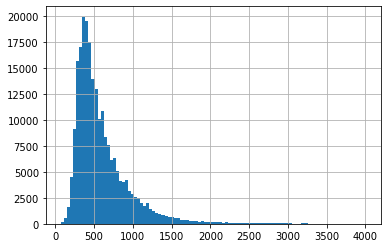

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2632
[LightGBM] [Info] Number of data points in the train set: 922868, number of used features: 226
[LightGBM] [Info] Start training from score 605.677424
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 179.67
[100]	valid_0's rmse: 168.584
[150]	valid_0's rmse: 164.284
[200]	valid_0's rmse: 161.034
[250]	valid_0's rmse: 158.771
[300]	valid_0's rmse: 156.745
[350]	valid_0's rmse: 154.913
[400]	valid_0's rmse: 153.316
[450]	valid_0's rmse: 151.764
[500]	valid_0's rmse: 150.587
[550]	valid_0's rmse: 149.346
[600]	valid_0's rmse: 148.413
[650]	valid_0's rmse: 147.622
[700]	valid_0's rmse: 146.642
[750]	valid_0's rmse: 145.701
[800]	valid_0's rmse: 145.024
[850]	valid_0's rmse: 144.377
[900]	valid_0's r

[12550]	valid_0's rmse: 118.019
[12600]	valid_0's rmse: 118.009
[12650]	valid_0's rmse: 117.998
[12700]	valid_0's rmse: 117.973
[12750]	valid_0's rmse: 117.952
[12800]	valid_0's rmse: 117.926
[12850]	valid_0's rmse: 117.9
[12900]	valid_0's rmse: 117.88
[12950]	valid_0's rmse: 117.859
[13000]	valid_0's rmse: 117.839
[13050]	valid_0's rmse: 117.815
[13100]	valid_0's rmse: 117.802
[13150]	valid_0's rmse: 117.792
[13200]	valid_0's rmse: 117.77
[13250]	valid_0's rmse: 117.758
[13300]	valid_0's rmse: 117.741
[13350]	valid_0's rmse: 117.725
[13400]	valid_0's rmse: 117.708
[13450]	valid_0's rmse: 117.686
[13500]	valid_0's rmse: 117.673
[13550]	valid_0's rmse: 117.65
[13600]	valid_0's rmse: 117.641
[13650]	valid_0's rmse: 117.624
[13700]	valid_0's rmse: 117.598
[13750]	valid_0's rmse: 117.573
[13800]	valid_0's rmse: 117.561
[13850]	valid_0's rmse: 117.541
[13900]	valid_0's rmse: 117.519
[13950]	valid_0's rmse: 117.492
[14000]	valid_0's rmse: 117.472
[14050]	valid_0's rmse: 117.459
[14100]	valid

[25450]	valid_0's rmse: 115.182
[25500]	valid_0's rmse: 115.174
[25550]	valid_0's rmse: 115.168
[25600]	valid_0's rmse: 115.159
[25650]	valid_0's rmse: 115.145
[25700]	valid_0's rmse: 115.14
[25750]	valid_0's rmse: 115.136
[25800]	valid_0's rmse: 115.13
[25850]	valid_0's rmse: 115.126
[25900]	valid_0's rmse: 115.119
[25950]	valid_0's rmse: 115.111
[26000]	valid_0's rmse: 115.108
[26050]	valid_0's rmse: 115.107
[26100]	valid_0's rmse: 115.104
[26150]	valid_0's rmse: 115.102
[26200]	valid_0's rmse: 115.102
[26250]	valid_0's rmse: 115.096
[26300]	valid_0's rmse: 115.094
[26350]	valid_0's rmse: 115.088
[26400]	valid_0's rmse: 115.083
[26450]	valid_0's rmse: 115.079
[26500]	valid_0's rmse: 115.076
[26550]	valid_0's rmse: 115.071
[26600]	valid_0's rmse: 115.066
[26650]	valid_0's rmse: 115.059
[26700]	valid_0's rmse: 115.055
[26750]	valid_0's rmse: 115.051
[26800]	valid_0's rmse: 115.051
[26850]	valid_0's rmse: 115.045
[26900]	valid_0's rmse: 115.044
[26950]	valid_0's rmse: 115.035
[27000]	va

<Figure size 432x288 with 0 Axes>

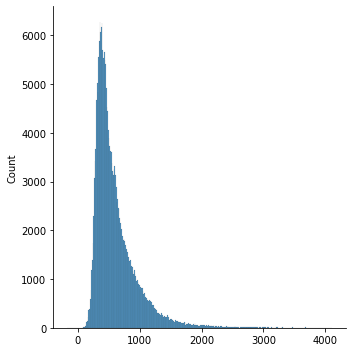

114.77554370765833
Fold 0 end
Fold 1 start
(922869, 270)
y dist plot


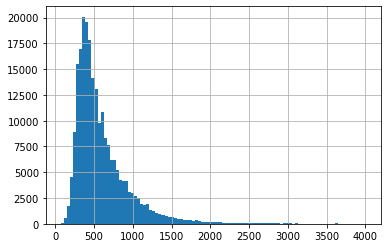

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2653
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 232


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.506949
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 180.122
[100]	valid_0's rmse: 169.193
[150]	valid_0's rmse: 163.681
[200]	valid_0's rmse: 160.328
[250]	valid_0's rmse: 157.926
[300]	valid_0's rmse: 155.854
[350]	valid_0's rmse: 153.993
[400]	valid_0's rmse: 152.296
[450]	valid_0's rmse: 150.818
[500]	valid_0's rmse: 149.627
[550]	valid_0's rmse: 148.504
[600]	valid_0's rmse: 147.435
[650]	valid_0's rmse: 146.399
[700]	valid_0's rmse: 145.642
[750]	valid_0's rmse: 144.811
[800]	valid_0's rmse: 144.054
[850]	valid_0's rmse: 143.334
[900]	valid_0's rmse: 142.676
[950]	valid_0's rmse: 142.082
[1000]	valid_0's rmse: 141.498
[1050]	valid_0's rmse: 140.846
[1100]	valid_0's rmse: 140.212
[1150]	valid_0's rmse: 139.651
[1200]	valid_0's rmse: 139.15
[1250]	valid_0's rmse: 138.622
[1300]	valid_0's rmse: 138.082
[1350]	valid_0's rmse: 137.645
[1400]	valid_0's rmse: 137.223
[1450]	valid_0's rmse: 136.833
[1500

[13100]	valid_0's rmse: 116.213
[13150]	valid_0's rmse: 116.201
[13200]	valid_0's rmse: 116.167
[13250]	valid_0's rmse: 116.139
[13300]	valid_0's rmse: 116.12
[13350]	valid_0's rmse: 116.095
[13400]	valid_0's rmse: 116.075
[13450]	valid_0's rmse: 116.057
[13500]	valid_0's rmse: 116.031
[13550]	valid_0's rmse: 116.013
[13600]	valid_0's rmse: 115.993
[13650]	valid_0's rmse: 115.973
[13700]	valid_0's rmse: 115.959
[13750]	valid_0's rmse: 115.943
[13800]	valid_0's rmse: 115.92
[13850]	valid_0's rmse: 115.9
[13900]	valid_0's rmse: 115.888
[13950]	valid_0's rmse: 115.866
[14000]	valid_0's rmse: 115.851
[14050]	valid_0's rmse: 115.823
[14100]	valid_0's rmse: 115.806
[14150]	valid_0's rmse: 115.786
[14200]	valid_0's rmse: 115.769
[14250]	valid_0's rmse: 115.751
[14300]	valid_0's rmse: 115.734
[14350]	valid_0's rmse: 115.722
[14400]	valid_0's rmse: 115.705
[14450]	valid_0's rmse: 115.68
[14500]	valid_0's rmse: 115.66
[14550]	valid_0's rmse: 115.649
[14600]	valid_0's rmse: 115.634
[14650]	valid_

[26000]	valid_0's rmse: 113.342
[26050]	valid_0's rmse: 113.337
[26100]	valid_0's rmse: 113.336
[26150]	valid_0's rmse: 113.331
[26200]	valid_0's rmse: 113.323
[26250]	valid_0's rmse: 113.322
[26300]	valid_0's rmse: 113.317
[26350]	valid_0's rmse: 113.309
[26400]	valid_0's rmse: 113.303
[26450]	valid_0's rmse: 113.295
[26500]	valid_0's rmse: 113.291
[26550]	valid_0's rmse: 113.285
[26600]	valid_0's rmse: 113.278
[26650]	valid_0's rmse: 113.273
[26700]	valid_0's rmse: 113.264
[26750]	valid_0's rmse: 113.258
[26800]	valid_0's rmse: 113.249
[26850]	valid_0's rmse: 113.245
[26900]	valid_0's rmse: 113.239
[26950]	valid_0's rmse: 113.231
[27000]	valid_0's rmse: 113.225
[27050]	valid_0's rmse: 113.22
[27100]	valid_0's rmse: 113.216
[27150]	valid_0's rmse: 113.212
[27200]	valid_0's rmse: 113.211
[27250]	valid_0's rmse: 113.204
[27300]	valid_0's rmse: 113.202
[27350]	valid_0's rmse: 113.2
[27400]	valid_0's rmse: 113.196
[27450]	valid_0's rmse: 113.192
[27500]	valid_0's rmse: 113.188
[27550]	val

<Figure size 432x288 with 0 Axes>

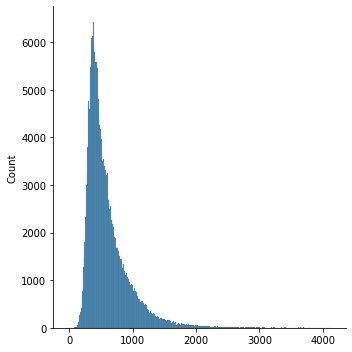

113.13401475533549
Fold 1 end
Fold 2 start
(922869, 270)
y dist plot


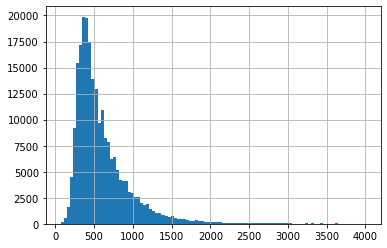

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.179720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 229


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.128319
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 181.597
[100]	valid_0's rmse: 170.059
[150]	valid_0's rmse: 165.081
[200]	valid_0's rmse: 162.143
[250]	valid_0's rmse: 159.653
[300]	valid_0's rmse: 157.31
[350]	valid_0's rmse: 155.323
[400]	valid_0's rmse: 153.646
[450]	valid_0's rmse: 152.126
[500]	valid_0's rmse: 150.978
[550]	valid_0's rmse: 149.855
[600]	valid_0's rmse: 148.872
[650]	valid_0's rmse: 147.852
[700]	valid_0's rmse: 147.018
[750]	valid_0's rmse: 146.047
[800]	valid_0's rmse: 145.274
[850]	valid_0's rmse: 144.445
[900]	valid_0's rmse: 143.832
[950]	valid_0's rmse: 143.186
[1000]	valid_0's rmse: 142.614
[1050]	valid_0's rmse: 142.041
[1100]	valid_0's rmse: 141.555
[1150]	valid_0's rmse: 141.119
[1200]	valid_0's rmse: 140.508
[1250]	valid_0's rmse: 140.092
[1300]	valid_0's rmse: 139.599
[1350]	valid_0's rmse: 139.161
[1400]	valid_0's rmse: 138.678
[1450]	valid_0's rmse: 138.322
[1500

[13100]	valid_0's rmse: 118.574
[13150]	valid_0's rmse: 118.553
[13200]	valid_0's rmse: 118.541
[13250]	valid_0's rmse: 118.523
[13300]	valid_0's rmse: 118.506
[13350]	valid_0's rmse: 118.488
[13400]	valid_0's rmse: 118.469
[13450]	valid_0's rmse: 118.45
[13500]	valid_0's rmse: 118.436
[13550]	valid_0's rmse: 118.419
[13600]	valid_0's rmse: 118.405
[13650]	valid_0's rmse: 118.383
[13700]	valid_0's rmse: 118.371
[13750]	valid_0's rmse: 118.346
[13800]	valid_0's rmse: 118.322
[13850]	valid_0's rmse: 118.304
[13900]	valid_0's rmse: 118.284
[13950]	valid_0's rmse: 118.273
[14000]	valid_0's rmse: 118.253
[14050]	valid_0's rmse: 118.234
[14100]	valid_0's rmse: 118.226
[14150]	valid_0's rmse: 118.211
[14200]	valid_0's rmse: 118.2
[14250]	valid_0's rmse: 118.189
[14300]	valid_0's rmse: 118.171
[14350]	valid_0's rmse: 118.157
[14400]	valid_0's rmse: 118.134
[14450]	valid_0's rmse: 118.111
[14500]	valid_0's rmse: 118.089
[14550]	valid_0's rmse: 118.076
[14600]	valid_0's rmse: 118.061
[14650]	val

[25950]	valid_0's rmse: 116.057
[26000]	valid_0's rmse: 116.049
[26050]	valid_0's rmse: 116.045
[26100]	valid_0's rmse: 116.039
[26150]	valid_0's rmse: 116.035
[26200]	valid_0's rmse: 116.031
[26250]	valid_0's rmse: 116.028
[26300]	valid_0's rmse: 116.025
[26350]	valid_0's rmse: 116.025
[26400]	valid_0's rmse: 116.021
[26450]	valid_0's rmse: 116.018
[26500]	valid_0's rmse: 116.011
[26550]	valid_0's rmse: 116.005
[26600]	valid_0's rmse: 116
[26650]	valid_0's rmse: 115.996
[26700]	valid_0's rmse: 115.991
[26750]	valid_0's rmse: 115.989
[26800]	valid_0's rmse: 115.984
[26850]	valid_0's rmse: 115.983
[26900]	valid_0's rmse: 115.978
[26950]	valid_0's rmse: 115.974
[27000]	valid_0's rmse: 115.97
[27050]	valid_0's rmse: 115.968
[27100]	valid_0's rmse: 115.962
[27150]	valid_0's rmse: 115.956
[27200]	valid_0's rmse: 115.949
[27250]	valid_0's rmse: 115.945
[27300]	valid_0's rmse: 115.941
[27350]	valid_0's rmse: 115.936
[27400]	valid_0's rmse: 115.935
[27450]	valid_0's rmse: 115.932
[27500]	valid

<Figure size 432x288 with 0 Axes>

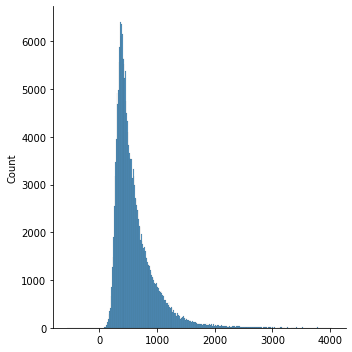

115.66994362030873
Fold 2 end
Fold 3 start
(922869, 270)
y dist plot


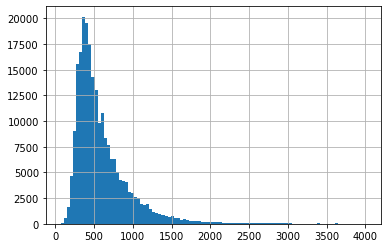

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.184425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 229


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.513470
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 181.321
[100]	valid_0's rmse: 170.21
[150]	valid_0's rmse: 165.007
[200]	valid_0's rmse: 162.135
[250]	valid_0's rmse: 159.79
[300]	valid_0's rmse: 157.5
[350]	valid_0's rmse: 155.639
[400]	valid_0's rmse: 154.198
[450]	valid_0's rmse: 152.649
[500]	valid_0's rmse: 151.281
[550]	valid_0's rmse: 150.116
[600]	valid_0's rmse: 148.974
[650]	valid_0's rmse: 148.146
[700]	valid_0's rmse: 147.249
[750]	valid_0's rmse: 146.429
[800]	valid_0's rmse: 145.603
[850]	valid_0's rmse: 144.923
[900]	valid_0's rmse: 144.196
[950]	valid_0's rmse: 143.692
[1000]	valid_0's rmse: 143.107
[1050]	valid_0's rmse: 142.555
[1100]	valid_0's rmse: 142.043
[1150]	valid_0's rmse: 141.504
[1200]	valid_0's rmse: 141.093
[1250]	valid_0's rmse: 140.658
[1300]	valid_0's rmse: 140.123
[1350]	valid_0's rmse: 139.637
[1400]	valid_0's rmse: 139.206
[1450]	valid_0's rmse: 138.753
[1500]	v

[13100]	valid_0's rmse: 117.879
[13150]	valid_0's rmse: 117.854
[13200]	valid_0's rmse: 117.832
[13250]	valid_0's rmse: 117.809
[13300]	valid_0's rmse: 117.794
[13350]	valid_0's rmse: 117.766
[13400]	valid_0's rmse: 117.748
[13450]	valid_0's rmse: 117.721
[13500]	valid_0's rmse: 117.697
[13550]	valid_0's rmse: 117.684
[13600]	valid_0's rmse: 117.668
[13650]	valid_0's rmse: 117.647
[13700]	valid_0's rmse: 117.628
[13750]	valid_0's rmse: 117.609
[13800]	valid_0's rmse: 117.591
[13850]	valid_0's rmse: 117.567
[13900]	valid_0's rmse: 117.545
[13950]	valid_0's rmse: 117.514
[14000]	valid_0's rmse: 117.499
[14050]	valid_0's rmse: 117.487
[14100]	valid_0's rmse: 117.473
[14150]	valid_0's rmse: 117.459
[14200]	valid_0's rmse: 117.443
[14250]	valid_0's rmse: 117.425
[14300]	valid_0's rmse: 117.413
[14350]	valid_0's rmse: 117.395
[14400]	valid_0's rmse: 117.382
[14450]	valid_0's rmse: 117.356
[14500]	valid_0's rmse: 117.337
[14550]	valid_0's rmse: 117.325
[14600]	valid_0's rmse: 117.313
[14650]	

[25950]	valid_0's rmse: 115.18
[26000]	valid_0's rmse: 115.173
[26050]	valid_0's rmse: 115.168
[26100]	valid_0's rmse: 115.169
[26150]	valid_0's rmse: 115.165
[26200]	valid_0's rmse: 115.157
[26250]	valid_0's rmse: 115.149
[26300]	valid_0's rmse: 115.145
[26350]	valid_0's rmse: 115.14
[26400]	valid_0's rmse: 115.134
[26450]	valid_0's rmse: 115.13
[26500]	valid_0's rmse: 115.125
[26550]	valid_0's rmse: 115.12
[26600]	valid_0's rmse: 115.118
[26650]	valid_0's rmse: 115.11
[26700]	valid_0's rmse: 115.107
[26750]	valid_0's rmse: 115.105
[26800]	valid_0's rmse: 115.102
[26850]	valid_0's rmse: 115.098
[26900]	valid_0's rmse: 115.092
[26950]	valid_0's rmse: 115.09
[27000]	valid_0's rmse: 115.079
[27050]	valid_0's rmse: 115.073
[27100]	valid_0's rmse: 115.071
[27150]	valid_0's rmse: 115.062
[27200]	valid_0's rmse: 115.055
[27250]	valid_0's rmse: 115.047
[27300]	valid_0's rmse: 115.043
[27350]	valid_0's rmse: 115.038
[27400]	valid_0's rmse: 115.035
[27450]	valid_0's rmse: 115.035
[27500]	valid_

<Figure size 432x288 with 0 Axes>

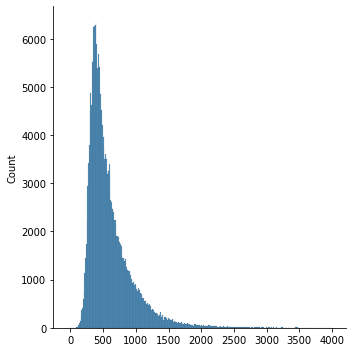

114.56234445307994
Fold 3 end
Fold 4 start
(922869, 270)
y dist plot


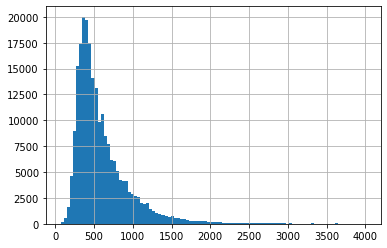

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 223


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.196274
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 182.452
[100]	valid_0's rmse: 171.097
[150]	valid_0's rmse: 166.034
[200]	valid_0's rmse: 162.798
[250]	valid_0's rmse: 160.278
[300]	valid_0's rmse: 158.14
[350]	valid_0's rmse: 156.405
[400]	valid_0's rmse: 154.848
[450]	valid_0's rmse: 153.185
[500]	valid_0's rmse: 151.898
[550]	valid_0's rmse: 150.612
[600]	valid_0's rmse: 149.658
[650]	valid_0's rmse: 148.593
[700]	valid_0's rmse: 147.565
[750]	valid_0's rmse: 146.732
[800]	valid_0's rmse: 145.891
[850]	valid_0's rmse: 145.179
[900]	valid_0's rmse: 144.642
[950]	valid_0's rmse: 144.085
[1000]	valid_0's rmse: 143.429
[1050]	valid_0's rmse: 142.842
[1100]	valid_0's rmse: 142.401
[1150]	valid_0's rmse: 141.892
[1200]	valid_0's rmse: 141.387
[1250]	valid_0's rmse: 140.835
[1300]	valid_0's rmse: 140.339
[1350]	valid_0's rmse: 139.872
[1400]	valid_0's rmse: 139.345
[1450]	valid_0's rmse: 138.931
[1500

[13100]	valid_0's rmse: 118.801
[13150]	valid_0's rmse: 118.788
[13200]	valid_0's rmse: 118.776
[13250]	valid_0's rmse: 118.753
[13300]	valid_0's rmse: 118.737
[13350]	valid_0's rmse: 118.713
[13400]	valid_0's rmse: 118.701
[13450]	valid_0's rmse: 118.676
[13500]	valid_0's rmse: 118.66
[13550]	valid_0's rmse: 118.647
[13600]	valid_0's rmse: 118.636
[13650]	valid_0's rmse: 118.625
[13700]	valid_0's rmse: 118.603
[13750]	valid_0's rmse: 118.588
[13800]	valid_0's rmse: 118.57
[13850]	valid_0's rmse: 118.554
[13900]	valid_0's rmse: 118.538
[13950]	valid_0's rmse: 118.523
[14000]	valid_0's rmse: 118.507
[14050]	valid_0's rmse: 118.488
[14100]	valid_0's rmse: 118.474
[14150]	valid_0's rmse: 118.454
[14200]	valid_0's rmse: 118.442
[14250]	valid_0's rmse: 118.432
[14300]	valid_0's rmse: 118.412
[14350]	valid_0's rmse: 118.393
[14400]	valid_0's rmse: 118.376
[14450]	valid_0's rmse: 118.356
[14500]	valid_0's rmse: 118.332
[14550]	valid_0's rmse: 118.316
[14600]	valid_0's rmse: 118.305
[14650]	va

[25950]	valid_0's rmse: 116.159
[26000]	valid_0's rmse: 116.153
[26050]	valid_0's rmse: 116.145
[26100]	valid_0's rmse: 116.136
[26150]	valid_0's rmse: 116.129
[26200]	valid_0's rmse: 116.123
[26250]	valid_0's rmse: 116.121
[26300]	valid_0's rmse: 116.115
[26350]	valid_0's rmse: 116.11
[26400]	valid_0's rmse: 116.106
[26450]	valid_0's rmse: 116.1
[26500]	valid_0's rmse: 116.097
[26550]	valid_0's rmse: 116.091
[26600]	valid_0's rmse: 116.083
[26650]	valid_0's rmse: 116.08
[26700]	valid_0's rmse: 116.077
[26750]	valid_0's rmse: 116.075
[26800]	valid_0's rmse: 116.077
[26850]	valid_0's rmse: 116.073
[26900]	valid_0's rmse: 116.069
[26950]	valid_0's rmse: 116.064
[27000]	valid_0's rmse: 116.059
[27050]	valid_0's rmse: 116.057
[27100]	valid_0's rmse: 116.055
[27150]	valid_0's rmse: 116.054
[27200]	valid_0's rmse: 116.052
[27250]	valid_0's rmse: 116.048
[27300]	valid_0's rmse: 116.045
[27350]	valid_0's rmse: 116.038
[27400]	valid_0's rmse: 116.033
[27450]	valid_0's rmse: 116.027
[27500]	vali

<Figure size 432x288 with 0 Axes>

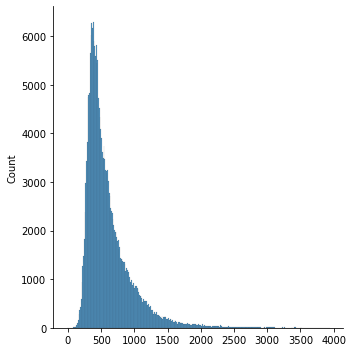

115.74605061870706
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [34]:
count = 0
oof = np.zeros(training_data_df.shape[0])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['면적당단가']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['면적당단가']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'regression',
        #'alpha': 1.35,
        'learning_rate': 0.1,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 500000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_mse_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [35]:
np.sqrt(mean_squared_error(training_data_df['면적당단가'], oof))

114.78148420340125

Fold 0 start
(922868, 270)
y dist plot


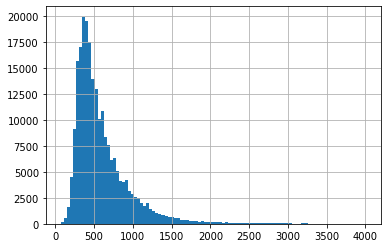

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2632
[LightGBM] [Info] Number of data points in the train set: 922868, number of used features: 226


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.677424
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 300.914
[100]	valid_0's huber: 260.712
[150]	valid_0's huber: 230.852
[200]	valid_0's huber: 210.475
[250]	valid_0's huber: 197.127
[300]	valid_0's huber: 187.383
[350]	valid_0's huber: 180.04
[400]	valid_0's huber: 174.472
[450]	valid_0's huber: 170.035
[500]	valid_0's huber: 166.345
[550]	valid_0's huber: 163.269
[600]	valid_0's huber: 160.568
[650]	valid_0's huber: 158.254
[700]	valid_0's huber: 156.245
[750]	valid_0's huber: 154.403
[800]	valid_0's huber: 152.803
[850]	valid_0's huber: 151.381
[900]	valid_0's huber: 150.146
[950]	valid_0's huber: 148.981
[1000]	valid_0's huber: 147.916
[1050]	valid_0's huber: 146.97
[1100]	valid_0's huber: 146.087
[1150]	valid_0's huber: 145.244
[1200]	valid_0's huber: 144.448
[1250]	valid_0's huber: 143.686
[1300]	valid_0's huber: 142.888
[1350]	valid_0's huber: 142.177
[1400]	valid_0's huber: 141.535
[1450]	va

[12700]	valid_0's huber: 109.268
[12750]	valid_0's huber: 109.179
[12800]	valid_0's huber: 109.1
[12850]	valid_0's huber: 109.038
[12900]	valid_0's huber: 108.946
[12950]	valid_0's huber: 108.883
[13000]	valid_0's huber: 108.809
[13050]	valid_0's huber: 108.738
[13100]	valid_0's huber: 108.663
[13150]	valid_0's huber: 108.616
[13200]	valid_0's huber: 108.556
[13250]	valid_0's huber: 108.484
[13300]	valid_0's huber: 108.417
[13350]	valid_0's huber: 108.337
[13400]	valid_0's huber: 108.29
[13450]	valid_0's huber: 108.247
[13500]	valid_0's huber: 108.164
[13550]	valid_0's huber: 108.092
[13600]	valid_0's huber: 108.046
[13650]	valid_0's huber: 107.987
[13700]	valid_0's huber: 107.944
[13750]	valid_0's huber: 107.902
[13800]	valid_0's huber: 107.867
[13850]	valid_0's huber: 107.818
[13900]	valid_0's huber: 107.742
[13950]	valid_0's huber: 107.675
[14000]	valid_0's huber: 107.647
[14050]	valid_0's huber: 107.632
[14100]	valid_0's huber: 107.623
[14150]	valid_0's huber: 107.578
[14200]	valid

[25150]	valid_0's huber: 96.9069
[25200]	valid_0's huber: 96.8799
[25250]	valid_0's huber: 96.8522
[25300]	valid_0's huber: 96.829
[25350]	valid_0's huber: 96.8064
[25400]	valid_0's huber: 96.7825
[25450]	valid_0's huber: 96.7556
[25500]	valid_0's huber: 96.7323
[25550]	valid_0's huber: 96.6968
[25600]	valid_0's huber: 96.6663
[25650]	valid_0's huber: 96.632
[25700]	valid_0's huber: 96.6011
[25750]	valid_0's huber: 96.5749
[25800]	valid_0's huber: 96.5533
[25850]	valid_0's huber: 96.534
[25900]	valid_0's huber: 96.5035
[25950]	valid_0's huber: 96.4801
[26000]	valid_0's huber: 96.4506
[26050]	valid_0's huber: 96.4223
[26100]	valid_0's huber: 96.3851
[26150]	valid_0's huber: 96.3671
[26200]	valid_0's huber: 96.3433
[26250]	valid_0's huber: 96.3131
[26300]	valid_0's huber: 96.2888
[26350]	valid_0's huber: 96.258
[26400]	valid_0's huber: 96.228
[26450]	valid_0's huber: 96.1983
[26500]	valid_0's huber: 96.1761
[26550]	valid_0's huber: 96.1455
[26600]	valid_0's huber: 96.119
[26650]	valid_0'

[37650]	valid_0's huber: 90.697
[37700]	valid_0's huber: 90.6746
[37750]	valid_0's huber: 90.6552
[37800]	valid_0's huber: 90.6369
[37850]	valid_0's huber: 90.6149
[37900]	valid_0's huber: 90.596
[37950]	valid_0's huber: 90.5676
[38000]	valid_0's huber: 90.5412
[38050]	valid_0's huber: 90.5151
[38100]	valid_0's huber: 90.4965
[38150]	valid_0's huber: 90.4815
[38200]	valid_0's huber: 90.4619
[38250]	valid_0's huber: 90.4492
[38300]	valid_0's huber: 90.4307
[38350]	valid_0's huber: 90.4123
[38400]	valid_0's huber: 90.393
[38450]	valid_0's huber: 90.3784
[38500]	valid_0's huber: 90.3641
[38550]	valid_0's huber: 90.3512
[38600]	valid_0's huber: 90.3392
[38650]	valid_0's huber: 90.3253
[38700]	valid_0's huber: 90.3087
[38750]	valid_0's huber: 90.2874
[38800]	valid_0's huber: 90.2752
[38850]	valid_0's huber: 90.2555
[38900]	valid_0's huber: 90.2301
[38950]	valid_0's huber: 90.2138
[39000]	valid_0's huber: 90.1944
[39050]	valid_0's huber: 90.179
[39100]	valid_0's huber: 90.165
[39150]	valid_0

[50150]	valid_0's huber: 86.388
[50200]	valid_0's huber: 86.3757
[50250]	valid_0's huber: 86.3606
[50300]	valid_0's huber: 86.3487
[50350]	valid_0's huber: 86.3367
[50400]	valid_0's huber: 86.3247
[50450]	valid_0's huber: 86.3117
[50500]	valid_0's huber: 86.2966
[50550]	valid_0's huber: 86.2851
[50600]	valid_0's huber: 86.2765
[50650]	valid_0's huber: 86.266
[50700]	valid_0's huber: 86.2561
[50750]	valid_0's huber: 86.2462
[50800]	valid_0's huber: 86.2338
[50850]	valid_0's huber: 86.223
[50900]	valid_0's huber: 86.2059
[50950]	valid_0's huber: 86.1889
[51000]	valid_0's huber: 86.1731
[51050]	valid_0's huber: 86.1625
[51100]	valid_0's huber: 86.1459
[51150]	valid_0's huber: 86.1297
[51200]	valid_0's huber: 86.1155
[51250]	valid_0's huber: 86.1043
[51300]	valid_0's huber: 86.0896
[51350]	valid_0's huber: 86.0758
[51400]	valid_0's huber: 86.0576
[51450]	valid_0's huber: 86.0399
[51500]	valid_0's huber: 86.0236
[51550]	valid_0's huber: 86.0099
[51600]	valid_0's huber: 85.9979
[51650]	valid

[62600]	valid_0's huber: 83.3336
[62650]	valid_0's huber: 83.3228
[62700]	valid_0's huber: 83.3144
[62750]	valid_0's huber: 83.308
[62800]	valid_0's huber: 83.3009
[62850]	valid_0's huber: 83.2923
[62900]	valid_0's huber: 83.2825
[62950]	valid_0's huber: 83.2733
[63000]	valid_0's huber: 83.2665
[63050]	valid_0's huber: 83.2588
[63100]	valid_0's huber: 83.248
[63150]	valid_0's huber: 83.236
[63200]	valid_0's huber: 83.2164
[63250]	valid_0's huber: 83.1986
[63300]	valid_0's huber: 83.1868
[63350]	valid_0's huber: 83.1763
[63400]	valid_0's huber: 83.1649
[63450]	valid_0's huber: 83.1567
[63500]	valid_0's huber: 83.1511
[63550]	valid_0's huber: 83.139
[63600]	valid_0's huber: 83.1264
[63650]	valid_0's huber: 83.1149
[63700]	valid_0's huber: 83.105
[63750]	valid_0's huber: 83.0904
[63800]	valid_0's huber: 83.0809
[63850]	valid_0's huber: 83.0702
[63900]	valid_0's huber: 83.0569
[63950]	valid_0's huber: 83.0493
[64000]	valid_0's huber: 83.0395
[64050]	valid_0's huber: 83.0318
[64100]	valid_0

[75100]	valid_0's huber: 81.1298
[75150]	valid_0's huber: 81.1217
[75200]	valid_0's huber: 81.115
[75250]	valid_0's huber: 81.1043
[75300]	valid_0's huber: 81.0961
[75350]	valid_0's huber: 81.0907
[75400]	valid_0's huber: 81.0847
[75450]	valid_0's huber: 81.0765
[75500]	valid_0's huber: 81.0681
[75550]	valid_0's huber: 81.0608
[75600]	valid_0's huber: 81.0533
[75650]	valid_0's huber: 81.0474
[75700]	valid_0's huber: 81.0411
[75750]	valid_0's huber: 81.0333
[75800]	valid_0's huber: 81.0252
[75850]	valid_0's huber: 81.0187
[75900]	valid_0's huber: 81.0138
[75950]	valid_0's huber: 81.005
[76000]	valid_0's huber: 80.9977
[76050]	valid_0's huber: 80.9916
[76100]	valid_0's huber: 80.9849
[76150]	valid_0's huber: 80.9792
[76200]	valid_0's huber: 80.9716
[76250]	valid_0's huber: 80.9644
[76300]	valid_0's huber: 80.9556
[76350]	valid_0's huber: 80.949
[76400]	valid_0's huber: 80.9454
[76450]	valid_0's huber: 80.9382
[76500]	valid_0's huber: 80.9305
[76550]	valid_0's huber: 80.9222
[76600]	valid

[87600]	valid_0's huber: 79.4767
[87650]	valid_0's huber: 79.4702
[87700]	valid_0's huber: 79.4625
[87750]	valid_0's huber: 79.4584
[87800]	valid_0's huber: 79.4512
[87850]	valid_0's huber: 79.4452
[87900]	valid_0's huber: 79.4402
[87950]	valid_0's huber: 79.4345
[88000]	valid_0's huber: 79.4295
[88050]	valid_0's huber: 79.4232
[88100]	valid_0's huber: 79.4185
[88150]	valid_0's huber: 79.4147
[88200]	valid_0's huber: 79.4102
[88250]	valid_0's huber: 79.4035
[88300]	valid_0's huber: 79.3971
[88350]	valid_0's huber: 79.3915
[88400]	valid_0's huber: 79.3854
[88450]	valid_0's huber: 79.3796
[88500]	valid_0's huber: 79.3731
[88550]	valid_0's huber: 79.3678
[88600]	valid_0's huber: 79.3637
[88650]	valid_0's huber: 79.3595
[88700]	valid_0's huber: 79.3535
[88750]	valid_0's huber: 79.3458
[88800]	valid_0's huber: 79.3406
[88850]	valid_0's huber: 79.3344
[88900]	valid_0's huber: 79.3281
[88950]	valid_0's huber: 79.3217
[89000]	valid_0's huber: 79.3177
[89050]	valid_0's huber: 79.3111
[89100]	va

[100050]	valid_0's huber: 78.0164
[100100]	valid_0's huber: 78.0111
[100150]	valid_0's huber: 78.0065
[100200]	valid_0's huber: 78.0024
[100250]	valid_0's huber: 77.9986
[100300]	valid_0's huber: 77.9919
[100350]	valid_0's huber: 77.9857
[100400]	valid_0's huber: 77.9828
[100450]	valid_0's huber: 77.9774
[100500]	valid_0's huber: 77.97
[100550]	valid_0's huber: 77.9653
[100600]	valid_0's huber: 77.9588
[100650]	valid_0's huber: 77.9541
[100700]	valid_0's huber: 77.9473
[100750]	valid_0's huber: 77.9384
[100800]	valid_0's huber: 77.9345
[100850]	valid_0's huber: 77.9289
[100900]	valid_0's huber: 77.9232
[100950]	valid_0's huber: 77.9161
[101000]	valid_0's huber: 77.9113
[101050]	valid_0's huber: 77.9051
[101100]	valid_0's huber: 77.8996
[101150]	valid_0's huber: 77.8944
[101200]	valid_0's huber: 77.891
[101250]	valid_0's huber: 77.887
[101300]	valid_0's huber: 77.8817
[101350]	valid_0's huber: 77.877
[101400]	valid_0's huber: 77.8717
[101450]	valid_0's huber: 77.8666
[101500]	valid_0's 

[112150]	valid_0's huber: 76.8843
[112200]	valid_0's huber: 76.879
[112250]	valid_0's huber: 76.8753
[112300]	valid_0's huber: 76.8729
[112350]	valid_0's huber: 76.8697
[112400]	valid_0's huber: 76.8663
[112450]	valid_0's huber: 76.8626
[112500]	valid_0's huber: 76.8588
[112550]	valid_0's huber: 76.8534
[112600]	valid_0's huber: 76.8502
[112650]	valid_0's huber: 76.8466
[112700]	valid_0's huber: 76.8421
[112750]	valid_0's huber: 76.8375
[112800]	valid_0's huber: 76.8335
[112850]	valid_0's huber: 76.8288
[112900]	valid_0's huber: 76.8238
[112950]	valid_0's huber: 76.8208
[113000]	valid_0's huber: 76.8151
[113050]	valid_0's huber: 76.8082
[113100]	valid_0's huber: 76.8022
[113150]	valid_0's huber: 76.7981
[113200]	valid_0's huber: 76.7938
[113250]	valid_0's huber: 76.7898
[113300]	valid_0's huber: 76.7864
[113350]	valid_0's huber: 76.7838
[113400]	valid_0's huber: 76.7809
[113450]	valid_0's huber: 76.777
[113500]	valid_0's huber: 76.7741
[113550]	valid_0's huber: 76.7694
[113600]	valid_0

[124250]	valid_0's huber: 75.8686
[124300]	valid_0's huber: 75.8652
[124350]	valid_0's huber: 75.862
[124400]	valid_0's huber: 75.8575
[124450]	valid_0's huber: 75.8536
[124500]	valid_0's huber: 75.8496
[124550]	valid_0's huber: 75.8449
[124600]	valid_0's huber: 75.8398
[124650]	valid_0's huber: 75.8373
[124700]	valid_0's huber: 75.8349
[124750]	valid_0's huber: 75.8317
[124800]	valid_0's huber: 75.8276
[124850]	valid_0's huber: 75.8226
[124900]	valid_0's huber: 75.8192
[124950]	valid_0's huber: 75.8146
[125000]	valid_0's huber: 75.8104
[125050]	valid_0's huber: 75.8063
[125100]	valid_0's huber: 75.8024
[125150]	valid_0's huber: 75.8
[125200]	valid_0's huber: 75.7966
[125250]	valid_0's huber: 75.7924
[125300]	valid_0's huber: 75.7903
[125350]	valid_0's huber: 75.7873
[125400]	valid_0's huber: 75.7838
[125450]	valid_0's huber: 75.78
[125500]	valid_0's huber: 75.7767
[125550]	valid_0's huber: 75.7742
[125600]	valid_0's huber: 75.7706
[125650]	valid_0's huber: 75.7681
[125700]	valid_0's h

[136400]	valid_0's huber: 74.9812
[136450]	valid_0's huber: 74.9786
[136500]	valid_0's huber: 74.9753
[136550]	valid_0's huber: 74.9718
[136600]	valid_0's huber: 74.9684
[136650]	valid_0's huber: 74.9643
[136700]	valid_0's huber: 74.9603
[136750]	valid_0's huber: 74.9567
[136800]	valid_0's huber: 74.9531
[136850]	valid_0's huber: 74.9489
[136900]	valid_0's huber: 74.947
[136950]	valid_0's huber: 74.9439
[137000]	valid_0's huber: 74.9407
[137050]	valid_0's huber: 74.9371
[137100]	valid_0's huber: 74.9322
[137150]	valid_0's huber: 74.9286
[137200]	valid_0's huber: 74.9254
[137250]	valid_0's huber: 74.9227
[137300]	valid_0's huber: 74.9202
[137350]	valid_0's huber: 74.9167
[137400]	valid_0's huber: 74.9129
[137450]	valid_0's huber: 74.9097
[137500]	valid_0's huber: 74.9073
[137550]	valid_0's huber: 74.9033
[137600]	valid_0's huber: 74.8978
[137650]	valid_0's huber: 74.8951
[137700]	valid_0's huber: 74.889
[137750]	valid_0's huber: 74.8852
[137800]	valid_0's huber: 74.8802
[137850]	valid_0

[148500]	valid_0's huber: 74.2221
[148550]	valid_0's huber: 74.2193
[148600]	valid_0's huber: 74.2169
[148650]	valid_0's huber: 74.2145
[148700]	valid_0's huber: 74.212
[148750]	valid_0's huber: 74.2098
[148800]	valid_0's huber: 74.2077
[148850]	valid_0's huber: 74.204
[148900]	valid_0's huber: 74.2025
[148950]	valid_0's huber: 74.2
[149000]	valid_0's huber: 74.197
[149050]	valid_0's huber: 74.1944
[149100]	valid_0's huber: 74.1915
[149150]	valid_0's huber: 74.1884
[149200]	valid_0's huber: 74.1844
[149250]	valid_0's huber: 74.1827
[149300]	valid_0's huber: 74.1795
[149350]	valid_0's huber: 74.1765
[149400]	valid_0's huber: 74.1731
[149450]	valid_0's huber: 74.1702
[149500]	valid_0's huber: 74.167
[149550]	valid_0's huber: 74.1647
[149600]	valid_0's huber: 74.1611
[149650]	valid_0's huber: 74.1576
[149700]	valid_0's huber: 74.1553
[149750]	valid_0's huber: 74.1524
[149800]	valid_0's huber: 74.1435
[149850]	valid_0's huber: 74.1394
[149900]	valid_0's huber: 74.1357
[149950]	valid_0's hu

[160600]	valid_0's huber: 73.5426
[160650]	valid_0's huber: 73.5398
[160700]	valid_0's huber: 73.537
[160750]	valid_0's huber: 73.5334
[160800]	valid_0's huber: 73.531
[160850]	valid_0's huber: 73.5288
[160900]	valid_0's huber: 73.5264
[160950]	valid_0's huber: 73.5237
[161000]	valid_0's huber: 73.5206
[161050]	valid_0's huber: 73.5174
[161100]	valid_0's huber: 73.5143
[161150]	valid_0's huber: 73.5121
[161200]	valid_0's huber: 73.5097
[161250]	valid_0's huber: 73.5073
[161300]	valid_0's huber: 73.5043
[161350]	valid_0's huber: 73.5028
[161400]	valid_0's huber: 73.5007
[161450]	valid_0's huber: 73.4995
[161500]	valid_0's huber: 73.4984
[161550]	valid_0's huber: 73.4956
[161600]	valid_0's huber: 73.4919
[161650]	valid_0's huber: 73.488
[161700]	valid_0's huber: 73.4857
[161750]	valid_0's huber: 73.4838
[161800]	valid_0's huber: 73.48
[161850]	valid_0's huber: 73.4774
[161900]	valid_0's huber: 73.4744
[161950]	valid_0's huber: 73.4723
[162000]	valid_0's huber: 73.4706
[162050]	valid_0's 

[172700]	valid_0's huber: 72.9603
[172750]	valid_0's huber: 72.9589
[172800]	valid_0's huber: 72.9568
[172850]	valid_0's huber: 72.9537
[172900]	valid_0's huber: 72.9517
[172950]	valid_0's huber: 72.9489
[173000]	valid_0's huber: 72.9449
[173050]	valid_0's huber: 72.9417
[173100]	valid_0's huber: 72.9394
[173150]	valid_0's huber: 72.9364
[173200]	valid_0's huber: 72.9337
[173250]	valid_0's huber: 72.9312
[173300]	valid_0's huber: 72.9266
[173350]	valid_0's huber: 72.9235
[173400]	valid_0's huber: 72.9213
[173450]	valid_0's huber: 72.9184
[173500]	valid_0's huber: 72.915
[173550]	valid_0's huber: 72.9126
[173600]	valid_0's huber: 72.9112
[173650]	valid_0's huber: 72.9096
[173700]	valid_0's huber: 72.9071
[173750]	valid_0's huber: 72.9051
[173800]	valid_0's huber: 72.9023
[173850]	valid_0's huber: 72.8991
[173900]	valid_0's huber: 72.8944
[173950]	valid_0's huber: 72.891
[174000]	valid_0's huber: 72.889
[174050]	valid_0's huber: 72.8854
[174100]	valid_0's huber: 72.8819
[174150]	valid_0'

[184850]	valid_0's huber: 72.4078
[184900]	valid_0's huber: 72.404
[184950]	valid_0's huber: 72.4009
[185000]	valid_0's huber: 72.3988
[185050]	valid_0's huber: 72.3962
[185100]	valid_0's huber: 72.3944
[185150]	valid_0's huber: 72.3919
[185200]	valid_0's huber: 72.3893
[185250]	valid_0's huber: 72.3864
[185300]	valid_0's huber: 72.3838
[185350]	valid_0's huber: 72.3815
[185400]	valid_0's huber: 72.3792
[185450]	valid_0's huber: 72.3775
[185500]	valid_0's huber: 72.3765
[185550]	valid_0's huber: 72.3737
[185600]	valid_0's huber: 72.3693
[185650]	valid_0's huber: 72.3668
[185700]	valid_0's huber: 72.365
[185750]	valid_0's huber: 72.3633
[185800]	valid_0's huber: 72.3611
[185850]	valid_0's huber: 72.3584
[185900]	valid_0's huber: 72.3553
[185950]	valid_0's huber: 72.3527
[186000]	valid_0's huber: 72.3495
[186050]	valid_0's huber: 72.3478
[186100]	valid_0's huber: 72.3462
[186150]	valid_0's huber: 72.3451
[186200]	valid_0's huber: 72.3437
[186250]	valid_0's huber: 72.3416
[186300]	valid_0

[196950]	valid_0's huber: 71.8863
[197000]	valid_0's huber: 71.8832
[197050]	valid_0's huber: 71.8806
[197100]	valid_0's huber: 71.8788
[197150]	valid_0's huber: 71.8766
[197200]	valid_0's huber: 71.8749
[197250]	valid_0's huber: 71.8736
[197300]	valid_0's huber: 71.8712
[197350]	valid_0's huber: 71.8696
[197400]	valid_0's huber: 71.8669
[197450]	valid_0's huber: 71.8649
[197500]	valid_0's huber: 71.8629
[197550]	valid_0's huber: 71.8613
[197600]	valid_0's huber: 71.859
[197650]	valid_0's huber: 71.8571
[197700]	valid_0's huber: 71.8557
[197750]	valid_0's huber: 71.8545
[197800]	valid_0's huber: 71.8526
[197850]	valid_0's huber: 71.851
[197900]	valid_0's huber: 71.8492
[197950]	valid_0's huber: 71.8471
[198000]	valid_0's huber: 71.8449
[198050]	valid_0's huber: 71.8434
[198100]	valid_0's huber: 71.8413
[198150]	valid_0's huber: 71.8392
[198200]	valid_0's huber: 71.8376
[198250]	valid_0's huber: 71.8359
[198300]	valid_0's huber: 71.8337
[198350]	valid_0's huber: 71.8322
[198400]	valid_0

[209050]	valid_0's huber: 71.4254
[209100]	valid_0's huber: 71.4236
[209150]	valid_0's huber: 71.4222
[209200]	valid_0's huber: 71.421
[209250]	valid_0's huber: 71.4185
[209300]	valid_0's huber: 71.4176
[209350]	valid_0's huber: 71.4163
[209400]	valid_0's huber: 71.4148
[209450]	valid_0's huber: 71.4136
[209500]	valid_0's huber: 71.411
[209550]	valid_0's huber: 71.4091
[209600]	valid_0's huber: 71.4078
[209650]	valid_0's huber: 71.4062
[209700]	valid_0's huber: 71.4042
[209750]	valid_0's huber: 71.4023
[209800]	valid_0's huber: 71.4009
[209850]	valid_0's huber: 71.3988
[209900]	valid_0's huber: 71.3969
[209950]	valid_0's huber: 71.3957
[210000]	valid_0's huber: 71.3942
[210050]	valid_0's huber: 71.3913
[210100]	valid_0's huber: 71.3903
[210150]	valid_0's huber: 71.3875
[210200]	valid_0's huber: 71.3855
[210250]	valid_0's huber: 71.3843
[210300]	valid_0's huber: 71.3822
[210350]	valid_0's huber: 71.3808
[210400]	valid_0's huber: 71.3795
[210450]	valid_0's huber: 71.3779
[210500]	valid_0

[221150]	valid_0's huber: 71.0345
[221200]	valid_0's huber: 71.0329
[221250]	valid_0's huber: 71.0318
[221300]	valid_0's huber: 71.0299
[221350]	valid_0's huber: 71.0286
[221400]	valid_0's huber: 71.0269
[221450]	valid_0's huber: 71.0251
[221500]	valid_0's huber: 71.0233
[221550]	valid_0's huber: 71.0198
[221600]	valid_0's huber: 71.0182
[221650]	valid_0's huber: 71.0161
[221700]	valid_0's huber: 71.0141
[221750]	valid_0's huber: 71.0126
[221800]	valid_0's huber: 71.0115
[221850]	valid_0's huber: 71.0104
[221900]	valid_0's huber: 71.0086
[221950]	valid_0's huber: 71.0076
[222000]	valid_0's huber: 71.0065
[222050]	valid_0's huber: 71.0049
[222100]	valid_0's huber: 71.0037
[222150]	valid_0's huber: 71.0024
[222200]	valid_0's huber: 71.0004
[222250]	valid_0's huber: 70.9988
[222300]	valid_0's huber: 70.9969
[222350]	valid_0's huber: 70.996
[222400]	valid_0's huber: 70.9934
[222450]	valid_0's huber: 70.9921
[222500]	valid_0's huber: 70.9909
[222550]	valid_0's huber: 70.9898
[222600]	valid_

[233250]	valid_0's huber: 70.6526
[233300]	valid_0's huber: 70.6517
[233350]	valid_0's huber: 70.6508
[233400]	valid_0's huber: 70.65
[233450]	valid_0's huber: 70.6484
[233500]	valid_0's huber: 70.6468
[233550]	valid_0's huber: 70.6453
[233600]	valid_0's huber: 70.6443
[233650]	valid_0's huber: 70.6436
[233700]	valid_0's huber: 70.6422
[233750]	valid_0's huber: 70.6412
[233800]	valid_0's huber: 70.6404
[233850]	valid_0's huber: 70.6393
[233900]	valid_0's huber: 70.6374
[233950]	valid_0's huber: 70.6348
[234000]	valid_0's huber: 70.6334
[234050]	valid_0's huber: 70.6322
[234100]	valid_0's huber: 70.631
[234150]	valid_0's huber: 70.6298
[234200]	valid_0's huber: 70.6283
[234250]	valid_0's huber: 70.6271
[234300]	valid_0's huber: 70.6254
[234350]	valid_0's huber: 70.6232
[234400]	valid_0's huber: 70.6219
[234450]	valid_0's huber: 70.6207
[234500]	valid_0's huber: 70.6192
[234550]	valid_0's huber: 70.6181
[234600]	valid_0's huber: 70.616
[234650]	valid_0's huber: 70.6145
[234700]	valid_0's

[245350]	valid_0's huber: 70.3044
[245400]	valid_0's huber: 70.3031
[245450]	valid_0's huber: 70.3018
[245500]	valid_0's huber: 70.3003
[245550]	valid_0's huber: 70.2982
[245600]	valid_0's huber: 70.2973
[245650]	valid_0's huber: 70.2949
[245700]	valid_0's huber: 70.2927
[245750]	valid_0's huber: 70.2915
[245800]	valid_0's huber: 70.2903
[245850]	valid_0's huber: 70.2883
[245900]	valid_0's huber: 70.2866
[245950]	valid_0's huber: 70.2851
[246000]	valid_0's huber: 70.2841
[246050]	valid_0's huber: 70.2817
[246100]	valid_0's huber: 70.2781
[246150]	valid_0's huber: 70.2772
[246200]	valid_0's huber: 70.2753
[246250]	valid_0's huber: 70.2739
[246300]	valid_0's huber: 70.2722
[246350]	valid_0's huber: 70.2708
[246400]	valid_0's huber: 70.2692
[246450]	valid_0's huber: 70.2683
[246500]	valid_0's huber: 70.267
[246550]	valid_0's huber: 70.2655
[246600]	valid_0's huber: 70.264
[246650]	valid_0's huber: 70.2628
[246700]	valid_0's huber: 70.2615
[246750]	valid_0's huber: 70.2604
[246800]	valid_0

[257450]	valid_0's huber: 69.9596
[257500]	valid_0's huber: 69.9582
[257550]	valid_0's huber: 69.9567
[257600]	valid_0's huber: 69.9558
[257650]	valid_0's huber: 69.9546
[257700]	valid_0's huber: 69.9535
[257750]	valid_0's huber: 69.9518
[257800]	valid_0's huber: 69.9506
[257850]	valid_0's huber: 69.9493
[257900]	valid_0's huber: 69.9475
[257950]	valid_0's huber: 69.9461
[258000]	valid_0's huber: 69.9446
[258050]	valid_0's huber: 69.9432
[258100]	valid_0's huber: 69.9407
[258150]	valid_0's huber: 69.9386
[258200]	valid_0's huber: 69.9361
[258250]	valid_0's huber: 69.9346
[258300]	valid_0's huber: 69.9323
[258350]	valid_0's huber: 69.93
[258400]	valid_0's huber: 69.929
[258450]	valid_0's huber: 69.928
[258500]	valid_0's huber: 69.927
[258550]	valid_0's huber: 69.9254
[258600]	valid_0's huber: 69.9237
[258650]	valid_0's huber: 69.9221
[258700]	valid_0's huber: 69.9207
[258750]	valid_0's huber: 69.9187
[258800]	valid_0's huber: 69.9172
[258850]	valid_0's huber: 69.9153
[258900]	valid_0's 

[269550]	valid_0's huber: 69.6387
[269600]	valid_0's huber: 69.6379
[269650]	valid_0's huber: 69.637
[269700]	valid_0's huber: 69.6358
[269750]	valid_0's huber: 69.6345
[269800]	valid_0's huber: 69.6331
[269850]	valid_0's huber: 69.6314
[269900]	valid_0's huber: 69.6303
[269950]	valid_0's huber: 69.6288
[270000]	valid_0's huber: 69.6274
[270050]	valid_0's huber: 69.6233
[270100]	valid_0's huber: 69.6225
[270150]	valid_0's huber: 69.6217
[270200]	valid_0's huber: 69.6201
[270250]	valid_0's huber: 69.6189
[270300]	valid_0's huber: 69.6173
[270350]	valid_0's huber: 69.6166
[270400]	valid_0's huber: 69.6152
[270450]	valid_0's huber: 69.6142
[270500]	valid_0's huber: 69.6123
[270550]	valid_0's huber: 69.6108
[270600]	valid_0's huber: 69.6097
[270650]	valid_0's huber: 69.6084
[270700]	valid_0's huber: 69.6068
[270750]	valid_0's huber: 69.6053
[270800]	valid_0's huber: 69.604
[270850]	valid_0's huber: 69.6027
[270900]	valid_0's huber: 69.6017
[270950]	valid_0's huber: 69.5999
[271000]	valid_0

[281650]	valid_0's huber: 69.3123
[281700]	valid_0's huber: 69.3108
[281750]	valid_0's huber: 69.309
[281800]	valid_0's huber: 69.3071
[281850]	valid_0's huber: 69.3057
[281900]	valid_0's huber: 69.3044
[281950]	valid_0's huber: 69.3032
[282000]	valid_0's huber: 69.3021
[282050]	valid_0's huber: 69.3011
[282100]	valid_0's huber: 69.2993
[282150]	valid_0's huber: 69.2984
[282200]	valid_0's huber: 69.2975
[282250]	valid_0's huber: 69.2961
[282300]	valid_0's huber: 69.2949
[282350]	valid_0's huber: 69.2932
[282400]	valid_0's huber: 69.2922
[282450]	valid_0's huber: 69.2914
[282500]	valid_0's huber: 69.2906
[282550]	valid_0's huber: 69.2893
[282600]	valid_0's huber: 69.288
[282650]	valid_0's huber: 69.2873
[282700]	valid_0's huber: 69.2855
[282750]	valid_0's huber: 69.2845
[282800]	valid_0's huber: 69.283
[282850]	valid_0's huber: 69.2824
[282900]	valid_0's huber: 69.281
[282950]	valid_0's huber: 69.2799
[283000]	valid_0's huber: 69.2782
[283050]	valid_0's huber: 69.2768
[283100]	valid_0's

[293750]	valid_0's huber: 69.0458
[293800]	valid_0's huber: 69.0448
[293850]	valid_0's huber: 69.0431
[293900]	valid_0's huber: 69.0414
[293950]	valid_0's huber: 69.0402
[294000]	valid_0's huber: 69.0387
[294050]	valid_0's huber: 69.0373
[294100]	valid_0's huber: 69.0363
[294150]	valid_0's huber: 69.0341
[294200]	valid_0's huber: 69.0328
[294250]	valid_0's huber: 69.0324
[294300]	valid_0's huber: 69.0318
[294350]	valid_0's huber: 69.0304
[294400]	valid_0's huber: 69.0292
[294450]	valid_0's huber: 69.0282
[294500]	valid_0's huber: 69.0274
[294550]	valid_0's huber: 69.0268
[294600]	valid_0's huber: 69.0259
[294650]	valid_0's huber: 69.0249
[294700]	valid_0's huber: 69.023
[294750]	valid_0's huber: 69.0218
[294800]	valid_0's huber: 69.0209
[294850]	valid_0's huber: 69.0203
[294900]	valid_0's huber: 69.019
[294950]	valid_0's huber: 69.0182
[295000]	valid_0's huber: 69.0175
[295050]	valid_0's huber: 69.0167
[295100]	valid_0's huber: 69.0155
[295150]	valid_0's huber: 69.0145
[295200]	valid_0

[305850]	valid_0's huber: 68.7858
[305900]	valid_0's huber: 68.7849
[305950]	valid_0's huber: 68.7837
[306000]	valid_0's huber: 68.7829
[306050]	valid_0's huber: 68.7823
[306100]	valid_0's huber: 68.7813
[306150]	valid_0's huber: 68.7805
[306200]	valid_0's huber: 68.7796
[306250]	valid_0's huber: 68.778
[306300]	valid_0's huber: 68.7768
[306350]	valid_0's huber: 68.7757
[306400]	valid_0's huber: 68.7744
[306450]	valid_0's huber: 68.7735
[306500]	valid_0's huber: 68.7726
[306550]	valid_0's huber: 68.7717
[306600]	valid_0's huber: 68.7712
[306650]	valid_0's huber: 68.7705
[306700]	valid_0's huber: 68.7697
[306750]	valid_0's huber: 68.7689
[306800]	valid_0's huber: 68.7682
[306850]	valid_0's huber: 68.7669
[306900]	valid_0's huber: 68.7661
[306950]	valid_0's huber: 68.765
[307000]	valid_0's huber: 68.7637
[307050]	valid_0's huber: 68.7623
[307100]	valid_0's huber: 68.761
[307150]	valid_0's huber: 68.7603
[307200]	valid_0's huber: 68.7596
[307250]	valid_0's huber: 68.7589
[307300]	valid_0'

[317950]	valid_0's huber: 68.5374
[318000]	valid_0's huber: 68.5369
[318050]	valid_0's huber: 68.5363
[318100]	valid_0's huber: 68.5347
[318150]	valid_0's huber: 68.5336
[318200]	valid_0's huber: 68.5331
[318250]	valid_0's huber: 68.5316
[318300]	valid_0's huber: 68.5306
[318350]	valid_0's huber: 68.5291
[318400]	valid_0's huber: 68.5279
[318450]	valid_0's huber: 68.527
[318500]	valid_0's huber: 68.5252
[318550]	valid_0's huber: 68.524
[318600]	valid_0's huber: 68.5232
[318650]	valid_0's huber: 68.5225
[318700]	valid_0's huber: 68.5218
[318750]	valid_0's huber: 68.5206
[318800]	valid_0's huber: 68.5197
[318850]	valid_0's huber: 68.5191
[318900]	valid_0's huber: 68.5181
[318950]	valid_0's huber: 68.5175
[319000]	valid_0's huber: 68.5166
[319050]	valid_0's huber: 68.5157
[319100]	valid_0's huber: 68.5148
[319150]	valid_0's huber: 68.5134
[319200]	valid_0's huber: 68.5123
[319250]	valid_0's huber: 68.5111
[319300]	valid_0's huber: 68.5097
[319350]	valid_0's huber: 68.5086
[319400]	valid_0

[330050]	valid_0's huber: 68.3137
[330100]	valid_0's huber: 68.3128
[330150]	valid_0's huber: 68.312
[330200]	valid_0's huber: 68.3107
[330250]	valid_0's huber: 68.3101
[330300]	valid_0's huber: 68.3092
[330350]	valid_0's huber: 68.3086
[330400]	valid_0's huber: 68.3081
[330450]	valid_0's huber: 68.3065
[330500]	valid_0's huber: 68.3051
[330550]	valid_0's huber: 68.3041
[330600]	valid_0's huber: 68.3029
[330650]	valid_0's huber: 68.3021
[330700]	valid_0's huber: 68.3014
[330750]	valid_0's huber: 68.3008
[330800]	valid_0's huber: 68.3
[330850]	valid_0's huber: 68.2994
[330900]	valid_0's huber: 68.2982
[330950]	valid_0's huber: 68.2975
[331000]	valid_0's huber: 68.2969
[331050]	valid_0's huber: 68.296
[331100]	valid_0's huber: 68.2952
[331150]	valid_0's huber: 68.2947
[331200]	valid_0's huber: 68.2942
[331250]	valid_0's huber: 68.2928
[331300]	valid_0's huber: 68.292
[331350]	valid_0's huber: 68.2907
[331400]	valid_0's huber: 68.29
[331450]	valid_0's huber: 68.2888
[331500]	valid_0's hub

[342150]	valid_0's huber: 68.1092
[342200]	valid_0's huber: 68.1085
[342250]	valid_0's huber: 68.1079
[342300]	valid_0's huber: 68.1077
[342350]	valid_0's huber: 68.1073
[342400]	valid_0's huber: 68.106
[342450]	valid_0's huber: 68.1054
[342500]	valid_0's huber: 68.1044
[342550]	valid_0's huber: 68.1039
[342600]	valid_0's huber: 68.1021
[342650]	valid_0's huber: 68.1013
[342700]	valid_0's huber: 68.1008
[342750]	valid_0's huber: 68.1002
[342800]	valid_0's huber: 68.0993
[342850]	valid_0's huber: 68.0989
[342900]	valid_0's huber: 68.0983
[342950]	valid_0's huber: 68.0974
[343000]	valid_0's huber: 68.0961
[343050]	valid_0's huber: 68.0953
[343100]	valid_0's huber: 68.0947
[343150]	valid_0's huber: 68.0932
[343200]	valid_0's huber: 68.0922
[343250]	valid_0's huber: 68.0917
[343300]	valid_0's huber: 68.0912
[343350]	valid_0's huber: 68.0907
[343400]	valid_0's huber: 68.0902
[343450]	valid_0's huber: 68.0896
[343500]	valid_0's huber: 68.0888
[343550]	valid_0's huber: 68.0874
[343600]	valid_

[354250]	valid_0's huber: 67.9053
[354300]	valid_0's huber: 67.9045
[354350]	valid_0's huber: 67.9039
[354400]	valid_0's huber: 67.9033
[354450]	valid_0's huber: 67.9024
[354500]	valid_0's huber: 67.9015
[354550]	valid_0's huber: 67.9008
[354600]	valid_0's huber: 67.9001
[354650]	valid_0's huber: 67.8992
[354700]	valid_0's huber: 67.8981
[354750]	valid_0's huber: 67.8976
[354800]	valid_0's huber: 67.8964
[354850]	valid_0's huber: 67.895
[354900]	valid_0's huber: 67.8943
[354950]	valid_0's huber: 67.8934
[355000]	valid_0's huber: 67.8923
[355050]	valid_0's huber: 67.8907
[355100]	valid_0's huber: 67.8894
[355150]	valid_0's huber: 67.8882
[355200]	valid_0's huber: 67.8875
[355250]	valid_0's huber: 67.8865
[355300]	valid_0's huber: 67.8857
[355350]	valid_0's huber: 67.8847
[355400]	valid_0's huber: 67.8841
[355450]	valid_0's huber: 67.8835
[355500]	valid_0's huber: 67.8828
[355550]	valid_0's huber: 67.882
[355600]	valid_0's huber: 67.8814
[355650]	valid_0's huber: 67.8808
[355700]	valid_0

[366350]	valid_0's huber: 67.7183
[366400]	valid_0's huber: 67.7179
[366450]	valid_0's huber: 67.717
[366500]	valid_0's huber: 67.7165
[366550]	valid_0's huber: 67.7156
[366600]	valid_0's huber: 67.714
[366650]	valid_0's huber: 67.7135
[366700]	valid_0's huber: 67.7125
[366750]	valid_0's huber: 67.7117
[366800]	valid_0's huber: 67.7108
[366850]	valid_0's huber: 67.7101
[366900]	valid_0's huber: 67.7098
[366950]	valid_0's huber: 67.709
[367000]	valid_0's huber: 67.7084
[367050]	valid_0's huber: 67.7076
[367100]	valid_0's huber: 67.7072
[367150]	valid_0's huber: 67.7067
[367200]	valid_0's huber: 67.7059
[367250]	valid_0's huber: 67.7048
[367300]	valid_0's huber: 67.7036
[367350]	valid_0's huber: 67.703
[367400]	valid_0's huber: 67.7025
[367450]	valid_0's huber: 67.7021
[367500]	valid_0's huber: 67.7016
[367550]	valid_0's huber: 67.7007
[367600]	valid_0's huber: 67.7002
[367650]	valid_0's huber: 67.6999
[367700]	valid_0's huber: 67.6989
[367750]	valid_0's huber: 67.6981
[367800]	valid_0's

[378450]	valid_0's huber: 67.553
[378500]	valid_0's huber: 67.5523
[378550]	valid_0's huber: 67.5514
[378600]	valid_0's huber: 67.5513
[378650]	valid_0's huber: 67.5502
[378700]	valid_0's huber: 67.5498
[378750]	valid_0's huber: 67.5493
[378800]	valid_0's huber: 67.5483
[378850]	valid_0's huber: 67.5476
[378900]	valid_0's huber: 67.5471
[378950]	valid_0's huber: 67.5461
[379000]	valid_0's huber: 67.5457
[379050]	valid_0's huber: 67.5449
[379100]	valid_0's huber: 67.5444
[379150]	valid_0's huber: 67.5435
[379200]	valid_0's huber: 67.5421
[379250]	valid_0's huber: 67.5413
[379300]	valid_0's huber: 67.5405
[379350]	valid_0's huber: 67.5399
[379400]	valid_0's huber: 67.5391
[379450]	valid_0's huber: 67.5385
[379500]	valid_0's huber: 67.538
[379550]	valid_0's huber: 67.5373
[379600]	valid_0's huber: 67.5369
[379650]	valid_0's huber: 67.5359
[379700]	valid_0's huber: 67.5356
[379750]	valid_0's huber: 67.5346
[379800]	valid_0's huber: 67.534
[379850]	valid_0's huber: 67.5334
[379900]	valid_0'

[390550]	valid_0's huber: 67.3815
[390600]	valid_0's huber: 67.3812
[390650]	valid_0's huber: 67.3803
[390700]	valid_0's huber: 67.3795
[390750]	valid_0's huber: 67.3793
[390800]	valid_0's huber: 67.3784
[390850]	valid_0's huber: 67.3781
[390900]	valid_0's huber: 67.3775
[390950]	valid_0's huber: 67.3772
[391000]	valid_0's huber: 67.3762
[391050]	valid_0's huber: 67.3756
[391100]	valid_0's huber: 67.3749
[391150]	valid_0's huber: 67.3739
[391200]	valid_0's huber: 67.3731
[391250]	valid_0's huber: 67.3729
[391300]	valid_0's huber: 67.3725
[391350]	valid_0's huber: 67.3719
[391400]	valid_0's huber: 67.371
[391450]	valid_0's huber: 67.3703
[391500]	valid_0's huber: 67.37
[391550]	valid_0's huber: 67.3695
[391600]	valid_0's huber: 67.3691
[391650]	valid_0's huber: 67.368
[391700]	valid_0's huber: 67.3671
[391750]	valid_0's huber: 67.3659
[391800]	valid_0's huber: 67.3652
[391850]	valid_0's huber: 67.3641
[391900]	valid_0's huber: 67.3631
[391950]	valid_0's huber: 67.3627
[392000]	valid_0's

[402650]	valid_0's huber: 67.2217
[402700]	valid_0's huber: 67.2212
[402750]	valid_0's huber: 67.2205
[402800]	valid_0's huber: 67.2196
[402850]	valid_0's huber: 67.2188
[402900]	valid_0's huber: 67.2185
[402950]	valid_0's huber: 67.2181
[403000]	valid_0's huber: 67.2175
[403050]	valid_0's huber: 67.2166
[403100]	valid_0's huber: 67.2167
[403150]	valid_0's huber: 67.2158
[403200]	valid_0's huber: 67.2154
[403250]	valid_0's huber: 67.2146
[403300]	valid_0's huber: 67.2139
[403350]	valid_0's huber: 67.2133
[403400]	valid_0's huber: 67.2129
[403450]	valid_0's huber: 67.2122
[403500]	valid_0's huber: 67.2119
[403550]	valid_0's huber: 67.2114
[403600]	valid_0's huber: 67.2109
[403650]	valid_0's huber: 67.2099
[403700]	valid_0's huber: 67.2095
[403750]	valid_0's huber: 67.2087
[403800]	valid_0's huber: 67.2078
[403850]	valid_0's huber: 67.2073
[403900]	valid_0's huber: 67.2069
[403950]	valid_0's huber: 67.2064
[404000]	valid_0's huber: 67.2062
[404050]	valid_0's huber: 67.2056
[404100]	valid

[414750]	valid_0's huber: 67.0746
[414800]	valid_0's huber: 67.0742
[414850]	valid_0's huber: 67.0741
[414900]	valid_0's huber: 67.0733
[414950]	valid_0's huber: 67.073
[415000]	valid_0's huber: 67.0727
[415050]	valid_0's huber: 67.0721
[415100]	valid_0's huber: 67.0714
[415150]	valid_0's huber: 67.0709
[415200]	valid_0's huber: 67.0706
[415250]	valid_0's huber: 67.0699
[415300]	valid_0's huber: 67.0695
[415350]	valid_0's huber: 67.0694
[415400]	valid_0's huber: 67.0689
[415450]	valid_0's huber: 67.0684
[415500]	valid_0's huber: 67.0679
[415550]	valid_0's huber: 67.067
[415600]	valid_0's huber: 67.0667
[415650]	valid_0's huber: 67.0659
[415700]	valid_0's huber: 67.0652
[415750]	valid_0's huber: 67.0647
[415800]	valid_0's huber: 67.0643
[415850]	valid_0's huber: 67.0634
[415900]	valid_0's huber: 67.0626
[415950]	valid_0's huber: 67.0621
[416000]	valid_0's huber: 67.0614
[416050]	valid_0's huber: 67.0607
[416100]	valid_0's huber: 67.0602
[416150]	valid_0's huber: 67.0598
[416200]	valid_0

[426850]	valid_0's huber: 66.945
[426900]	valid_0's huber: 66.9441
[426950]	valid_0's huber: 66.9437
[427000]	valid_0's huber: 66.9435
[427050]	valid_0's huber: 66.9426
[427100]	valid_0's huber: 66.9418
[427150]	valid_0's huber: 66.9413
[427200]	valid_0's huber: 66.9412
[427250]	valid_0's huber: 66.9409
[427300]	valid_0's huber: 66.9403
[427350]	valid_0's huber: 66.9398
[427400]	valid_0's huber: 66.9391
[427450]	valid_0's huber: 66.9387
[427500]	valid_0's huber: 66.9378
[427550]	valid_0's huber: 66.9372
[427600]	valid_0's huber: 66.9358
[427650]	valid_0's huber: 66.9352
[427700]	valid_0's huber: 66.9347
[427750]	valid_0's huber: 66.9343
[427800]	valid_0's huber: 66.9338
[427850]	valid_0's huber: 66.9333
[427900]	valid_0's huber: 66.9325
[427950]	valid_0's huber: 66.932
[428000]	valid_0's huber: 66.9308
[428050]	valid_0's huber: 66.9305
[428100]	valid_0's huber: 66.9299
[428150]	valid_0's huber: 66.9285
[428200]	valid_0's huber: 66.9282
[428250]	valid_0's huber: 66.9281
[428300]	valid_0

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


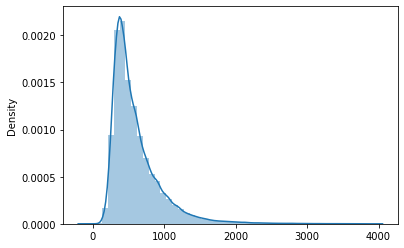

119.35519097190556
Fold 0 end
Fold 1 start
(922869, 270)
y dist plot


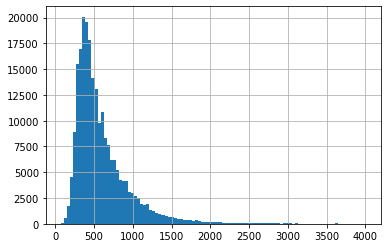

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.174942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2653
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 232


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.506949
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 300.781
[100]	valid_0's huber: 260.7
[150]	valid_0's huber: 230.891
[200]	valid_0's huber: 210.666
[250]	valid_0's huber: 197.291
[300]	valid_0's huber: 187.43
[350]	valid_0's huber: 180.191
[400]	valid_0's huber: 174.681
[450]	valid_0's huber: 170.205
[500]	valid_0's huber: 166.498
[550]	valid_0's huber: 163.44
[600]	valid_0's huber: 160.827
[650]	valid_0's huber: 158.523
[700]	valid_0's huber: 156.519
[750]	valid_0's huber: 154.737
[800]	valid_0's huber: 153.13
[850]	valid_0's huber: 151.736
[900]	valid_0's huber: 150.48
[950]	valid_0's huber: 149.39
[1000]	valid_0's huber: 148.324
[1050]	valid_0's huber: 147.335
[1100]	valid_0's huber: 146.427
[1150]	valid_0's huber: 145.539
[1200]	valid_0's huber: 144.564
[1250]	valid_0's huber: 143.72
[1300]	valid_0's huber: 142.969
[1350]	valid_0's huber: 142.317
[1400]	valid_0's huber: 141.592
[1450]	valid_0'

[12700]	valid_0's huber: 109.516
[12750]	valid_0's huber: 109.479
[12800]	valid_0's huber: 109.439
[12850]	valid_0's huber: 109.374
[12900]	valid_0's huber: 109.324
[12950]	valid_0's huber: 109.236
[13000]	valid_0's huber: 109.176
[13050]	valid_0's huber: 109.117
[13100]	valid_0's huber: 109.05
[13150]	valid_0's huber: 108.983
[13200]	valid_0's huber: 108.911
[13250]	valid_0's huber: 108.866
[13300]	valid_0's huber: 108.825
[13350]	valid_0's huber: 108.776
[13400]	valid_0's huber: 108.71
[13450]	valid_0's huber: 108.649
[13500]	valid_0's huber: 108.589
[13550]	valid_0's huber: 108.52
[13600]	valid_0's huber: 108.431
[13650]	valid_0's huber: 108.386
[13700]	valid_0's huber: 108.327
[13750]	valid_0's huber: 108.285
[13800]	valid_0's huber: 108.216
[13850]	valid_0's huber: 108.136
[13900]	valid_0's huber: 108.062
[13950]	valid_0's huber: 107.99
[14000]	valid_0's huber: 107.921
[14050]	valid_0's huber: 107.861
[14100]	valid_0's huber: 107.808
[14150]	valid_0's huber: 107.725
[14200]	valid_

[25200]	valid_0's huber: 97.5569
[25250]	valid_0's huber: 97.5109
[25300]	valid_0's huber: 97.4748
[25350]	valid_0's huber: 97.4383
[25400]	valid_0's huber: 97.4129
[25450]	valid_0's huber: 97.3792
[25500]	valid_0's huber: 97.3511
[25550]	valid_0's huber: 97.3219
[25600]	valid_0's huber: 97.2867
[25650]	valid_0's huber: 97.2304
[25700]	valid_0's huber: 97.1808
[25750]	valid_0's huber: 97.1424
[25800]	valid_0's huber: 97.1109
[25850]	valid_0's huber: 97.0853
[25900]	valid_0's huber: 97.0652
[25950]	valid_0's huber: 97.0437
[26000]	valid_0's huber: 97.0274
[26050]	valid_0's huber: 97.0114
[26100]	valid_0's huber: 96.9917
[26150]	valid_0's huber: 96.973
[26200]	valid_0's huber: 96.958
[26250]	valid_0's huber: 96.9322
[26300]	valid_0's huber: 96.8951
[26350]	valid_0's huber: 96.8752
[26400]	valid_0's huber: 96.8564
[26450]	valid_0's huber: 96.8213
[26500]	valid_0's huber: 96.7909
[26550]	valid_0's huber: 96.764
[26600]	valid_0's huber: 96.744
[26650]	valid_0's huber: 96.714
[26700]	valid_0

[37700]	valid_0's huber: 90.9241
[37750]	valid_0's huber: 90.9014
[37800]	valid_0's huber: 90.8805
[37850]	valid_0's huber: 90.8621
[37900]	valid_0's huber: 90.8412
[37950]	valid_0's huber: 90.8203
[38000]	valid_0's huber: 90.8038
[38050]	valid_0's huber: 90.7837
[38100]	valid_0's huber: 90.7658
[38150]	valid_0's huber: 90.7478
[38200]	valid_0's huber: 90.7278
[38250]	valid_0's huber: 90.7137
[38300]	valid_0's huber: 90.6885
[38350]	valid_0's huber: 90.6682
[38400]	valid_0's huber: 90.6467
[38450]	valid_0's huber: 90.6292
[38500]	valid_0's huber: 90.614
[38550]	valid_0's huber: 90.5914
[38600]	valid_0's huber: 90.5702
[38650]	valid_0's huber: 90.5548
[38700]	valid_0's huber: 90.522
[38750]	valid_0's huber: 90.5028
[38800]	valid_0's huber: 90.478
[38850]	valid_0's huber: 90.4616
[38900]	valid_0's huber: 90.4359
[38950]	valid_0's huber: 90.4215
[39000]	valid_0's huber: 90.3933
[39050]	valid_0's huber: 90.3761
[39100]	valid_0's huber: 90.3646
[39150]	valid_0's huber: 90.3459
[39200]	valid

[50200]	valid_0's huber: 86.8038
[50250]	valid_0's huber: 86.7907
[50300]	valid_0's huber: 86.7824
[50350]	valid_0's huber: 86.7722
[50400]	valid_0's huber: 86.758
[50450]	valid_0's huber: 86.7393
[50500]	valid_0's huber: 86.7266
[50550]	valid_0's huber: 86.7156
[50600]	valid_0's huber: 86.7052
[50650]	valid_0's huber: 86.6949
[50700]	valid_0's huber: 86.6864
[50750]	valid_0's huber: 86.6713
[50800]	valid_0's huber: 86.6556
[50850]	valid_0's huber: 86.6465
[50900]	valid_0's huber: 86.6315
[50950]	valid_0's huber: 86.6115
[51000]	valid_0's huber: 86.5968
[51050]	valid_0's huber: 86.582
[51100]	valid_0's huber: 86.5713
[51150]	valid_0's huber: 86.5537
[51200]	valid_0's huber: 86.5377
[51250]	valid_0's huber: 86.5299
[51300]	valid_0's huber: 86.5208
[51350]	valid_0's huber: 86.5118
[51400]	valid_0's huber: 86.4966
[51450]	valid_0's huber: 86.4839
[51500]	valid_0's huber: 86.4704
[51550]	valid_0's huber: 86.4548
[51600]	valid_0's huber: 86.4436
[51650]	valid_0's huber: 86.4304
[51700]	vali

[62700]	valid_0's huber: 83.8266
[62750]	valid_0's huber: 83.8112
[62800]	valid_0's huber: 83.802
[62850]	valid_0's huber: 83.793
[62900]	valid_0's huber: 83.7821
[62950]	valid_0's huber: 83.7664
[63000]	valid_0's huber: 83.7513
[63050]	valid_0's huber: 83.7416
[63100]	valid_0's huber: 83.7301
[63150]	valid_0's huber: 83.7119
[63200]	valid_0's huber: 83.7015
[63250]	valid_0's huber: 83.689
[63300]	valid_0's huber: 83.6722
[63350]	valid_0's huber: 83.6611
[63400]	valid_0's huber: 83.6523
[63450]	valid_0's huber: 83.6407
[63500]	valid_0's huber: 83.6281
[63550]	valid_0's huber: 83.6216
[63600]	valid_0's huber: 83.6097
[63650]	valid_0's huber: 83.6004
[63700]	valid_0's huber: 83.5885
[63750]	valid_0's huber: 83.5771
[63800]	valid_0's huber: 83.5629
[63850]	valid_0's huber: 83.5488
[63900]	valid_0's huber: 83.5349
[63950]	valid_0's huber: 83.5254
[64000]	valid_0's huber: 83.5142
[64050]	valid_0's huber: 83.5027
[64100]	valid_0's huber: 83.49
[64150]	valid_0's huber: 83.4773
[64200]	valid_0

[75150]	valid_0's huber: 81.5238
[75200]	valid_0's huber: 81.5175
[75250]	valid_0's huber: 81.5086
[75300]	valid_0's huber: 81.5018
[75350]	valid_0's huber: 81.4932
[75400]	valid_0's huber: 81.4867
[75450]	valid_0's huber: 81.4802
[75500]	valid_0's huber: 81.4711
[75550]	valid_0's huber: 81.4643
[75600]	valid_0's huber: 81.4579
[75650]	valid_0's huber: 81.4518
[75700]	valid_0's huber: 81.4463
[75750]	valid_0's huber: 81.439
[75800]	valid_0's huber: 81.4302
[75850]	valid_0's huber: 81.4236
[75900]	valid_0's huber: 81.4179
[75950]	valid_0's huber: 81.4107
[76000]	valid_0's huber: 81.4029
[76050]	valid_0's huber: 81.3965
[76100]	valid_0's huber: 81.3906
[76150]	valid_0's huber: 81.3835
[76200]	valid_0's huber: 81.374
[76250]	valid_0's huber: 81.3678
[76300]	valid_0's huber: 81.3609
[76350]	valid_0's huber: 81.3551
[76400]	valid_0's huber: 81.3471
[76450]	valid_0's huber: 81.3396
[76500]	valid_0's huber: 81.336
[76550]	valid_0's huber: 81.3313
[76600]	valid_0's huber: 81.3258
[76650]	valid

[87650]	valid_0's huber: 79.8367
[87700]	valid_0's huber: 79.8296
[87750]	valid_0's huber: 79.824
[87800]	valid_0's huber: 79.8201
[87850]	valid_0's huber: 79.8158
[87900]	valid_0's huber: 79.8072
[87950]	valid_0's huber: 79.8023
[88000]	valid_0's huber: 79.7965
[88050]	valid_0's huber: 79.7894
[88100]	valid_0's huber: 79.7841
[88150]	valid_0's huber: 79.7746
[88200]	valid_0's huber: 79.7687
[88250]	valid_0's huber: 79.7634
[88300]	valid_0's huber: 79.7591
[88350]	valid_0's huber: 79.7548
[88400]	valid_0's huber: 79.7496
[88450]	valid_0's huber: 79.7457
[88500]	valid_0's huber: 79.7388
[88550]	valid_0's huber: 79.7311
[88600]	valid_0's huber: 79.7257
[88650]	valid_0's huber: 79.7207
[88700]	valid_0's huber: 79.7147
[88750]	valid_0's huber: 79.7081
[88800]	valid_0's huber: 79.701
[88850]	valid_0's huber: 79.6965
[88900]	valid_0's huber: 79.6889
[88950]	valid_0's huber: 79.6828
[89000]	valid_0's huber: 79.6775
[89050]	valid_0's huber: 79.6737
[89100]	valid_0's huber: 79.6681
[89150]	vali

[100100]	valid_0's huber: 78.4105
[100150]	valid_0's huber: 78.4045
[100200]	valid_0's huber: 78.3995
[100250]	valid_0's huber: 78.3929
[100300]	valid_0's huber: 78.3889
[100350]	valid_0's huber: 78.383
[100400]	valid_0's huber: 78.3763
[100450]	valid_0's huber: 78.3698
[100500]	valid_0's huber: 78.3654
[100550]	valid_0's huber: 78.3611
[100600]	valid_0's huber: 78.3555
[100650]	valid_0's huber: 78.3498
[100700]	valid_0's huber: 78.3466
[100750]	valid_0's huber: 78.3434
[100800]	valid_0's huber: 78.3395
[100850]	valid_0's huber: 78.334
[100900]	valid_0's huber: 78.331
[100950]	valid_0's huber: 78.3263
[101000]	valid_0's huber: 78.3224
[101050]	valid_0's huber: 78.3175
[101100]	valid_0's huber: 78.3134
[101150]	valid_0's huber: 78.307
[101200]	valid_0's huber: 78.3014
[101250]	valid_0's huber: 78.2968
[101300]	valid_0's huber: 78.2922
[101350]	valid_0's huber: 78.2861
[101400]	valid_0's huber: 78.2807
[101450]	valid_0's huber: 78.2766
[101500]	valid_0's huber: 78.2696
[101550]	valid_0's

[112200]	valid_0's huber: 77.2659
[112250]	valid_0's huber: 77.2612
[112300]	valid_0's huber: 77.2573
[112350]	valid_0's huber: 77.2524
[112400]	valid_0's huber: 77.2478
[112450]	valid_0's huber: 77.2447
[112500]	valid_0's huber: 77.2418
[112550]	valid_0's huber: 77.2389
[112600]	valid_0's huber: 77.2357
[112650]	valid_0's huber: 77.232
[112700]	valid_0's huber: 77.2294
[112750]	valid_0's huber: 77.2263
[112800]	valid_0's huber: 77.2228
[112850]	valid_0's huber: 77.2178
[112900]	valid_0's huber: 77.216
[112950]	valid_0's huber: 77.2125
[113000]	valid_0's huber: 77.2089
[113050]	valid_0's huber: 77.2046
[113100]	valid_0's huber: 77.2014
[113150]	valid_0's huber: 77.1977
[113200]	valid_0's huber: 77.1941
[113250]	valid_0's huber: 77.1907
[113300]	valid_0's huber: 77.1872
[113350]	valid_0's huber: 77.1832
[113400]	valid_0's huber: 77.178
[113450]	valid_0's huber: 77.1735
[113500]	valid_0's huber: 77.1687
[113550]	valid_0's huber: 77.1649
[113600]	valid_0's huber: 77.1603
[113650]	valid_0'

[124300]	valid_0's huber: 76.2465
[124350]	valid_0's huber: 76.2433
[124400]	valid_0's huber: 76.2412
[124450]	valid_0's huber: 76.2381
[124500]	valid_0's huber: 76.2368
[124550]	valid_0's huber: 76.2344
[124600]	valid_0's huber: 76.2309
[124650]	valid_0's huber: 76.2275
[124700]	valid_0's huber: 76.2236
[124750]	valid_0's huber: 76.2194
[124800]	valid_0's huber: 76.2152
[124850]	valid_0's huber: 76.2104
[124900]	valid_0's huber: 76.2064
[124950]	valid_0's huber: 76.2013
[125000]	valid_0's huber: 76.1975
[125050]	valid_0's huber: 76.1953
[125100]	valid_0's huber: 76.1917
[125150]	valid_0's huber: 76.1888
[125200]	valid_0's huber: 76.1861
[125250]	valid_0's huber: 76.1828
[125300]	valid_0's huber: 76.1774
[125350]	valid_0's huber: 76.1741
[125400]	valid_0's huber: 76.1694
[125450]	valid_0's huber: 76.1656
[125500]	valid_0's huber: 76.1614
[125550]	valid_0's huber: 76.157
[125600]	valid_0's huber: 76.1533
[125650]	valid_0's huber: 76.1497
[125700]	valid_0's huber: 76.1449
[125750]	valid_

[136400]	valid_0's huber: 75.3671
[136450]	valid_0's huber: 75.3642
[136500]	valid_0's huber: 75.3611
[136550]	valid_0's huber: 75.3585
[136600]	valid_0's huber: 75.3562
[136650]	valid_0's huber: 75.3547
[136700]	valid_0's huber: 75.3516
[136750]	valid_0's huber: 75.3483
[136800]	valid_0's huber: 75.3459
[136850]	valid_0's huber: 75.3442
[136900]	valid_0's huber: 75.3399
[136950]	valid_0's huber: 75.3365
[137000]	valid_0's huber: 75.3335
[137050]	valid_0's huber: 75.33
[137100]	valid_0's huber: 75.3274
[137150]	valid_0's huber: 75.3248
[137200]	valid_0's huber: 75.3209
[137250]	valid_0's huber: 75.3184
[137300]	valid_0's huber: 75.3161
[137350]	valid_0's huber: 75.3134
[137400]	valid_0's huber: 75.3105
[137450]	valid_0's huber: 75.3067
[137500]	valid_0's huber: 75.3019
[137550]	valid_0's huber: 75.2983
[137600]	valid_0's huber: 75.2946
[137650]	valid_0's huber: 75.2915
[137700]	valid_0's huber: 75.2865
[137750]	valid_0's huber: 75.2831
[137800]	valid_0's huber: 75.2796
[137850]	valid_0

[148500]	valid_0's huber: 74.5932
[148550]	valid_0's huber: 74.5902
[148600]	valid_0's huber: 74.5876
[148650]	valid_0's huber: 74.5851
[148700]	valid_0's huber: 74.5824
[148750]	valid_0's huber: 74.5807
[148800]	valid_0's huber: 74.5772
[148850]	valid_0's huber: 74.5735
[148900]	valid_0's huber: 74.5716
[148950]	valid_0's huber: 74.5693
[149000]	valid_0's huber: 74.5658
[149050]	valid_0's huber: 74.563
[149100]	valid_0's huber: 74.5614
[149150]	valid_0's huber: 74.5571
[149200]	valid_0's huber: 74.5537
[149250]	valid_0's huber: 74.55
[149300]	valid_0's huber: 74.5472
[149350]	valid_0's huber: 74.5432
[149400]	valid_0's huber: 74.5397
[149450]	valid_0's huber: 74.5368
[149500]	valid_0's huber: 74.5348
[149550]	valid_0's huber: 74.5314
[149600]	valid_0's huber: 74.5285
[149650]	valid_0's huber: 74.5255
[149700]	valid_0's huber: 74.5238
[149750]	valid_0's huber: 74.5211
[149800]	valid_0's huber: 74.5177
[149850]	valid_0's huber: 74.5153
[149900]	valid_0's huber: 74.5125
[149950]	valid_0'

[160600]	valid_0's huber: 73.9125
[160650]	valid_0's huber: 73.9109
[160700]	valid_0's huber: 73.9083
[160750]	valid_0's huber: 73.9048
[160800]	valid_0's huber: 73.9006
[160850]	valid_0's huber: 73.8975
[160900]	valid_0's huber: 73.8943
[160950]	valid_0's huber: 73.8918
[161000]	valid_0's huber: 73.8891
[161050]	valid_0's huber: 73.8854
[161100]	valid_0's huber: 73.8834
[161150]	valid_0's huber: 73.8807
[161200]	valid_0's huber: 73.8775
[161250]	valid_0's huber: 73.8763
[161300]	valid_0's huber: 73.8726
[161350]	valid_0's huber: 73.87
[161400]	valid_0's huber: 73.8675
[161450]	valid_0's huber: 73.8654
[161500]	valid_0's huber: 73.8621
[161550]	valid_0's huber: 73.8588
[161600]	valid_0's huber: 73.8566
[161650]	valid_0's huber: 73.8534
[161700]	valid_0's huber: 73.8508
[161750]	valid_0's huber: 73.8479
[161800]	valid_0's huber: 73.8466
[161850]	valid_0's huber: 73.8439
[161900]	valid_0's huber: 73.8409
[161950]	valid_0's huber: 73.8376
[162000]	valid_0's huber: 73.8355
[162050]	valid_0

[172700]	valid_0's huber: 73.2942
[172750]	valid_0's huber: 73.2916
[172800]	valid_0's huber: 73.29
[172850]	valid_0's huber: 73.2867
[172900]	valid_0's huber: 73.2854
[172950]	valid_0's huber: 73.2832
[173000]	valid_0's huber: 73.2817
[173050]	valid_0's huber: 73.278
[173100]	valid_0's huber: 73.276
[173150]	valid_0's huber: 73.2745
[173200]	valid_0's huber: 73.2722
[173250]	valid_0's huber: 73.2692
[173300]	valid_0's huber: 73.2669
[173350]	valid_0's huber: 73.2658
[173400]	valid_0's huber: 73.2632
[173450]	valid_0's huber: 73.262
[173500]	valid_0's huber: 73.2592
[173550]	valid_0's huber: 73.2573
[173600]	valid_0's huber: 73.2552
[173650]	valid_0's huber: 73.2527
[173700]	valid_0's huber: 73.2492
[173750]	valid_0's huber: 73.2466
[173800]	valid_0's huber: 73.245
[173850]	valid_0's huber: 73.243
[173900]	valid_0's huber: 73.2393
[173950]	valid_0's huber: 73.2369
[174000]	valid_0's huber: 73.2348
[174050]	valid_0's huber: 73.2322
[174100]	valid_0's huber: 73.23
[174150]	valid_0's hube

[184800]	valid_0's huber: 72.7559
[184850]	valid_0's huber: 72.7517
[184900]	valid_0's huber: 72.7506
[184950]	valid_0's huber: 72.7486
[185000]	valid_0's huber: 72.747
[185050]	valid_0's huber: 72.7444
[185100]	valid_0's huber: 72.7415
[185150]	valid_0's huber: 72.7397
[185200]	valid_0's huber: 72.7374
[185250]	valid_0's huber: 72.7354
[185300]	valid_0's huber: 72.7331
[185350]	valid_0's huber: 72.7313
[185400]	valid_0's huber: 72.7282
[185450]	valid_0's huber: 72.726
[185500]	valid_0's huber: 72.7228
[185550]	valid_0's huber: 72.7215
[185600]	valid_0's huber: 72.7199
[185650]	valid_0's huber: 72.718
[185700]	valid_0's huber: 72.7161
[185750]	valid_0's huber: 72.7148
[185800]	valid_0's huber: 72.7133
[185850]	valid_0's huber: 72.7116
[185900]	valid_0's huber: 72.7094
[185950]	valid_0's huber: 72.7072
[186000]	valid_0's huber: 72.7055
[186050]	valid_0's huber: 72.7032
[186100]	valid_0's huber: 72.7011
[186150]	valid_0's huber: 72.6999
[186200]	valid_0's huber: 72.6981
[186250]	valid_0'

[196900]	valid_0's huber: 72.2701
[196950]	valid_0's huber: 72.2683
[197000]	valid_0's huber: 72.2662
[197050]	valid_0's huber: 72.2646
[197100]	valid_0's huber: 72.2628
[197150]	valid_0's huber: 72.2592
[197200]	valid_0's huber: 72.2574
[197250]	valid_0's huber: 72.2555
[197300]	valid_0's huber: 72.2532
[197350]	valid_0's huber: 72.2513
[197400]	valid_0's huber: 72.2502
[197450]	valid_0's huber: 72.2477
[197500]	valid_0's huber: 72.2462
[197550]	valid_0's huber: 72.2428
[197600]	valid_0's huber: 72.2395
[197650]	valid_0's huber: 72.237
[197700]	valid_0's huber: 72.2349
[197750]	valid_0's huber: 72.2331
[197800]	valid_0's huber: 72.2298
[197850]	valid_0's huber: 72.2283
[197900]	valid_0's huber: 72.2269
[197950]	valid_0's huber: 72.2247
[198000]	valid_0's huber: 72.2237
[198050]	valid_0's huber: 72.2215
[198100]	valid_0's huber: 72.2208
[198150]	valid_0's huber: 72.2192
[198200]	valid_0's huber: 72.2176
[198250]	valid_0's huber: 72.2155
[198300]	valid_0's huber: 72.2141
[198350]	valid_

[209000]	valid_0's huber: 71.8238
[209050]	valid_0's huber: 71.8219
[209100]	valid_0's huber: 71.82
[209150]	valid_0's huber: 71.8183
[209200]	valid_0's huber: 71.8162
[209250]	valid_0's huber: 71.8147
[209300]	valid_0's huber: 71.8129
[209350]	valid_0's huber: 71.8105
[209400]	valid_0's huber: 71.8088
[209450]	valid_0's huber: 71.8074
[209500]	valid_0's huber: 71.8062
[209550]	valid_0's huber: 71.8046
[209600]	valid_0's huber: 71.8022
[209650]	valid_0's huber: 71.8006
[209700]	valid_0's huber: 71.7993
[209750]	valid_0's huber: 71.7964
[209800]	valid_0's huber: 71.794
[209850]	valid_0's huber: 71.7922
[209900]	valid_0's huber: 71.7909
[209950]	valid_0's huber: 71.7892
[210000]	valid_0's huber: 71.7865
[210050]	valid_0's huber: 71.7842
[210100]	valid_0's huber: 71.781
[210150]	valid_0's huber: 71.7788
[210200]	valid_0's huber: 71.7776
[210250]	valid_0's huber: 71.7759
[210300]	valid_0's huber: 71.7738
[210350]	valid_0's huber: 71.7723
[210400]	valid_0's huber: 71.7705
[210450]	valid_0's

[221150]	valid_0's huber: 71.3911
[221200]	valid_0's huber: 71.3878
[221250]	valid_0's huber: 71.3861
[221300]	valid_0's huber: 71.3849
[221350]	valid_0's huber: 71.3835
[221400]	valid_0's huber: 71.3816
[221450]	valid_0's huber: 71.3805
[221500]	valid_0's huber: 71.3783
[221550]	valid_0's huber: 71.3765
[221600]	valid_0's huber: 71.3751
[221650]	valid_0's huber: 71.3736
[221700]	valid_0's huber: 71.372
[221750]	valid_0's huber: 71.3706
[221800]	valid_0's huber: 71.3691
[221850]	valid_0's huber: 71.3675
[221900]	valid_0's huber: 71.3658
[221950]	valid_0's huber: 71.3651
[222000]	valid_0's huber: 71.3639
[222050]	valid_0's huber: 71.363
[222100]	valid_0's huber: 71.3605
[222150]	valid_0's huber: 71.359
[222200]	valid_0's huber: 71.3577
[222250]	valid_0's huber: 71.3555
[222300]	valid_0's huber: 71.3548
[222350]	valid_0's huber: 71.353
[222400]	valid_0's huber: 71.3506
[222450]	valid_0's huber: 71.3485
[222500]	valid_0's huber: 71.3473
[222550]	valid_0's huber: 71.3457
[222600]	valid_0's

[233250]	valid_0's huber: 70.9775
[233300]	valid_0's huber: 70.9757
[233350]	valid_0's huber: 70.9746
[233400]	valid_0's huber: 70.973
[233450]	valid_0's huber: 70.9705
[233500]	valid_0's huber: 70.9691
[233550]	valid_0's huber: 70.9674
[233600]	valid_0's huber: 70.9664
[233650]	valid_0's huber: 70.9644
[233700]	valid_0's huber: 70.9628
[233750]	valid_0's huber: 70.9612
[233800]	valid_0's huber: 70.9592
[233850]	valid_0's huber: 70.9574
[233900]	valid_0's huber: 70.9561
[233950]	valid_0's huber: 70.955
[234000]	valid_0's huber: 70.9529
[234050]	valid_0's huber: 70.9515
[234100]	valid_0's huber: 70.9509
[234150]	valid_0's huber: 70.9504
[234200]	valid_0's huber: 70.9488
[234250]	valid_0's huber: 70.9477
[234300]	valid_0's huber: 70.9463
[234350]	valid_0's huber: 70.9447
[234400]	valid_0's huber: 70.9431
[234450]	valid_0's huber: 70.9411
[234500]	valid_0's huber: 70.9395
[234550]	valid_0's huber: 70.9378
[234600]	valid_0's huber: 70.9367
[234650]	valid_0's huber: 70.935
[234700]	valid_0'

[245350]	valid_0's huber: 70.5912
[245400]	valid_0's huber: 70.5876
[245450]	valid_0's huber: 70.586
[245500]	valid_0's huber: 70.5847
[245550]	valid_0's huber: 70.5833
[245600]	valid_0's huber: 70.5824
[245650]	valid_0's huber: 70.5803
[245700]	valid_0's huber: 70.5791
[245750]	valid_0's huber: 70.5761
[245800]	valid_0's huber: 70.5744
[245850]	valid_0's huber: 70.5724
[245900]	valid_0's huber: 70.5714
[245950]	valid_0's huber: 70.5688
[246000]	valid_0's huber: 70.5674
[246050]	valid_0's huber: 70.5654
[246100]	valid_0's huber: 70.5637
[246150]	valid_0's huber: 70.5628
[246200]	valid_0's huber: 70.5615
[246250]	valid_0's huber: 70.5601
[246300]	valid_0's huber: 70.5588
[246350]	valid_0's huber: 70.5565
[246400]	valid_0's huber: 70.555
[246450]	valid_0's huber: 70.5532
[246500]	valid_0's huber: 70.5517
[246550]	valid_0's huber: 70.5501
[246600]	valid_0's huber: 70.5482
[246650]	valid_0's huber: 70.5459
[246700]	valid_0's huber: 70.5445
[246750]	valid_0's huber: 70.5439
[246800]	valid_0

[257450]	valid_0's huber: 70.2186
[257500]	valid_0's huber: 70.2168
[257550]	valid_0's huber: 70.2157
[257600]	valid_0's huber: 70.2136
[257650]	valid_0's huber: 70.2118
[257700]	valid_0's huber: 70.2096
[257750]	valid_0's huber: 70.2086
[257800]	valid_0's huber: 70.2069
[257850]	valid_0's huber: 70.205
[257900]	valid_0's huber: 70.203
[257950]	valid_0's huber: 70.2015
[258000]	valid_0's huber: 70.2012
[258050]	valid_0's huber: 70.1997
[258100]	valid_0's huber: 70.198
[258150]	valid_0's huber: 70.1967
[258200]	valid_0's huber: 70.1943
[258250]	valid_0's huber: 70.193
[258300]	valid_0's huber: 70.192
[258350]	valid_0's huber: 70.1909
[258400]	valid_0's huber: 70.1895
[258450]	valid_0's huber: 70.1886
[258500]	valid_0's huber: 70.1865
[258550]	valid_0's huber: 70.1855
[258600]	valid_0's huber: 70.1835
[258650]	valid_0's huber: 70.1823
[258700]	valid_0's huber: 70.1812
[258750]	valid_0's huber: 70.1806
[258800]	valid_0's huber: 70.1794
[258850]	valid_0's huber: 70.1778
[258900]	valid_0's 

[269550]	valid_0's huber: 69.8788
[269600]	valid_0's huber: 69.8773
[269650]	valid_0's huber: 69.8757
[269700]	valid_0's huber: 69.8744
[269750]	valid_0's huber: 69.8733
[269800]	valid_0's huber: 69.8722
[269850]	valid_0's huber: 69.8703
[269900]	valid_0's huber: 69.8691
[269950]	valid_0's huber: 69.8675
[270000]	valid_0's huber: 69.8657
[270050]	valid_0's huber: 69.8643
[270100]	valid_0's huber: 69.8625
[270150]	valid_0's huber: 69.8617
[270200]	valid_0's huber: 69.8611
[270250]	valid_0's huber: 69.8605
[270300]	valid_0's huber: 69.8598
[270350]	valid_0's huber: 69.8582
[270400]	valid_0's huber: 69.8567
[270450]	valid_0's huber: 69.8554
[270500]	valid_0's huber: 69.8538
[270550]	valid_0's huber: 69.852
[270600]	valid_0's huber: 69.851
[270650]	valid_0's huber: 69.8489
[270700]	valid_0's huber: 69.8471
[270750]	valid_0's huber: 69.8459
[270800]	valid_0's huber: 69.8445
[270850]	valid_0's huber: 69.8435
[270900]	valid_0's huber: 69.8417
[270950]	valid_0's huber: 69.8401
[271000]	valid_0

[281650]	valid_0's huber: 69.5783
[281700]	valid_0's huber: 69.5764
[281750]	valid_0's huber: 69.5749
[281800]	valid_0's huber: 69.5735
[281850]	valid_0's huber: 69.5717
[281900]	valid_0's huber: 69.5703
[281950]	valid_0's huber: 69.5688
[282000]	valid_0's huber: 69.5676
[282050]	valid_0's huber: 69.5668
[282100]	valid_0's huber: 69.5659
[282150]	valid_0's huber: 69.5648
[282200]	valid_0's huber: 69.5633
[282250]	valid_0's huber: 69.5627
[282300]	valid_0's huber: 69.5617
[282350]	valid_0's huber: 69.5609
[282400]	valid_0's huber: 69.5598
[282450]	valid_0's huber: 69.5592
[282500]	valid_0's huber: 69.5579
[282550]	valid_0's huber: 69.5566
[282600]	valid_0's huber: 69.556
[282650]	valid_0's huber: 69.5546
[282700]	valid_0's huber: 69.5538
[282750]	valid_0's huber: 69.553
[282800]	valid_0's huber: 69.5516
[282850]	valid_0's huber: 69.5505
[282900]	valid_0's huber: 69.5497
[282950]	valid_0's huber: 69.5488
[283000]	valid_0's huber: 69.5479
[283050]	valid_0's huber: 69.5468
[283100]	valid_0

[293750]	valid_0's huber: 69.2945
[293800]	valid_0's huber: 69.2937
[293850]	valid_0's huber: 69.2931
[293900]	valid_0's huber: 69.2923
[293950]	valid_0's huber: 69.2911
[294000]	valid_0's huber: 69.29
[294050]	valid_0's huber: 69.2887
[294100]	valid_0's huber: 69.2876
[294150]	valid_0's huber: 69.2867
[294200]	valid_0's huber: 69.2861
[294250]	valid_0's huber: 69.2854
[294300]	valid_0's huber: 69.2848
[294350]	valid_0's huber: 69.2839
[294400]	valid_0's huber: 69.2825
[294450]	valid_0's huber: 69.2814
[294500]	valid_0's huber: 69.2805
[294550]	valid_0's huber: 69.2795
[294600]	valid_0's huber: 69.2787
[294650]	valid_0's huber: 69.2782
[294700]	valid_0's huber: 69.2775
[294750]	valid_0's huber: 69.277
[294800]	valid_0's huber: 69.2752
[294850]	valid_0's huber: 69.2738
[294900]	valid_0's huber: 69.2729
[294950]	valid_0's huber: 69.2715
[295000]	valid_0's huber: 69.2705
[295050]	valid_0's huber: 69.2694
[295100]	valid_0's huber: 69.2683
[295150]	valid_0's huber: 69.2671
[295200]	valid_0'

[305850]	valid_0's huber: 69.0496
[305900]	valid_0's huber: 69.049
[305950]	valid_0's huber: 69.0479
[306000]	valid_0's huber: 69.0471
[306050]	valid_0's huber: 69.046
[306100]	valid_0's huber: 69.0442
[306150]	valid_0's huber: 69.0428
[306200]	valid_0's huber: 69.0424
[306250]	valid_0's huber: 69.041
[306300]	valid_0's huber: 69.0403
[306350]	valid_0's huber: 69.0392
[306400]	valid_0's huber: 69.0383
[306450]	valid_0's huber: 69.037
[306500]	valid_0's huber: 69.0363
[306550]	valid_0's huber: 69.0354
[306600]	valid_0's huber: 69.0348
[306650]	valid_0's huber: 69.0342
[306700]	valid_0's huber: 69.0333
[306750]	valid_0's huber: 69.0323
[306800]	valid_0's huber: 69.0313
[306850]	valid_0's huber: 69.0303
[306900]	valid_0's huber: 69.0294
[306950]	valid_0's huber: 69.0285
[307000]	valid_0's huber: 69.027
[307050]	valid_0's huber: 69.0256
[307100]	valid_0's huber: 69.0245
[307150]	valid_0's huber: 69.0237
[307200]	valid_0's huber: 69.0228
[307250]	valid_0's huber: 69.0222
[307300]	valid_0's 

[317950]	valid_0's huber: 68.8154
[318000]	valid_0's huber: 68.8146
[318050]	valid_0's huber: 68.8138
[318100]	valid_0's huber: 68.8126
[318150]	valid_0's huber: 68.8119
[318200]	valid_0's huber: 68.8108
[318250]	valid_0's huber: 68.81
[318300]	valid_0's huber: 68.8096
[318350]	valid_0's huber: 68.8087
[318400]	valid_0's huber: 68.8078
[318450]	valid_0's huber: 68.807
[318500]	valid_0's huber: 68.806
[318550]	valid_0's huber: 68.8049
[318600]	valid_0's huber: 68.8038
[318650]	valid_0's huber: 68.803
[318700]	valid_0's huber: 68.8025
[318750]	valid_0's huber: 68.8018
[318800]	valid_0's huber: 68.801
[318850]	valid_0's huber: 68.8001
[318900]	valid_0's huber: 68.7989
[318950]	valid_0's huber: 68.7981
[319000]	valid_0's huber: 68.7977
[319050]	valid_0's huber: 68.7969
[319100]	valid_0's huber: 68.7958
[319150]	valid_0's huber: 68.7952
[319200]	valid_0's huber: 68.7938
[319250]	valid_0's huber: 68.7926
[319300]	valid_0's huber: 68.7916
[319350]	valid_0's huber: 68.791
[319400]	valid_0's hu

[330100]	valid_0's huber: 68.6009
[330150]	valid_0's huber: 68.5995
[330200]	valid_0's huber: 68.5987
[330250]	valid_0's huber: 68.5979
[330300]	valid_0's huber: 68.5972
[330350]	valid_0's huber: 68.5962
[330400]	valid_0's huber: 68.5952
[330450]	valid_0's huber: 68.5946
[330500]	valid_0's huber: 68.5935
[330550]	valid_0's huber: 68.5924
[330600]	valid_0's huber: 68.591
[330650]	valid_0's huber: 68.59
[330700]	valid_0's huber: 68.5893
[330750]	valid_0's huber: 68.5887
[330800]	valid_0's huber: 68.5877
[330850]	valid_0's huber: 68.5872
[330900]	valid_0's huber: 68.5859
[330950]	valid_0's huber: 68.5848
[331000]	valid_0's huber: 68.5838
[331050]	valid_0's huber: 68.5833
[331100]	valid_0's huber: 68.5822
[331150]	valid_0's huber: 68.5817
[331200]	valid_0's huber: 68.5806
[331250]	valid_0's huber: 68.5798
[331300]	valid_0's huber: 68.579
[331350]	valid_0's huber: 68.5785
[331400]	valid_0's huber: 68.5775
[331450]	valid_0's huber: 68.5768
[331500]	valid_0's huber: 68.5754
[331550]	valid_0's

[342200]	valid_0's huber: 68.3849
[342250]	valid_0's huber: 68.3839
[342300]	valid_0's huber: 68.3831
[342350]	valid_0's huber: 68.3828
[342400]	valid_0's huber: 68.382
[342450]	valid_0's huber: 68.3817
[342500]	valid_0's huber: 68.3809
[342550]	valid_0's huber: 68.3802
[342600]	valid_0's huber: 68.3793
[342650]	valid_0's huber: 68.3779
[342700]	valid_0's huber: 68.3768
[342750]	valid_0's huber: 68.3758
[342800]	valid_0's huber: 68.3746
[342850]	valid_0's huber: 68.3734
[342900]	valid_0's huber: 68.3726
[342950]	valid_0's huber: 68.3719
[343000]	valid_0's huber: 68.371
[343050]	valid_0's huber: 68.3697
[343100]	valid_0's huber: 68.3689
[343150]	valid_0's huber: 68.3682
[343200]	valid_0's huber: 68.3675
[343250]	valid_0's huber: 68.367
[343300]	valid_0's huber: 68.3667
[343350]	valid_0's huber: 68.3657
[343400]	valid_0's huber: 68.3652
[343450]	valid_0's huber: 68.3645
[343500]	valid_0's huber: 68.3633
[343550]	valid_0's huber: 68.3627
[343600]	valid_0's huber: 68.362
[343650]	valid_0's

[354300]	valid_0's huber: 68.1895
[354350]	valid_0's huber: 68.1886
[354400]	valid_0's huber: 68.1879
[354450]	valid_0's huber: 68.1872
[354500]	valid_0's huber: 68.1865
[354550]	valid_0's huber: 68.1855
[354600]	valid_0's huber: 68.185
[354650]	valid_0's huber: 68.1841
[354700]	valid_0's huber: 68.1835
[354750]	valid_0's huber: 68.1826
[354800]	valid_0's huber: 68.1816
[354850]	valid_0's huber: 68.181
[354900]	valid_0's huber: 68.18
[354950]	valid_0's huber: 68.1791
[355000]	valid_0's huber: 68.1786
[355050]	valid_0's huber: 68.1782
[355100]	valid_0's huber: 68.1775
[355150]	valid_0's huber: 68.1771
[355200]	valid_0's huber: 68.1762
[355250]	valid_0's huber: 68.1755
[355300]	valid_0's huber: 68.1747
[355350]	valid_0's huber: 68.1737
[355400]	valid_0's huber: 68.1724
[355450]	valid_0's huber: 68.1715
[355500]	valid_0's huber: 68.1709
[355550]	valid_0's huber: 68.1699
[355600]	valid_0's huber: 68.1695
[355650]	valid_0's huber: 68.1686
[355700]	valid_0's huber: 68.1679
[355750]	valid_0's

[366400]	valid_0's huber: 68.0065
[366450]	valid_0's huber: 68.0059
[366500]	valid_0's huber: 68.0051
[366550]	valid_0's huber: 68.004
[366600]	valid_0's huber: 68.0031
[366650]	valid_0's huber: 68.0022
[366700]	valid_0's huber: 68.0015
[366750]	valid_0's huber: 68.0009
[366800]	valid_0's huber: 67.9999
[366850]	valid_0's huber: 67.9988
[366900]	valid_0's huber: 67.998
[366950]	valid_0's huber: 67.9973
[367000]	valid_0's huber: 67.9963
[367050]	valid_0's huber: 67.9955
[367100]	valid_0's huber: 67.9952
[367150]	valid_0's huber: 67.9945
[367200]	valid_0's huber: 67.9936
[367250]	valid_0's huber: 67.9927
[367300]	valid_0's huber: 67.9923
[367350]	valid_0's huber: 67.9916
[367400]	valid_0's huber: 67.9907
[367450]	valid_0's huber: 67.99
[367500]	valid_0's huber: 67.9893
[367550]	valid_0's huber: 67.9888
[367600]	valid_0's huber: 67.9882
[367650]	valid_0's huber: 67.9872
[367700]	valid_0's huber: 67.9866
[367750]	valid_0's huber: 67.9857
[367800]	valid_0's huber: 67.985
[367850]	valid_0's 

[378500]	valid_0's huber: 67.8312
[378550]	valid_0's huber: 67.8304
[378600]	valid_0's huber: 67.83
[378650]	valid_0's huber: 67.8289
[378700]	valid_0's huber: 67.8281
[378750]	valid_0's huber: 67.8273
[378800]	valid_0's huber: 67.8263
[378850]	valid_0's huber: 67.8258
[378900]	valid_0's huber: 67.8246
[378950]	valid_0's huber: 67.8241
[379000]	valid_0's huber: 67.8233
[379050]	valid_0's huber: 67.8228
[379100]	valid_0's huber: 67.8228
[379150]	valid_0's huber: 67.822
[379200]	valid_0's huber: 67.8213
[379250]	valid_0's huber: 67.8208
[379300]	valid_0's huber: 67.8203
[379350]	valid_0's huber: 67.8194
[379400]	valid_0's huber: 67.8184
[379450]	valid_0's huber: 67.8176
[379500]	valid_0's huber: 67.817
[379550]	valid_0's huber: 67.8162
[379600]	valid_0's huber: 67.8151
[379650]	valid_0's huber: 67.8142
[379700]	valid_0's huber: 67.8135
[379750]	valid_0's huber: 67.8123
[379800]	valid_0's huber: 67.8116
[379850]	valid_0's huber: 67.81
[379900]	valid_0's huber: 67.8098
[379950]	valid_0's h

[390650]	valid_0's huber: 67.6595
[390700]	valid_0's huber: 67.659
[390750]	valid_0's huber: 67.6585
[390800]	valid_0's huber: 67.6582
[390850]	valid_0's huber: 67.6575
[390900]	valid_0's huber: 67.6569
[390950]	valid_0's huber: 67.6567
[391000]	valid_0's huber: 67.6559
[391050]	valid_0's huber: 67.6552
[391100]	valid_0's huber: 67.655
[391150]	valid_0's huber: 67.6541
[391200]	valid_0's huber: 67.6537
[391250]	valid_0's huber: 67.6532
[391300]	valid_0's huber: 67.6528
[391350]	valid_0's huber: 67.6522
[391400]	valid_0's huber: 67.6517
[391450]	valid_0's huber: 67.651
[391500]	valid_0's huber: 67.6499
[391550]	valid_0's huber: 67.6496
[391600]	valid_0's huber: 67.649
[391650]	valid_0's huber: 67.6482
[391700]	valid_0's huber: 67.6472
[391750]	valid_0's huber: 67.6466
[391800]	valid_0's huber: 67.6462
[391850]	valid_0's huber: 67.6457
[391900]	valid_0's huber: 67.6452
[391950]	valid_0's huber: 67.6446
[392000]	valid_0's huber: 67.6438
[392050]	valid_0's huber: 67.6431
[392100]	valid_0's

[402750]	valid_0's huber: 67.5069
[402800]	valid_0's huber: 67.5066
[402850]	valid_0's huber: 67.506
[402900]	valid_0's huber: 67.5055
[402950]	valid_0's huber: 67.5048
[403000]	valid_0's huber: 67.5045
[403050]	valid_0's huber: 67.5039
[403100]	valid_0's huber: 67.5034
[403150]	valid_0's huber: 67.5027
[403200]	valid_0's huber: 67.5021
[403250]	valid_0's huber: 67.5012
[403300]	valid_0's huber: 67.5004
[403350]	valid_0's huber: 67.5002
[403400]	valid_0's huber: 67.4998
[403450]	valid_0's huber: 67.4993
[403500]	valid_0's huber: 67.4988
[403550]	valid_0's huber: 67.4983
[403600]	valid_0's huber: 67.4978
[403650]	valid_0's huber: 67.4969
[403700]	valid_0's huber: 67.4962
[403750]	valid_0's huber: 67.4959
[403800]	valid_0's huber: 67.4951
[403850]	valid_0's huber: 67.4944
[403900]	valid_0's huber: 67.4935
[403950]	valid_0's huber: 67.4931
[404000]	valid_0's huber: 67.4925
[404050]	valid_0's huber: 67.492
[404100]	valid_0's huber: 67.4913
[404150]	valid_0's huber: 67.4907
[404200]	valid_0

[414850]	valid_0's huber: 67.3568
[414900]	valid_0's huber: 67.3567
[414950]	valid_0's huber: 67.356
[415000]	valid_0's huber: 67.3552
[415050]	valid_0's huber: 67.3544
[415100]	valid_0's huber: 67.3538
[415150]	valid_0's huber: 67.3533
[415200]	valid_0's huber: 67.3531
[415250]	valid_0's huber: 67.3529
[415300]	valid_0's huber: 67.3524
[415350]	valid_0's huber: 67.3518
[415400]	valid_0's huber: 67.3515
[415450]	valid_0's huber: 67.3513
[415500]	valid_0's huber: 67.3511
[415550]	valid_0's huber: 67.3503
[415600]	valid_0's huber: 67.3492
[415650]	valid_0's huber: 67.3487
[415700]	valid_0's huber: 67.3484
[415750]	valid_0's huber: 67.3479
[415800]	valid_0's huber: 67.3473
[415850]	valid_0's huber: 67.3469
[415900]	valid_0's huber: 67.3464
[415950]	valid_0's huber: 67.3459
[416000]	valid_0's huber: 67.3452
[416050]	valid_0's huber: 67.344
[416100]	valid_0's huber: 67.3435
[416150]	valid_0's huber: 67.3427
[416200]	valid_0's huber: 67.3416
[416250]	valid_0's huber: 67.341
[416300]	valid_0'

[426950]	valid_0's huber: 67.2244
[427000]	valid_0's huber: 67.2239
[427050]	valid_0's huber: 67.2232
[427100]	valid_0's huber: 67.2227
[427150]	valid_0's huber: 67.2221
[427200]	valid_0's huber: 67.2216
[427250]	valid_0's huber: 67.2215
[427300]	valid_0's huber: 67.2214
[427350]	valid_0's huber: 67.2202
[427400]	valid_0's huber: 67.2199
[427450]	valid_0's huber: 67.2198
[427500]	valid_0's huber: 67.2195
[427550]	valid_0's huber: 67.2192
[427600]	valid_0's huber: 67.2188
[427650]	valid_0's huber: 67.2178
[427700]	valid_0's huber: 67.2175
[427750]	valid_0's huber: 67.2168
[427800]	valid_0's huber: 67.2164
[427850]	valid_0's huber: 67.2156
[427900]	valid_0's huber: 67.2151
[427950]	valid_0's huber: 67.2147
[428000]	valid_0's huber: 67.2136
[428050]	valid_0's huber: 67.2131
[428100]	valid_0's huber: 67.2126
[428150]	valid_0's huber: 67.2116
[428200]	valid_0's huber: 67.2108
[428250]	valid_0's huber: 67.2101
[428300]	valid_0's huber: 67.2096
[428350]	valid_0's huber: 67.2094
[428400]	valid

[439050]	valid_0's huber: 67.0869
[439100]	valid_0's huber: 67.0863
[439150]	valid_0's huber: 67.0859
[439200]	valid_0's huber: 67.0858
[439250]	valid_0's huber: 67.0852
[439300]	valid_0's huber: 67.0841
[439350]	valid_0's huber: 67.0836
[439400]	valid_0's huber: 67.0833
[439450]	valid_0's huber: 67.0829
[439500]	valid_0's huber: 67.0825
[439550]	valid_0's huber: 67.082
[439600]	valid_0's huber: 67.0817
[439650]	valid_0's huber: 67.081
[439700]	valid_0's huber: 67.0805
[439750]	valid_0's huber: 67.0802
[439800]	valid_0's huber: 67.08
[439850]	valid_0's huber: 67.0796
[439900]	valid_0's huber: 67.0787
[439950]	valid_0's huber: 67.0779
[440000]	valid_0's huber: 67.0775
[440050]	valid_0's huber: 67.077
[440100]	valid_0's huber: 67.0766
[440150]	valid_0's huber: 67.0761
[440200]	valid_0's huber: 67.0755
[440250]	valid_0's huber: 67.0748
[440300]	valid_0's huber: 67.0741
[440350]	valid_0's huber: 67.0737
[440400]	valid_0's huber: 67.0727
[440450]	valid_0's huber: 67.0724
[440500]	valid_0's 

[451150]	valid_0's huber: 66.9573
[451200]	valid_0's huber: 66.9567
[451250]	valid_0's huber: 66.9561
[451300]	valid_0's huber: 66.9555
[451350]	valid_0's huber: 66.9554
[451400]	valid_0's huber: 66.9551
[451450]	valid_0's huber: 66.955
[451500]	valid_0's huber: 66.9546
[451550]	valid_0's huber: 66.954
[451600]	valid_0's huber: 66.9538
[451650]	valid_0's huber: 66.9535
[451700]	valid_0's huber: 66.953
[451750]	valid_0's huber: 66.9524
[451800]	valid_0's huber: 66.9519
[451850]	valid_0's huber: 66.9513
[451900]	valid_0's huber: 66.9508
[451950]	valid_0's huber: 66.9504
[452000]	valid_0's huber: 66.9498
[452050]	valid_0's huber: 66.9494
[452100]	valid_0's huber: 66.9488
[452150]	valid_0's huber: 66.9484
[452200]	valid_0's huber: 66.9481
[452250]	valid_0's huber: 66.9476
[452300]	valid_0's huber: 66.9472
[452350]	valid_0's huber: 66.9465
[452400]	valid_0's huber: 66.9461
[452450]	valid_0's huber: 66.9458
[452500]	valid_0's huber: 66.9456
[452550]	valid_0's huber: 66.9453
[452600]	valid_0'

[463250]	valid_0's huber: 66.843
[463300]	valid_0's huber: 66.8421
[463350]	valid_0's huber: 66.8415
[463400]	valid_0's huber: 66.8413
[463450]	valid_0's huber: 66.8405
[463500]	valid_0's huber: 66.8403
[463550]	valid_0's huber: 66.8402
[463600]	valid_0's huber: 66.84
[463650]	valid_0's huber: 66.8395
[463700]	valid_0's huber: 66.8393
[463750]	valid_0's huber: 66.8391
[463800]	valid_0's huber: 66.8387
[463850]	valid_0's huber: 66.838
[463900]	valid_0's huber: 66.838
[463950]	valid_0's huber: 66.8378
[464000]	valid_0's huber: 66.8373
[464050]	valid_0's huber: 66.837
[464100]	valid_0's huber: 66.8367
[464150]	valid_0's huber: 66.8363
[464200]	valid_0's huber: 66.8358
[464250]	valid_0's huber: 66.8357
[464300]	valid_0's huber: 66.8353
[464350]	valid_0's huber: 66.8346
[464400]	valid_0's huber: 66.8341
[464450]	valid_0's huber: 66.8338
[464500]	valid_0's huber: 66.8331
[464550]	valid_0's huber: 66.8326
[464600]	valid_0's huber: 66.832
[464650]	valid_0's huber: 66.832
[464700]	valid_0's hub

[475350]	valid_0's huber: 66.7328
[475400]	valid_0's huber: 66.7319
[475450]	valid_0's huber: 66.7313
[475500]	valid_0's huber: 66.731
[475550]	valid_0's huber: 66.7307
[475600]	valid_0's huber: 66.7301
[475650]	valid_0's huber: 66.7294
[475700]	valid_0's huber: 66.7292
[475750]	valid_0's huber: 66.7288
[475800]	valid_0's huber: 66.7287
[475850]	valid_0's huber: 66.7282
[475900]	valid_0's huber: 66.7275
[475950]	valid_0's huber: 66.7271
[476000]	valid_0's huber: 66.7265
[476050]	valid_0's huber: 66.7264
[476100]	valid_0's huber: 66.7256
[476150]	valid_0's huber: 66.7253
[476200]	valid_0's huber: 66.7247
[476250]	valid_0's huber: 66.724
[476300]	valid_0's huber: 66.7236
[476350]	valid_0's huber: 66.7232
[476400]	valid_0's huber: 66.7224
[476450]	valid_0's huber: 66.7219
[476500]	valid_0's huber: 66.7216
[476550]	valid_0's huber: 66.7211
[476600]	valid_0's huber: 66.7206
[476650]	valid_0's huber: 66.7201
[476700]	valid_0's huber: 66.7189
[476750]	valid_0's huber: 66.7187
[476800]	valid_0

[487450]	valid_0's huber: 66.6213
[487500]	valid_0's huber: 66.6208
[487550]	valid_0's huber: 66.6207
[487600]	valid_0's huber: 66.6204
[487650]	valid_0's huber: 66.6201
[487700]	valid_0's huber: 66.62
[487750]	valid_0's huber: 66.6191
[487800]	valid_0's huber: 66.6186
[487850]	valid_0's huber: 66.618
[487900]	valid_0's huber: 66.6176
[487950]	valid_0's huber: 66.6166
[488000]	valid_0's huber: 66.6162
[488050]	valid_0's huber: 66.6156
[488100]	valid_0's huber: 66.6152
[488150]	valid_0's huber: 66.6149
[488200]	valid_0's huber: 66.6146
[488250]	valid_0's huber: 66.6141
[488300]	valid_0's huber: 66.6135
[488350]	valid_0's huber: 66.6126
[488400]	valid_0's huber: 66.6121
[488450]	valid_0's huber: 66.6119
[488500]	valid_0's huber: 66.6117
[488550]	valid_0's huber: 66.6115
[488600]	valid_0's huber: 66.6112
[488650]	valid_0's huber: 66.6108
[488700]	valid_0's huber: 66.6104
[488750]	valid_0's huber: 66.61
[488800]	valid_0's huber: 66.6098
[488850]	valid_0's huber: 66.6096
[488900]	valid_0's 

[499550]	valid_0's huber: 66.5178
[499600]	valid_0's huber: 66.5178
[499650]	valid_0's huber: 66.517
[499700]	valid_0's huber: 66.5165
[499750]	valid_0's huber: 66.5162
[499800]	valid_0's huber: 66.5161
[499850]	valid_0's huber: 66.5155
[499900]	valid_0's huber: 66.5152
[499950]	valid_0's huber: 66.5146
[500000]	valid_0's huber: 66.5141
[500050]	valid_0's huber: 66.5138
[500100]	valid_0's huber: 66.5131
[500150]	valid_0's huber: 66.5127
[500200]	valid_0's huber: 66.5125
[500250]	valid_0's huber: 66.5121
[500300]	valid_0's huber: 66.5113
[500350]	valid_0's huber: 66.511
[500400]	valid_0's huber: 66.5106
[500450]	valid_0's huber: 66.5105
[500500]	valid_0's huber: 66.5096
[500550]	valid_0's huber: 66.5089
[500600]	valid_0's huber: 66.5086
[500650]	valid_0's huber: 66.5081
[500700]	valid_0's huber: 66.5078
[500750]	valid_0's huber: 66.5075
[500800]	valid_0's huber: 66.5072
[500850]	valid_0's huber: 66.5063
[500900]	valid_0's huber: 66.506
[500950]	valid_0's huber: 66.5058
[501000]	valid_0'

[511650]	valid_0's huber: 66.4154
[511700]	valid_0's huber: 66.4147
[511750]	valid_0's huber: 66.4145
[511800]	valid_0's huber: 66.4144
[511850]	valid_0's huber: 66.4137
[511900]	valid_0's huber: 66.4131
[511950]	valid_0's huber: 66.4128
[512000]	valid_0's huber: 66.412
[512050]	valid_0's huber: 66.4118
[512100]	valid_0's huber: 66.4117
[512150]	valid_0's huber: 66.4116
[512200]	valid_0's huber: 66.411
[512250]	valid_0's huber: 66.4111
[512300]	valid_0's huber: 66.4106
[512350]	valid_0's huber: 66.4099
[512400]	valid_0's huber: 66.409
[512450]	valid_0's huber: 66.4087
[512500]	valid_0's huber: 66.408
[512550]	valid_0's huber: 66.4076
[512600]	valid_0's huber: 66.407
[512650]	valid_0's huber: 66.4065
[512700]	valid_0's huber: 66.4063
[512750]	valid_0's huber: 66.4061
[512800]	valid_0's huber: 66.4055
[512850]	valid_0's huber: 66.4049
[512900]	valid_0's huber: 66.404
[512950]	valid_0's huber: 66.4033
[513000]	valid_0's huber: 66.403
[513050]	valid_0's huber: 66.4027
[513100]	valid_0's hu

[523750]	valid_0's huber: 66.3164
[523800]	valid_0's huber: 66.316
[523850]	valid_0's huber: 66.3156
[523900]	valid_0's huber: 66.3155
[523950]	valid_0's huber: 66.315
[524000]	valid_0's huber: 66.3145
[524050]	valid_0's huber: 66.3141
[524100]	valid_0's huber: 66.3138
[524150]	valid_0's huber: 66.3137
[524200]	valid_0's huber: 66.3136
[524250]	valid_0's huber: 66.313
[524300]	valid_0's huber: 66.3128
[524350]	valid_0's huber: 66.3124
[524400]	valid_0's huber: 66.3119
[524450]	valid_0's huber: 66.3114
[524500]	valid_0's huber: 66.3106
[524550]	valid_0's huber: 66.3103
[524600]	valid_0's huber: 66.3098
[524650]	valid_0's huber: 66.3093
[524700]	valid_0's huber: 66.3091
[524750]	valid_0's huber: 66.3089
[524800]	valid_0's huber: 66.3085
[524850]	valid_0's huber: 66.3079
[524900]	valid_0's huber: 66.3077
[524950]	valid_0's huber: 66.3075
[525000]	valid_0's huber: 66.3068
[525050]	valid_0's huber: 66.3065
[525100]	valid_0's huber: 66.3061
[525150]	valid_0's huber: 66.3058
[525200]	valid_0'

[535850]	valid_0's huber: 66.2206
[535900]	valid_0's huber: 66.2204
[535950]	valid_0's huber: 66.2202
[536000]	valid_0's huber: 66.2195
[536050]	valid_0's huber: 66.2193
[536100]	valid_0's huber: 66.2191
[536150]	valid_0's huber: 66.2187
[536200]	valid_0's huber: 66.2183
[536250]	valid_0's huber: 66.2181
[536300]	valid_0's huber: 66.2183
[536350]	valid_0's huber: 66.2183
Early stopping, best iteration is:
[536251]	valid_0's huber: 66.2181
preds dist plot


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


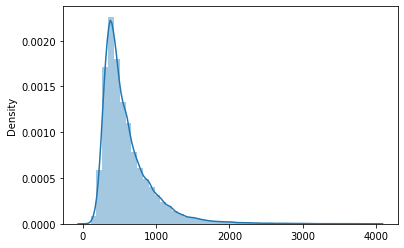

116.94981291946833
Fold 1 end
Fold 2 start
(922869, 270)
y dist plot


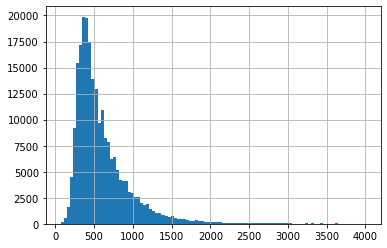

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 229


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.128319
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 302.901
[100]	valid_0's huber: 262.816
[150]	valid_0's huber: 233.04
[200]	valid_0's huber: 212.743
[250]	valid_0's huber: 199.365
[300]	valid_0's huber: 189.329
[350]	valid_0's huber: 181.939
[400]	valid_0's huber: 176.304
[450]	valid_0's huber: 171.736
[500]	valid_0's huber: 167.972
[550]	valid_0's huber: 164.826
[600]	valid_0's huber: 162.087
[650]	valid_0's huber: 159.732
[700]	valid_0's huber: 157.655
[750]	valid_0's huber: 155.8
[800]	valid_0's huber: 154.106
[850]	valid_0's huber: 152.62
[900]	valid_0's huber: 151.354
[950]	valid_0's huber: 150.218
[1000]	valid_0's huber: 149.158
[1050]	valid_0's huber: 148.157
[1100]	valid_0's huber: 147.207
[1150]	valid_0's huber: 146.219
[1200]	valid_0's huber: 145.387
[1250]	valid_0's huber: 144.584
[1300]	valid_0's huber: 143.882
[1350]	valid_0's huber: 143.229
[1400]	valid_0's huber: 142.574
[1450]	vali

[12700]	valid_0's huber: 109.609
[12750]	valid_0's huber: 109.565
[12800]	valid_0's huber: 109.528
[12850]	valid_0's huber: 109.434
[12900]	valid_0's huber: 109.327
[12950]	valid_0's huber: 109.248
[13000]	valid_0's huber: 109.167
[13050]	valid_0's huber: 109.081
[13100]	valid_0's huber: 108.992
[13150]	valid_0's huber: 108.922
[13200]	valid_0's huber: 108.846
[13250]	valid_0's huber: 108.782
[13300]	valid_0's huber: 108.71
[13350]	valid_0's huber: 108.613
[13400]	valid_0's huber: 108.543
[13450]	valid_0's huber: 108.474
[13500]	valid_0's huber: 108.4
[13550]	valid_0's huber: 108.356
[13600]	valid_0's huber: 108.287
[13650]	valid_0's huber: 108.222
[13700]	valid_0's huber: 108.151
[13750]	valid_0's huber: 108.086
[13800]	valid_0's huber: 108.018
[13850]	valid_0's huber: 107.956
[13900]	valid_0's huber: 107.876
[13950]	valid_0's huber: 107.794
[14000]	valid_0's huber: 107.715
[14050]	valid_0's huber: 107.67
[14100]	valid_0's huber: 107.625
[14150]	valid_0's huber: 107.586
[14200]	valid_

[25200]	valid_0's huber: 97.7091
[25250]	valid_0's huber: 97.6756
[25300]	valid_0's huber: 97.6388
[25350]	valid_0's huber: 97.6022
[25400]	valid_0's huber: 97.5713
[25450]	valid_0's huber: 97.5445
[25500]	valid_0's huber: 97.5135
[25550]	valid_0's huber: 97.4691
[25600]	valid_0's huber: 97.4248
[25650]	valid_0's huber: 97.3883
[25700]	valid_0's huber: 97.3484
[25750]	valid_0's huber: 97.326
[25800]	valid_0's huber: 97.2884
[25850]	valid_0's huber: 97.2513
[25900]	valid_0's huber: 97.2196
[25950]	valid_0's huber: 97.178
[26000]	valid_0's huber: 97.1506
[26050]	valid_0's huber: 97.1057
[26100]	valid_0's huber: 97.06
[26150]	valid_0's huber: 97.0307
[26200]	valid_0's huber: 96.9937
[26250]	valid_0's huber: 96.9577
[26300]	valid_0's huber: 96.9221
[26350]	valid_0's huber: 96.8891
[26400]	valid_0's huber: 96.8525
[26450]	valid_0's huber: 96.8201
[26500]	valid_0's huber: 96.7761
[26550]	valid_0's huber: 96.7371
[26600]	valid_0's huber: 96.7154
[26650]	valid_0's huber: 96.6802
[26700]	valid_

[37700]	valid_0's huber: 91.0029
[37750]	valid_0's huber: 90.9818
[37800]	valid_0's huber: 90.9553
[37850]	valid_0's huber: 90.9316
[37900]	valid_0's huber: 90.9002
[37950]	valid_0's huber: 90.8756
[38000]	valid_0's huber: 90.8613
[38050]	valid_0's huber: 90.8418
[38100]	valid_0's huber: 90.8277
[38150]	valid_0's huber: 90.8052
[38200]	valid_0's huber: 90.78
[38250]	valid_0's huber: 90.7581
[38300]	valid_0's huber: 90.7403
[38350]	valid_0's huber: 90.7235
[38400]	valid_0's huber: 90.7062
[38450]	valid_0's huber: 90.6822
[38500]	valid_0's huber: 90.6687
[38550]	valid_0's huber: 90.6471
[38600]	valid_0's huber: 90.6228
[38650]	valid_0's huber: 90.6048
[38700]	valid_0's huber: 90.5887
[38750]	valid_0's huber: 90.5749
[38800]	valid_0's huber: 90.5551
[38850]	valid_0's huber: 90.5363
[38900]	valid_0's huber: 90.5148
[38950]	valid_0's huber: 90.495
[39000]	valid_0's huber: 90.473
[39050]	valid_0's huber: 90.4516
[39100]	valid_0's huber: 90.4309
[39150]	valid_0's huber: 90.4055
[39200]	valid_

[50150]	valid_0's huber: 86.6398
[50200]	valid_0's huber: 86.6294
[50250]	valid_0's huber: 86.6149
[50300]	valid_0's huber: 86.5985
[50350]	valid_0's huber: 86.5856
[50400]	valid_0's huber: 86.5731
[50450]	valid_0's huber: 86.5581
[50500]	valid_0's huber: 86.5487
[50550]	valid_0's huber: 86.5353
[50600]	valid_0's huber: 86.5225
[50650]	valid_0's huber: 86.511
[50700]	valid_0's huber: 86.5004
[50750]	valid_0's huber: 86.4863
[50800]	valid_0's huber: 86.477
[50850]	valid_0's huber: 86.4642
[50900]	valid_0's huber: 86.4525
[50950]	valid_0's huber: 86.4392
[51000]	valid_0's huber: 86.426
[51050]	valid_0's huber: 86.4097
[51100]	valid_0's huber: 86.398
[51150]	valid_0's huber: 86.3912
[51200]	valid_0's huber: 86.3812
[51250]	valid_0's huber: 86.3702
[51300]	valid_0's huber: 86.3602
[51350]	valid_0's huber: 86.3469
[51400]	valid_0's huber: 86.3384
[51450]	valid_0's huber: 86.3246
[51500]	valid_0's huber: 86.31
[51550]	valid_0's huber: 86.2927
[51600]	valid_0's huber: 86.281
[51650]	valid_0's

[62650]	valid_0's huber: 83.6402
[62700]	valid_0's huber: 83.6298
[62750]	valid_0's huber: 83.624
[62800]	valid_0's huber: 83.6137
[62850]	valid_0's huber: 83.6006
[62900]	valid_0's huber: 83.5849
[62950]	valid_0's huber: 83.5739
[63000]	valid_0's huber: 83.5626
[63050]	valid_0's huber: 83.5505
[63100]	valid_0's huber: 83.5348
[63150]	valid_0's huber: 83.5239
[63200]	valid_0's huber: 83.5163
[63250]	valid_0's huber: 83.5055
[63300]	valid_0's huber: 83.495
[63350]	valid_0's huber: 83.4854
[63400]	valid_0's huber: 83.4724
[63450]	valid_0's huber: 83.4638
[63500]	valid_0's huber: 83.452
[63550]	valid_0's huber: 83.4422
[63600]	valid_0's huber: 83.4349
[63650]	valid_0's huber: 83.4265
[63700]	valid_0's huber: 83.4173
[63750]	valid_0's huber: 83.4115
[63800]	valid_0's huber: 83.4045
[63850]	valid_0's huber: 83.3976
[63900]	valid_0's huber: 83.3875
[63950]	valid_0's huber: 83.3774
[64000]	valid_0's huber: 83.3664
[64050]	valid_0's huber: 83.3575
[64100]	valid_0's huber: 83.3495
[64150]	valid

[75150]	valid_0's huber: 81.6119
[75200]	valid_0's huber: 81.6045
[75250]	valid_0's huber: 81.5999
[75300]	valid_0's huber: 81.5935
[75350]	valid_0's huber: 81.5883
[75400]	valid_0's huber: 81.5811
[75450]	valid_0's huber: 81.5714
[75500]	valid_0's huber: 81.563
[75550]	valid_0's huber: 81.5531
[75600]	valid_0's huber: 81.5453
[75650]	valid_0's huber: 81.5385
[75700]	valid_0's huber: 81.533
[75750]	valid_0's huber: 81.5242
[75800]	valid_0's huber: 81.5172
[75850]	valid_0's huber: 81.5097
[75900]	valid_0's huber: 81.5003
[75950]	valid_0's huber: 81.4921
[76000]	valid_0's huber: 81.4824
[76050]	valid_0's huber: 81.4753
[76100]	valid_0's huber: 81.4683
[76150]	valid_0's huber: 81.4592
[76200]	valid_0's huber: 81.4511
[76250]	valid_0's huber: 81.4432
[76300]	valid_0's huber: 81.4361
[76350]	valid_0's huber: 81.4297
[76400]	valid_0's huber: 81.4233
[76450]	valid_0's huber: 81.4146
[76500]	valid_0's huber: 81.4054
[76550]	valid_0's huber: 81.3965
[76600]	valid_0's huber: 81.3862
[76650]	vali

[87600]	valid_0's huber: 79.9297
[87650]	valid_0's huber: 79.9232
[87700]	valid_0's huber: 79.9178
[87750]	valid_0's huber: 79.9114
[87800]	valid_0's huber: 79.9072
[87850]	valid_0's huber: 79.8998
[87900]	valid_0's huber: 79.8934
[87950]	valid_0's huber: 79.8849
[88000]	valid_0's huber: 79.8795
[88050]	valid_0's huber: 79.8731
[88100]	valid_0's huber: 79.8672
[88150]	valid_0's huber: 79.8625
[88200]	valid_0's huber: 79.8585
[88250]	valid_0's huber: 79.8509
[88300]	valid_0's huber: 79.8455
[88350]	valid_0's huber: 79.838
[88400]	valid_0's huber: 79.8315
[88450]	valid_0's huber: 79.8272
[88500]	valid_0's huber: 79.8225
[88550]	valid_0's huber: 79.8179
[88600]	valid_0's huber: 79.8117
[88650]	valid_0's huber: 79.8066
[88700]	valid_0's huber: 79.7961
[88750]	valid_0's huber: 79.7892
[88800]	valid_0's huber: 79.7836
[88850]	valid_0's huber: 79.7801
[88900]	valid_0's huber: 79.777
[88950]	valid_0's huber: 79.7711
[89000]	valid_0's huber: 79.7672
[89050]	valid_0's huber: 79.7602
[89100]	vali

[100050]	valid_0's huber: 78.4576
[100100]	valid_0's huber: 78.4519
[100150]	valid_0's huber: 78.446
[100200]	valid_0's huber: 78.441
[100250]	valid_0's huber: 78.4354
[100300]	valid_0's huber: 78.4291
[100350]	valid_0's huber: 78.4204
[100400]	valid_0's huber: 78.4125
[100450]	valid_0's huber: 78.4066
[100500]	valid_0's huber: 78.3967
[100550]	valid_0's huber: 78.3926
[100600]	valid_0's huber: 78.3879
[100650]	valid_0's huber: 78.3834
[100700]	valid_0's huber: 78.3803
[100750]	valid_0's huber: 78.3756
[100800]	valid_0's huber: 78.3692
[100850]	valid_0's huber: 78.3628
[100900]	valid_0's huber: 78.3563
[100950]	valid_0's huber: 78.3525
[101000]	valid_0's huber: 78.3465
[101050]	valid_0's huber: 78.3409
[101100]	valid_0's huber: 78.3351
[101150]	valid_0's huber: 78.332
[101200]	valid_0's huber: 78.3271
[101250]	valid_0's huber: 78.32
[101300]	valid_0's huber: 78.3164
[101350]	valid_0's huber: 78.3117
[101400]	valid_0's huber: 78.3068
[101450]	valid_0's huber: 78.3024
[101500]	valid_0's 

[112200]	valid_0's huber: 77.253
[112250]	valid_0's huber: 77.2505
[112300]	valid_0's huber: 77.2451
[112350]	valid_0's huber: 77.239
[112400]	valid_0's huber: 77.2347
[112450]	valid_0's huber: 77.2299
[112500]	valid_0's huber: 77.2248
[112550]	valid_0's huber: 77.2206
[112600]	valid_0's huber: 77.214
[112650]	valid_0's huber: 77.2094
[112700]	valid_0's huber: 77.2052
[112750]	valid_0's huber: 77.1988
[112800]	valid_0's huber: 77.194
[112850]	valid_0's huber: 77.1897
[112900]	valid_0's huber: 77.1847
[112950]	valid_0's huber: 77.1802
[113000]	valid_0's huber: 77.1742
[113050]	valid_0's huber: 77.1697
[113100]	valid_0's huber: 77.167
[113150]	valid_0's huber: 77.1632
[113200]	valid_0's huber: 77.1596
[113250]	valid_0's huber: 77.1567
[113300]	valid_0's huber: 77.1537
[113350]	valid_0's huber: 77.1497
[113400]	valid_0's huber: 77.1475
[113450]	valid_0's huber: 77.1446
[113500]	valid_0's huber: 77.141
[113550]	valid_0's huber: 77.136
[113600]	valid_0's huber: 77.1316
[113650]	valid_0's hu

[124300]	valid_0's huber: 76.2133
[124350]	valid_0's huber: 76.2101
[124400]	valid_0's huber: 76.2068
[124450]	valid_0's huber: 76.2035
[124500]	valid_0's huber: 76.1965
[124550]	valid_0's huber: 76.1851
[124600]	valid_0's huber: 76.1778
[124650]	valid_0's huber: 76.1746
[124700]	valid_0's huber: 76.1716
[124750]	valid_0's huber: 76.1684
[124800]	valid_0's huber: 76.166
[124850]	valid_0's huber: 76.1606
[124900]	valid_0's huber: 76.1569
[124950]	valid_0's huber: 76.1539
[125000]	valid_0's huber: 76.1513
[125050]	valid_0's huber: 76.148
[125100]	valid_0's huber: 76.1446
[125150]	valid_0's huber: 76.1412
[125200]	valid_0's huber: 76.1359
[125250]	valid_0's huber: 76.1309
[125300]	valid_0's huber: 76.1261
[125350]	valid_0's huber: 76.1227
[125400]	valid_0's huber: 76.1197
[125450]	valid_0's huber: 76.1159
[125500]	valid_0's huber: 76.1118
[125550]	valid_0's huber: 76.1082
[125600]	valid_0's huber: 76.1042
[125650]	valid_0's huber: 76.1011
[125700]	valid_0's huber: 76.0978
[125750]	valid_0

[136400]	valid_0's huber: 75.301
[136450]	valid_0's huber: 75.2962
[136500]	valid_0's huber: 75.2911
[136550]	valid_0's huber: 75.2868
[136600]	valid_0's huber: 75.2827
[136650]	valid_0's huber: 75.2784
[136700]	valid_0's huber: 75.2743
[136750]	valid_0's huber: 75.2707
[136800]	valid_0's huber: 75.2675
[136850]	valid_0's huber: 75.2649
[136900]	valid_0's huber: 75.26
[136950]	valid_0's huber: 75.256
[137000]	valid_0's huber: 75.252
[137050]	valid_0's huber: 75.25
[137100]	valid_0's huber: 75.2464
[137150]	valid_0's huber: 75.2435
[137200]	valid_0's huber: 75.2408
[137250]	valid_0's huber: 75.238
[137300]	valid_0's huber: 75.2344
[137350]	valid_0's huber: 75.2311
[137400]	valid_0's huber: 75.2262
[137450]	valid_0's huber: 75.223
[137500]	valid_0's huber: 75.2205
[137550]	valid_0's huber: 75.2183
[137600]	valid_0's huber: 75.216
[137650]	valid_0's huber: 75.2127
[137700]	valid_0's huber: 75.2094
[137750]	valid_0's huber: 75.2048
[137800]	valid_0's huber: 75.2014
[137850]	valid_0's huber

[148550]	valid_0's huber: 74.4868
[148600]	valid_0's huber: 74.4815
[148650]	valid_0's huber: 74.478
[148700]	valid_0's huber: 74.4729
[148750]	valid_0's huber: 74.4691
[148800]	valid_0's huber: 74.4667
[148850]	valid_0's huber: 74.4644
[148900]	valid_0's huber: 74.462
[148950]	valid_0's huber: 74.4595
[149000]	valid_0's huber: 74.4573
[149050]	valid_0's huber: 74.454
[149100]	valid_0's huber: 74.451
[149150]	valid_0's huber: 74.4486
[149200]	valid_0's huber: 74.4456
[149250]	valid_0's huber: 74.4417
[149300]	valid_0's huber: 74.4389
[149350]	valid_0's huber: 74.4352
[149400]	valid_0's huber: 74.4318
[149450]	valid_0's huber: 74.4295
[149500]	valid_0's huber: 74.4262
[149550]	valid_0's huber: 74.4236
[149600]	valid_0's huber: 74.4212
[149650]	valid_0's huber: 74.418
[149700]	valid_0's huber: 74.4156
[149750]	valid_0's huber: 74.412
[149800]	valid_0's huber: 74.4097
[149850]	valid_0's huber: 74.4085
[149900]	valid_0's huber: 74.4056
[149950]	valid_0's huber: 74.4039
[150000]	valid_0's h

[160650]	valid_0's huber: 73.7897
[160700]	valid_0's huber: 73.7869
[160750]	valid_0's huber: 73.7835
[160800]	valid_0's huber: 73.7796
[160850]	valid_0's huber: 73.7779
[160900]	valid_0's huber: 73.7757
[160950]	valid_0's huber: 73.7737
[161000]	valid_0's huber: 73.7714
[161050]	valid_0's huber: 73.7681
[161100]	valid_0's huber: 73.7649
[161150]	valid_0's huber: 73.7631
[161200]	valid_0's huber: 73.761
[161250]	valid_0's huber: 73.7576
[161300]	valid_0's huber: 73.7537
[161350]	valid_0's huber: 73.7523
[161400]	valid_0's huber: 73.7497
[161450]	valid_0's huber: 73.746
[161500]	valid_0's huber: 73.7431
[161550]	valid_0's huber: 73.7396
[161600]	valid_0's huber: 73.7373
[161650]	valid_0's huber: 73.7342
[161700]	valid_0's huber: 73.7304
[161750]	valid_0's huber: 73.7265
[161800]	valid_0's huber: 73.7235
[161850]	valid_0's huber: 73.7203
[161900]	valid_0's huber: 73.718
[161950]	valid_0's huber: 73.7153
[162000]	valid_0's huber: 73.7125
[162050]	valid_0's huber: 73.7096
[162100]	valid_0'

[172750]	valid_0's huber: 73.1692
[172800]	valid_0's huber: 73.1676
[172850]	valid_0's huber: 73.1654
[172900]	valid_0's huber: 73.1629
[172950]	valid_0's huber: 73.1607
[173000]	valid_0's huber: 73.1584
[173050]	valid_0's huber: 73.1563
[173100]	valid_0's huber: 73.1524
[173150]	valid_0's huber: 73.1507
[173200]	valid_0's huber: 73.1486
[173250]	valid_0's huber: 73.1458
[173300]	valid_0's huber: 73.143
[173350]	valid_0's huber: 73.1406
[173400]	valid_0's huber: 73.1377
[173450]	valid_0's huber: 73.1346
[173500]	valid_0's huber: 73.1315
[173550]	valid_0's huber: 73.1296
[173600]	valid_0's huber: 73.1283
[173650]	valid_0's huber: 73.1254
[173700]	valid_0's huber: 73.1234
[173750]	valid_0's huber: 73.1217
[173800]	valid_0's huber: 73.1179
[173850]	valid_0's huber: 73.115
[173900]	valid_0's huber: 73.1122
[173950]	valid_0's huber: 73.1103
[174000]	valid_0's huber: 73.1077
[174050]	valid_0's huber: 73.1059
[174100]	valid_0's huber: 73.1032
[174150]	valid_0's huber: 73.1013
[174200]	valid_0

[184850]	valid_0's huber: 72.6049
[184900]	valid_0's huber: 72.6031
[184950]	valid_0's huber: 72.601
[185000]	valid_0's huber: 72.5986
[185050]	valid_0's huber: 72.5959
[185100]	valid_0's huber: 72.5947
[185150]	valid_0's huber: 72.592
[185200]	valid_0's huber: 72.5907
[185250]	valid_0's huber: 72.5883
[185300]	valid_0's huber: 72.5862
[185350]	valid_0's huber: 72.5849
[185400]	valid_0's huber: 72.5834
[185450]	valid_0's huber: 72.5818
[185500]	valid_0's huber: 72.5798
[185550]	valid_0's huber: 72.5787
[185600]	valid_0's huber: 72.5768
[185650]	valid_0's huber: 72.575
[185700]	valid_0's huber: 72.5728
[185750]	valid_0's huber: 72.5711
[185800]	valid_0's huber: 72.569
[185850]	valid_0's huber: 72.5666
[185900]	valid_0's huber: 72.5643
[185950]	valid_0's huber: 72.5615
[186000]	valid_0's huber: 72.5598
[186050]	valid_0's huber: 72.5584
[186100]	valid_0's huber: 72.5562
[186150]	valid_0's huber: 72.5546
[186200]	valid_0's huber: 72.5525
[186250]	valid_0's huber: 72.5503
[186300]	valid_0's

[196950]	valid_0's huber: 72.1142
[197000]	valid_0's huber: 72.112
[197050]	valid_0's huber: 72.1109
[197100]	valid_0's huber: 72.1085
[197150]	valid_0's huber: 72.1066
[197200]	valid_0's huber: 72.1051
[197250]	valid_0's huber: 72.1031
[197300]	valid_0's huber: 72.1009
[197350]	valid_0's huber: 72.0987
[197400]	valid_0's huber: 72.0971
[197450]	valid_0's huber: 72.0953
[197500]	valid_0's huber: 72.0929
[197550]	valid_0's huber: 72.0915
[197600]	valid_0's huber: 72.0895
[197650]	valid_0's huber: 72.0871
[197700]	valid_0's huber: 72.0837
[197750]	valid_0's huber: 72.0817
[197800]	valid_0's huber: 72.0804
[197850]	valid_0's huber: 72.0783
[197900]	valid_0's huber: 72.0754
[197950]	valid_0's huber: 72.0737
[198000]	valid_0's huber: 72.0712
[198050]	valid_0's huber: 72.0697
[198100]	valid_0's huber: 72.0686
[198150]	valid_0's huber: 72.0664
[198200]	valid_0's huber: 72.0651
[198250]	valid_0's huber: 72.0635
[198300]	valid_0's huber: 72.0613
[198350]	valid_0's huber: 72.0596
[198400]	valid_

[209100]	valid_0's huber: 71.6681
[209150]	valid_0's huber: 71.666
[209200]	valid_0's huber: 71.6643
[209250]	valid_0's huber: 71.6615
[209300]	valid_0's huber: 71.6595
[209350]	valid_0's huber: 71.6572
[209400]	valid_0's huber: 71.6559
[209450]	valid_0's huber: 71.6537
[209500]	valid_0's huber: 71.652
[209550]	valid_0's huber: 71.6506
[209600]	valid_0's huber: 71.6485
[209650]	valid_0's huber: 71.6468
[209700]	valid_0's huber: 71.6448
[209750]	valid_0's huber: 71.6432
[209800]	valid_0's huber: 71.6416
[209850]	valid_0's huber: 71.6398
[209900]	valid_0's huber: 71.6376
[209950]	valid_0's huber: 71.6362
[210000]	valid_0's huber: 71.6351
[210050]	valid_0's huber: 71.6334
[210100]	valid_0's huber: 71.6316
[210150]	valid_0's huber: 71.6304
[210200]	valid_0's huber: 71.6287
[210250]	valid_0's huber: 71.6262
[210300]	valid_0's huber: 71.6249
[210350]	valid_0's huber: 71.6227
[210400]	valid_0's huber: 71.6195
[210450]	valid_0's huber: 71.618
[210500]	valid_0's huber: 71.6173
[210550]	valid_0'

[221200]	valid_0's huber: 71.2655
[221250]	valid_0's huber: 71.2644
[221300]	valid_0's huber: 71.263
[221350]	valid_0's huber: 71.2611
[221400]	valid_0's huber: 71.2594
[221450]	valid_0's huber: 71.2583
[221500]	valid_0's huber: 71.2565
[221550]	valid_0's huber: 71.2555
[221600]	valid_0's huber: 71.2544
[221650]	valid_0's huber: 71.2528
[221700]	valid_0's huber: 71.2514
[221750]	valid_0's huber: 71.2486
[221800]	valid_0's huber: 71.247
[221850]	valid_0's huber: 71.2461
[221900]	valid_0's huber: 71.2447
[221950]	valid_0's huber: 71.2427
[222000]	valid_0's huber: 71.2409
[222050]	valid_0's huber: 71.2387
[222100]	valid_0's huber: 71.2374
[222150]	valid_0's huber: 71.2361
[222200]	valid_0's huber: 71.2342
[222250]	valid_0's huber: 71.2332
[222300]	valid_0's huber: 71.2312
[222350]	valid_0's huber: 71.23
[222400]	valid_0's huber: 71.2288
[222450]	valid_0's huber: 71.2275
[222500]	valid_0's huber: 71.2257
[222550]	valid_0's huber: 71.2243
[222600]	valid_0's huber: 71.2224
[222650]	valid_0's

[233300]	valid_0's huber: 70.8861
[233350]	valid_0's huber: 70.8848
[233400]	valid_0's huber: 70.8835
[233450]	valid_0's huber: 70.8819
[233500]	valid_0's huber: 70.8811
[233550]	valid_0's huber: 70.8794
[233600]	valid_0's huber: 70.8777
[233650]	valid_0's huber: 70.8765
[233700]	valid_0's huber: 70.8754
[233750]	valid_0's huber: 70.8735
[233800]	valid_0's huber: 70.8722
[233850]	valid_0's huber: 70.8709
[233900]	valid_0's huber: 70.8695
[233950]	valid_0's huber: 70.8678
[234000]	valid_0's huber: 70.8655
[234050]	valid_0's huber: 70.8635
[234100]	valid_0's huber: 70.8614
[234150]	valid_0's huber: 70.8595
[234200]	valid_0's huber: 70.8579
[234250]	valid_0's huber: 70.8569
[234300]	valid_0's huber: 70.8548
[234350]	valid_0's huber: 70.8535
[234400]	valid_0's huber: 70.8517
[234450]	valid_0's huber: 70.8504
[234500]	valid_0's huber: 70.8494
[234550]	valid_0's huber: 70.848
[234600]	valid_0's huber: 70.8462
[234650]	valid_0's huber: 70.8452
[234700]	valid_0's huber: 70.8441
[234750]	valid_

[245400]	valid_0's huber: 70.5399
[245450]	valid_0's huber: 70.5379
[245500]	valid_0's huber: 70.5365
[245550]	valid_0's huber: 70.5346
[245600]	valid_0's huber: 70.5331
[245650]	valid_0's huber: 70.5312
[245700]	valid_0's huber: 70.5286
[245750]	valid_0's huber: 70.5279
[245800]	valid_0's huber: 70.526
[245850]	valid_0's huber: 70.5251
[245900]	valid_0's huber: 70.5238
[245950]	valid_0's huber: 70.5228
[246000]	valid_0's huber: 70.5213
[246050]	valid_0's huber: 70.5206
[246100]	valid_0's huber: 70.5196
[246150]	valid_0's huber: 70.5186
[246200]	valid_0's huber: 70.5178
[246250]	valid_0's huber: 70.5161
[246300]	valid_0's huber: 70.5143
[246350]	valid_0's huber: 70.5135
[246400]	valid_0's huber: 70.5111
[246450]	valid_0's huber: 70.5097
[246500]	valid_0's huber: 70.509
[246550]	valid_0's huber: 70.5067
[246600]	valid_0's huber: 70.5048
[246650]	valid_0's huber: 70.5029
[246700]	valid_0's huber: 70.5017
[246750]	valid_0's huber: 70.5
[246800]	valid_0's huber: 70.499
[246850]	valid_0's h

[257500]	valid_0's huber: 70.2026
[257550]	valid_0's huber: 70.2019
[257600]	valid_0's huber: 70.201
[257650]	valid_0's huber: 70.1997
[257700]	valid_0's huber: 70.1982
[257750]	valid_0's huber: 70.1971
[257800]	valid_0's huber: 70.1954
[257850]	valid_0's huber: 70.1939
[257900]	valid_0's huber: 70.1921
[257950]	valid_0's huber: 70.1903
[258000]	valid_0's huber: 70.1891
[258050]	valid_0's huber: 70.1873
[258100]	valid_0's huber: 70.1864
[258150]	valid_0's huber: 70.1855
[258200]	valid_0's huber: 70.1842
[258250]	valid_0's huber: 70.1835
[258300]	valid_0's huber: 70.1816
[258350]	valid_0's huber: 70.1807
[258400]	valid_0's huber: 70.1795
[258450]	valid_0's huber: 70.1784
[258500]	valid_0's huber: 70.1775
[258550]	valid_0's huber: 70.176
[258600]	valid_0's huber: 70.1748
[258650]	valid_0's huber: 70.1733
[258700]	valid_0's huber: 70.1721
[258750]	valid_0's huber: 70.1707
[258800]	valid_0's huber: 70.1698
[258850]	valid_0's huber: 70.1683
[258900]	valid_0's huber: 70.1672
[258950]	valid_0

[269600]	valid_0's huber: 69.9036
[269650]	valid_0's huber: 69.9023
[269700]	valid_0's huber: 69.9008
[269750]	valid_0's huber: 69.8993
[269800]	valid_0's huber: 69.8983
[269850]	valid_0's huber: 69.8969
[269900]	valid_0's huber: 69.8953
[269950]	valid_0's huber: 69.8939
[270000]	valid_0's huber: 69.8923
[270050]	valid_0's huber: 69.8918
[270100]	valid_0's huber: 69.8908
[270150]	valid_0's huber: 69.8891
[270200]	valid_0's huber: 69.8887
[270250]	valid_0's huber: 69.8879
[270300]	valid_0's huber: 69.8865
[270350]	valid_0's huber: 69.885
[270400]	valid_0's huber: 69.8836
[270450]	valid_0's huber: 69.8827
[270500]	valid_0's huber: 69.8811
[270550]	valid_0's huber: 69.8787
[270600]	valid_0's huber: 69.8781
[270650]	valid_0's huber: 69.8772
[270700]	valid_0's huber: 69.8751
[270750]	valid_0's huber: 69.8742
[270800]	valid_0's huber: 69.8738
[270850]	valid_0's huber: 69.8732
[270900]	valid_0's huber: 69.8719
[270950]	valid_0's huber: 69.8709
[271000]	valid_0's huber: 69.8698
[271050]	valid_

[281700]	valid_0's huber: 69.6242
[281750]	valid_0's huber: 69.624
[281800]	valid_0's huber: 69.6226
[281850]	valid_0's huber: 69.621
[281900]	valid_0's huber: 69.6192
[281950]	valid_0's huber: 69.6181
[282000]	valid_0's huber: 69.6171
[282050]	valid_0's huber: 69.6157
[282100]	valid_0's huber: 69.6145
[282150]	valid_0's huber: 69.6137
[282200]	valid_0's huber: 69.6135
[282250]	valid_0's huber: 69.6127
[282300]	valid_0's huber: 69.612
[282350]	valid_0's huber: 69.6108
[282400]	valid_0's huber: 69.61
[282450]	valid_0's huber: 69.609
[282500]	valid_0's huber: 69.608
[282550]	valid_0's huber: 69.6069
[282600]	valid_0's huber: 69.6058
[282650]	valid_0's huber: 69.6048
[282700]	valid_0's huber: 69.6035
[282750]	valid_0's huber: 69.6018
[282800]	valid_0's huber: 69.6007
[282850]	valid_0's huber: 69.5993
[282900]	valid_0's huber: 69.5978
[282950]	valid_0's huber: 69.5964
[283000]	valid_0's huber: 69.5962
[283050]	valid_0's huber: 69.595
[283100]	valid_0's huber: 69.5937
[283150]	valid_0's hub

[293850]	valid_0's huber: 69.3511
[293900]	valid_0's huber: 69.3498
[293950]	valid_0's huber: 69.3489
[294000]	valid_0's huber: 69.3478
[294050]	valid_0's huber: 69.3474
[294100]	valid_0's huber: 69.346
[294150]	valid_0's huber: 69.3453
[294200]	valid_0's huber: 69.3446
[294250]	valid_0's huber: 69.3436
[294300]	valid_0's huber: 69.3428
[294350]	valid_0's huber: 69.3418
[294400]	valid_0's huber: 69.3404
[294450]	valid_0's huber: 69.3392
[294500]	valid_0's huber: 69.3385
[294550]	valid_0's huber: 69.3378
[294600]	valid_0's huber: 69.337
[294650]	valid_0's huber: 69.3362
[294700]	valid_0's huber: 69.3348
[294750]	valid_0's huber: 69.3335
[294800]	valid_0's huber: 69.3323
[294850]	valid_0's huber: 69.3311
[294900]	valid_0's huber: 69.33
[294950]	valid_0's huber: 69.3294
[295000]	valid_0's huber: 69.3284
[295050]	valid_0's huber: 69.3271
[295100]	valid_0's huber: 69.3258
[295150]	valid_0's huber: 69.3246
[295200]	valid_0's huber: 69.3233
[295250]	valid_0's huber: 69.3224
[295300]	valid_0's

[305950]	valid_0's huber: 69.0995
[306000]	valid_0's huber: 69.0985
[306050]	valid_0's huber: 69.097
[306100]	valid_0's huber: 69.0965
[306150]	valid_0's huber: 69.0958
[306200]	valid_0's huber: 69.095
[306250]	valid_0's huber: 69.0942
[306300]	valid_0's huber: 69.0936
[306350]	valid_0's huber: 69.0929
[306400]	valid_0's huber: 69.0921
[306450]	valid_0's huber: 69.0914
[306500]	valid_0's huber: 69.0906
[306550]	valid_0's huber: 69.09
[306600]	valid_0's huber: 69.0885
[306650]	valid_0's huber: 69.0877
[306700]	valid_0's huber: 69.0861
[306750]	valid_0's huber: 69.0854
[306800]	valid_0's huber: 69.0842
[306850]	valid_0's huber: 69.0836
[306900]	valid_0's huber: 69.0825
[306950]	valid_0's huber: 69.0818
[307000]	valid_0's huber: 69.0805
[307050]	valid_0's huber: 69.0799
[307100]	valid_0's huber: 69.0789
[307150]	valid_0's huber: 69.0774
[307200]	valid_0's huber: 69.0762
[307250]	valid_0's huber: 69.0749
[307300]	valid_0's huber: 69.0734
[307350]	valid_0's huber: 69.0728
[307400]	valid_0's

[318050]	valid_0's huber: 68.8707
[318100]	valid_0's huber: 68.8693
[318150]	valid_0's huber: 68.8685
[318200]	valid_0's huber: 68.8676
[318250]	valid_0's huber: 68.8664
[318300]	valid_0's huber: 68.8654
[318350]	valid_0's huber: 68.8645
[318400]	valid_0's huber: 68.8638
[318450]	valid_0's huber: 68.8627
[318500]	valid_0's huber: 68.8616
[318550]	valid_0's huber: 68.8614
[318600]	valid_0's huber: 68.8608
[318650]	valid_0's huber: 68.8599
[318700]	valid_0's huber: 68.8591
[318750]	valid_0's huber: 68.8584
[318800]	valid_0's huber: 68.8574
[318850]	valid_0's huber: 68.8563
[318900]	valid_0's huber: 68.8554
[318950]	valid_0's huber: 68.8548
[319000]	valid_0's huber: 68.8541
[319050]	valid_0's huber: 68.8534
[319100]	valid_0's huber: 68.8517
[319150]	valid_0's huber: 68.8505
[319200]	valid_0's huber: 68.8496
[319250]	valid_0's huber: 68.8488
[319300]	valid_0's huber: 68.8479
[319350]	valid_0's huber: 68.8468
[319400]	valid_0's huber: 68.8451
[319450]	valid_0's huber: 68.8435
[319500]	valid

[330150]	valid_0's huber: 68.6459
[330200]	valid_0's huber: 68.6446
[330250]	valid_0's huber: 68.6442
[330300]	valid_0's huber: 68.6437
[330350]	valid_0's huber: 68.6424
[330400]	valid_0's huber: 68.6412
[330450]	valid_0's huber: 68.6401
[330500]	valid_0's huber: 68.6393
[330550]	valid_0's huber: 68.638
[330600]	valid_0's huber: 68.6368
[330650]	valid_0's huber: 68.6357
[330700]	valid_0's huber: 68.6346
[330750]	valid_0's huber: 68.6335
[330800]	valid_0's huber: 68.6322
[330850]	valid_0's huber: 68.6313
[330900]	valid_0's huber: 68.6308
[330950]	valid_0's huber: 68.6296
[331000]	valid_0's huber: 68.6286
[331050]	valid_0's huber: 68.6277
[331100]	valid_0's huber: 68.6265
[331150]	valid_0's huber: 68.6258
[331200]	valid_0's huber: 68.6251
[331250]	valid_0's huber: 68.6241
[331300]	valid_0's huber: 68.6236
[331350]	valid_0's huber: 68.6225
[331400]	valid_0's huber: 68.6216
[331450]	valid_0's huber: 68.6206
[331500]	valid_0's huber: 68.6198
[331550]	valid_0's huber: 68.6191
[331600]	valid_

[342250]	valid_0's huber: 68.4406
[342300]	valid_0's huber: 68.4399
[342350]	valid_0's huber: 68.4386
[342400]	valid_0's huber: 68.4372
[342450]	valid_0's huber: 68.4361
[342500]	valid_0's huber: 68.4351
[342550]	valid_0's huber: 68.4345
[342600]	valid_0's huber: 68.4335
[342650]	valid_0's huber: 68.4323
[342700]	valid_0's huber: 68.4314
[342750]	valid_0's huber: 68.431
[342800]	valid_0's huber: 68.4304
[342850]	valid_0's huber: 68.4296
[342900]	valid_0's huber: 68.4294
[342950]	valid_0's huber: 68.4287
[343000]	valid_0's huber: 68.4273
[343050]	valid_0's huber: 68.4268
[343100]	valid_0's huber: 68.426
[343150]	valid_0's huber: 68.4244
[343200]	valid_0's huber: 68.4233
[343250]	valid_0's huber: 68.4226
[343300]	valid_0's huber: 68.422
[343350]	valid_0's huber: 68.4208
[343400]	valid_0's huber: 68.4203
[343450]	valid_0's huber: 68.4191
[343500]	valid_0's huber: 68.4183
[343550]	valid_0's huber: 68.418
[343600]	valid_0's huber: 68.417
[343650]	valid_0's huber: 68.4159
[343700]	valid_0's 

[354350]	valid_0's huber: 68.2391
[354400]	valid_0's huber: 68.2385
[354450]	valid_0's huber: 68.2371
[354500]	valid_0's huber: 68.2361
[354550]	valid_0's huber: 68.2351
[354600]	valid_0's huber: 68.2343
[354650]	valid_0's huber: 68.2333
[354700]	valid_0's huber: 68.2319
[354750]	valid_0's huber: 68.2313
[354800]	valid_0's huber: 68.2301
[354850]	valid_0's huber: 68.2296
[354900]	valid_0's huber: 68.229
[354950]	valid_0's huber: 68.2278
[355000]	valid_0's huber: 68.227
[355050]	valid_0's huber: 68.2265
[355100]	valid_0's huber: 68.2257
[355150]	valid_0's huber: 68.2253
[355200]	valid_0's huber: 68.2249
[355250]	valid_0's huber: 68.2241
[355300]	valid_0's huber: 68.2235
[355350]	valid_0's huber: 68.223
[355400]	valid_0's huber: 68.2222
[355450]	valid_0's huber: 68.2216
[355500]	valid_0's huber: 68.2216
[355550]	valid_0's huber: 68.2209
[355600]	valid_0's huber: 68.22
[355650]	valid_0's huber: 68.2194
[355700]	valid_0's huber: 68.2187
[355750]	valid_0's huber: 68.2178
[355800]	valid_0's 

[366450]	valid_0's huber: 68.0541
[366500]	valid_0's huber: 68.0532
[366550]	valid_0's huber: 68.0526
[366600]	valid_0's huber: 68.0523
[366650]	valid_0's huber: 68.0514
[366700]	valid_0's huber: 68.0509
[366750]	valid_0's huber: 68.05
[366800]	valid_0's huber: 68.0491
[366850]	valid_0's huber: 68.0483
[366900]	valid_0's huber: 68.0472
[366950]	valid_0's huber: 68.0467
[367000]	valid_0's huber: 68.046
[367050]	valid_0's huber: 68.0458
[367100]	valid_0's huber: 68.0447
[367150]	valid_0's huber: 68.0441
[367200]	valid_0's huber: 68.0426
[367250]	valid_0's huber: 68.0418
[367300]	valid_0's huber: 68.0413
[367350]	valid_0's huber: 68.0408
[367400]	valid_0's huber: 68.0401
[367450]	valid_0's huber: 68.0396
[367500]	valid_0's huber: 68.0392
[367550]	valid_0's huber: 68.0385
[367600]	valid_0's huber: 68.0376
[367650]	valid_0's huber: 68.0369
[367700]	valid_0's huber: 68.036
[367750]	valid_0's huber: 68.0355
[367800]	valid_0's huber: 68.0348
[367850]	valid_0's huber: 68.0344
[367900]	valid_0's

[378550]	valid_0's huber: 67.8828
[378600]	valid_0's huber: 67.8825
[378650]	valid_0's huber: 67.8819
[378700]	valid_0's huber: 67.8813
[378750]	valid_0's huber: 67.8809
[378800]	valid_0's huber: 67.8803
[378850]	valid_0's huber: 67.8797
[378900]	valid_0's huber: 67.8792
[378950]	valid_0's huber: 67.8788
[379000]	valid_0's huber: 67.878
[379050]	valid_0's huber: 67.8773
[379100]	valid_0's huber: 67.8766
[379150]	valid_0's huber: 67.8762
[379200]	valid_0's huber: 67.8756
[379250]	valid_0's huber: 67.875
[379300]	valid_0's huber: 67.8743
[379350]	valid_0's huber: 67.8737
[379400]	valid_0's huber: 67.873
[379450]	valid_0's huber: 67.8721
[379500]	valid_0's huber: 67.8716
[379550]	valid_0's huber: 67.871
[379600]	valid_0's huber: 67.8706
[379650]	valid_0's huber: 67.8697
[379700]	valid_0's huber: 67.869
[379750]	valid_0's huber: 67.8685
[379800]	valid_0's huber: 67.8679
[379850]	valid_0's huber: 67.8672
[379900]	valid_0's huber: 67.8667
[379950]	valid_0's huber: 67.866
[380000]	valid_0's h

[390650]	valid_0's huber: 67.7239
[390700]	valid_0's huber: 67.7232
[390750]	valid_0's huber: 67.723
[390800]	valid_0's huber: 67.7225
[390850]	valid_0's huber: 67.7224
[390900]	valid_0's huber: 67.7222
[390950]	valid_0's huber: 67.7209
[391000]	valid_0's huber: 67.7203
[391050]	valid_0's huber: 67.7199
[391100]	valid_0's huber: 67.7195
[391150]	valid_0's huber: 67.7191
[391200]	valid_0's huber: 67.7184
[391250]	valid_0's huber: 67.7178
[391300]	valid_0's huber: 67.7174
[391350]	valid_0's huber: 67.7167
[391400]	valid_0's huber: 67.7162
[391450]	valid_0's huber: 67.7155
[391500]	valid_0's huber: 67.715
[391550]	valid_0's huber: 67.7148
[391600]	valid_0's huber: 67.7143
[391650]	valid_0's huber: 67.7137
[391700]	valid_0's huber: 67.7129
[391750]	valid_0's huber: 67.7121
[391800]	valid_0's huber: 67.711
[391850]	valid_0's huber: 67.7105
[391900]	valid_0's huber: 67.71
[391950]	valid_0's huber: 67.7093
[392000]	valid_0's huber: 67.7089
[392050]	valid_0's huber: 67.708
[392100]	valid_0's h

[402750]	valid_0's huber: 67.5678
[402800]	valid_0's huber: 67.5671
[402850]	valid_0's huber: 67.5667
[402900]	valid_0's huber: 67.5663
[402950]	valid_0's huber: 67.5657
[403000]	valid_0's huber: 67.5652
[403050]	valid_0's huber: 67.564
[403100]	valid_0's huber: 67.5633
[403150]	valid_0's huber: 67.5629
[403200]	valid_0's huber: 67.5623
[403250]	valid_0's huber: 67.5615
[403300]	valid_0's huber: 67.561
[403350]	valid_0's huber: 67.5607
[403400]	valid_0's huber: 67.56
[403450]	valid_0's huber: 67.559
[403500]	valid_0's huber: 67.5583
[403550]	valid_0's huber: 67.5573
[403600]	valid_0's huber: 67.5566
[403650]	valid_0's huber: 67.556
[403700]	valid_0's huber: 67.5552
[403750]	valid_0's huber: 67.5548
[403800]	valid_0's huber: 67.5544
[403850]	valid_0's huber: 67.5537
[403900]	valid_0's huber: 67.5531
[403950]	valid_0's huber: 67.5524
[404000]	valid_0's huber: 67.5515
[404050]	valid_0's huber: 67.5509
[404100]	valid_0's huber: 67.5505
[404150]	valid_0's huber: 67.5504
[404200]	valid_0's h

[414850]	valid_0's huber: 67.4322
[414900]	valid_0's huber: 67.4312
[414950]	valid_0's huber: 67.4308
[415000]	valid_0's huber: 67.4302
[415050]	valid_0's huber: 67.4291
[415100]	valid_0's huber: 67.4286
[415150]	valid_0's huber: 67.4282
[415200]	valid_0's huber: 67.4279
[415250]	valid_0's huber: 67.4272
[415300]	valid_0's huber: 67.4265
[415350]	valid_0's huber: 67.426
[415400]	valid_0's huber: 67.4255
[415450]	valid_0's huber: 67.4253
[415500]	valid_0's huber: 67.4249
[415550]	valid_0's huber: 67.4244
[415600]	valid_0's huber: 67.4236
[415650]	valid_0's huber: 67.4228
[415700]	valid_0's huber: 67.4225
[415750]	valid_0's huber: 67.4219
[415800]	valid_0's huber: 67.4216
[415850]	valid_0's huber: 67.4211
[415900]	valid_0's huber: 67.4207
[415950]	valid_0's huber: 67.4198
[416000]	valid_0's huber: 67.4193
[416050]	valid_0's huber: 67.4189
[416100]	valid_0's huber: 67.4184
[416150]	valid_0's huber: 67.4176
[416200]	valid_0's huber: 67.4167
[416250]	valid_0's huber: 67.4162
[416300]	valid_

[426950]	valid_0's huber: 67.2983
[427000]	valid_0's huber: 67.298
[427050]	valid_0's huber: 67.2977
[427100]	valid_0's huber: 67.2973
[427150]	valid_0's huber: 67.2966
[427200]	valid_0's huber: 67.2961
[427250]	valid_0's huber: 67.2959
[427300]	valid_0's huber: 67.2953
[427350]	valid_0's huber: 67.2947
[427400]	valid_0's huber: 67.2941
[427450]	valid_0's huber: 67.2935
[427500]	valid_0's huber: 67.2931
[427550]	valid_0's huber: 67.2924
[427600]	valid_0's huber: 67.2917
[427650]	valid_0's huber: 67.2908
[427700]	valid_0's huber: 67.2904
[427750]	valid_0's huber: 67.2898
[427800]	valid_0's huber: 67.2889
[427850]	valid_0's huber: 67.2884
[427900]	valid_0's huber: 67.2881
[427950]	valid_0's huber: 67.2876
[428000]	valid_0's huber: 67.2872
[428050]	valid_0's huber: 67.2863
[428100]	valid_0's huber: 67.2861
[428150]	valid_0's huber: 67.286
[428200]	valid_0's huber: 67.2854
[428250]	valid_0's huber: 67.2843
[428300]	valid_0's huber: 67.2838
[428350]	valid_0's huber: 67.2836
[428400]	valid_0

[439050]	valid_0's huber: 67.1724
[439100]	valid_0's huber: 67.172
[439150]	valid_0's huber: 67.1717
[439200]	valid_0's huber: 67.1711
[439250]	valid_0's huber: 67.1706
[439300]	valid_0's huber: 67.1701
[439350]	valid_0's huber: 67.1701
[439400]	valid_0's huber: 67.1698
[439450]	valid_0's huber: 67.169
[439500]	valid_0's huber: 67.1679
[439550]	valid_0's huber: 67.1677
[439600]	valid_0's huber: 67.1669
[439650]	valid_0's huber: 67.1662
[439700]	valid_0's huber: 67.1657
[439750]	valid_0's huber: 67.1652
[439800]	valid_0's huber: 67.1642
[439850]	valid_0's huber: 67.1636
[439900]	valid_0's huber: 67.1628
[439950]	valid_0's huber: 67.1624
[440000]	valid_0's huber: 67.1616
[440050]	valid_0's huber: 67.1608
[440100]	valid_0's huber: 67.1604
[440150]	valid_0's huber: 67.1599
[440200]	valid_0's huber: 67.1594
[440250]	valid_0's huber: 67.159
[440300]	valid_0's huber: 67.1586
[440350]	valid_0's huber: 67.1584
[440400]	valid_0's huber: 67.1581
[440450]	valid_0's huber: 67.1575
[440500]	valid_0'

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


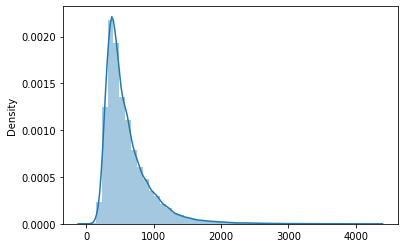

120.80570086116535
Fold 2 end
Fold 3 start
(922869, 270)
y dist plot


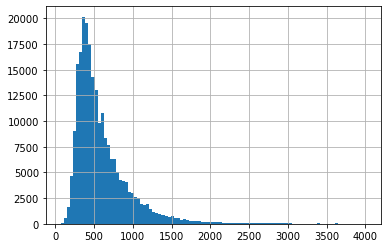

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 229


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.513470
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 300.894
[100]	valid_0's huber: 260.781
[150]	valid_0's huber: 230.989
[200]	valid_0's huber: 210.652
[250]	valid_0's huber: 197.285
[300]	valid_0's huber: 187.316
[350]	valid_0's huber: 180.007
[400]	valid_0's huber: 174.423
[450]	valid_0's huber: 170.007
[500]	valid_0's huber: 166.304
[550]	valid_0's huber: 163.181
[600]	valid_0's huber: 160.525
[650]	valid_0's huber: 158.196
[700]	valid_0's huber: 156.173
[750]	valid_0's huber: 154.397
[800]	valid_0's huber: 152.771
[850]	valid_0's huber: 151.389
[900]	valid_0's huber: 150.169
[950]	valid_0's huber: 149.046
[1000]	valid_0's huber: 147.967
[1050]	valid_0's huber: 147.028
[1100]	valid_0's huber: 146.161
[1150]	valid_0's huber: 145.358
[1200]	valid_0's huber: 144.517
[1250]	valid_0's huber: 143.74
[1300]	valid_0's huber: 142.974
[1350]	valid_0's huber: 142.256
[1400]	valid_0's huber: 141.598
[1450]	v

[12700]	valid_0's huber: 109.578
[12750]	valid_0's huber: 109.55
[12800]	valid_0's huber: 109.493
[12850]	valid_0's huber: 109.434
[12900]	valid_0's huber: 109.36
[12950]	valid_0's huber: 109.305
[13000]	valid_0's huber: 109.206
[13050]	valid_0's huber: 109.139
[13100]	valid_0's huber: 109.07
[13150]	valid_0's huber: 109.004
[13200]	valid_0's huber: 108.956
[13250]	valid_0's huber: 108.875
[13300]	valid_0's huber: 108.819
[13350]	valid_0's huber: 108.757
[13400]	valid_0's huber: 108.707
[13450]	valid_0's huber: 108.642
[13500]	valid_0's huber: 108.551
[13550]	valid_0's huber: 108.493
[13600]	valid_0's huber: 108.431
[13650]	valid_0's huber: 108.39
[13700]	valid_0's huber: 108.34
[13750]	valid_0's huber: 108.292
[13800]	valid_0's huber: 108.239
[13850]	valid_0's huber: 108.186
[13900]	valid_0's huber: 108.129
[13950]	valid_0's huber: 108.063
[14000]	valid_0's huber: 108
[14050]	valid_0's huber: 107.94
[14100]	valid_0's huber: 107.882
[14150]	valid_0's huber: 107.836
[14200]	valid_0's hu

[25200]	valid_0's huber: 97.2839
[25250]	valid_0's huber: 97.2415
[25300]	valid_0's huber: 97.1946
[25350]	valid_0's huber: 97.1409
[25400]	valid_0's huber: 97.104
[25450]	valid_0's huber: 97.0725
[25500]	valid_0's huber: 97.0465
[25550]	valid_0's huber: 97.0085
[25600]	valid_0's huber: 96.9795
[25650]	valid_0's huber: 96.9444
[25700]	valid_0's huber: 96.9149
[25750]	valid_0's huber: 96.8823
[25800]	valid_0's huber: 96.8453
[25850]	valid_0's huber: 96.8167
[25900]	valid_0's huber: 96.7666
[25950]	valid_0's huber: 96.734
[26000]	valid_0's huber: 96.7042
[26050]	valid_0's huber: 96.6692
[26100]	valid_0's huber: 96.6363
[26150]	valid_0's huber: 96.6121
[26200]	valid_0's huber: 96.5947
[26250]	valid_0's huber: 96.5842
[26300]	valid_0's huber: 96.558
[26350]	valid_0's huber: 96.5313
[26400]	valid_0's huber: 96.5025
[26450]	valid_0's huber: 96.4722
[26500]	valid_0's huber: 96.4341
[26550]	valid_0's huber: 96.3959
[26600]	valid_0's huber: 96.356
[26650]	valid_0's huber: 96.3216
[26700]	valid_

[37550]	valid_0's huber: 90.9051
[37600]	valid_0's huber: 90.8785
[37650]	valid_0's huber: 90.8593
[37700]	valid_0's huber: 90.8391
[37750]	valid_0's huber: 90.816
[37800]	valid_0's huber: 90.8004
[37850]	valid_0's huber: 90.782
[37900]	valid_0's huber: 90.763
[37950]	valid_0's huber: 90.7408
[38000]	valid_0's huber: 90.724
[38050]	valid_0's huber: 90.7103
[38100]	valid_0's huber: 90.6905
[38150]	valid_0's huber: 90.67
[38200]	valid_0's huber: 90.6486
[38250]	valid_0's huber: 90.6266
[38300]	valid_0's huber: 90.6064
[38350]	valid_0's huber: 90.5838
[38400]	valid_0's huber: 90.5626
[38450]	valid_0's huber: 90.5441
[38500]	valid_0's huber: 90.5244
[38550]	valid_0's huber: 90.5058
[38600]	valid_0's huber: 90.4848
[38650]	valid_0's huber: 90.4655
[38700]	valid_0's huber: 90.4458
[38750]	valid_0's huber: 90.4219
[38800]	valid_0's huber: 90.4011
[38850]	valid_0's huber: 90.3853
[38900]	valid_0's huber: 90.3662
[38950]	valid_0's huber: 90.3502
[39000]	valid_0's huber: 90.3302
[39050]	valid_0'

[50050]	valid_0's huber: 86.6116
[50100]	valid_0's huber: 86.5954
[50150]	valid_0's huber: 86.5781
[50200]	valid_0's huber: 86.5664
[50250]	valid_0's huber: 86.5512
[50300]	valid_0's huber: 86.5339
[50350]	valid_0's huber: 86.5202
[50400]	valid_0's huber: 86.5017
[50450]	valid_0's huber: 86.4863
[50500]	valid_0's huber: 86.4746
[50550]	valid_0's huber: 86.4601
[50600]	valid_0's huber: 86.4465
[50650]	valid_0's huber: 86.4336
[50700]	valid_0's huber: 86.4194
[50750]	valid_0's huber: 86.409
[50800]	valid_0's huber: 86.3977
[50850]	valid_0's huber: 86.3826
[50900]	valid_0's huber: 86.3693
[50950]	valid_0's huber: 86.3602
[51000]	valid_0's huber: 86.3473
[51050]	valid_0's huber: 86.3334
[51100]	valid_0's huber: 86.3251
[51150]	valid_0's huber: 86.3
[51200]	valid_0's huber: 86.283
[51250]	valid_0's huber: 86.2718
[51300]	valid_0's huber: 86.2585
[51350]	valid_0's huber: 86.2404
[51400]	valid_0's huber: 86.2265
[51450]	valid_0's huber: 86.2156
[51500]	valid_0's huber: 86.1988
[51550]	valid_0

[62550]	valid_0's huber: 83.6544
[62600]	valid_0's huber: 83.6412
[62650]	valid_0's huber: 83.6303
[62700]	valid_0's huber: 83.6159
[62750]	valid_0's huber: 83.6046
[62800]	valid_0's huber: 83.5918
[62850]	valid_0's huber: 83.5841
[62900]	valid_0's huber: 83.5677
[62950]	valid_0's huber: 83.5554
[63000]	valid_0's huber: 83.5441
[63050]	valid_0's huber: 83.5348
[63100]	valid_0's huber: 83.5259
[63150]	valid_0's huber: 83.5151
[63200]	valid_0's huber: 83.5035
[63250]	valid_0's huber: 83.4903
[63300]	valid_0's huber: 83.4797
[63350]	valid_0's huber: 83.4648
[63400]	valid_0's huber: 83.453
[63450]	valid_0's huber: 83.4439
[63500]	valid_0's huber: 83.4326
[63550]	valid_0's huber: 83.4195
[63600]	valid_0's huber: 83.4104
[63650]	valid_0's huber: 83.3979
[63700]	valid_0's huber: 83.3913
[63750]	valid_0's huber: 83.3816
[63800]	valid_0's huber: 83.3713
[63850]	valid_0's huber: 83.3597
[63900]	valid_0's huber: 83.3511
[63950]	valid_0's huber: 83.3425
[64000]	valid_0's huber: 83.3353
[64050]	val

[75000]	valid_0's huber: 81.5567
[75050]	valid_0's huber: 81.5488
[75100]	valid_0's huber: 81.5422
[75150]	valid_0's huber: 81.5355
[75200]	valid_0's huber: 81.5297
[75250]	valid_0's huber: 81.5251
[75300]	valid_0's huber: 81.519
[75350]	valid_0's huber: 81.5117
[75400]	valid_0's huber: 81.5028
[75450]	valid_0's huber: 81.4936
[75500]	valid_0's huber: 81.4845
[75550]	valid_0's huber: 81.4771
[75600]	valid_0's huber: 81.4693
[75650]	valid_0's huber: 81.4626
[75700]	valid_0's huber: 81.4554
[75750]	valid_0's huber: 81.4492
[75800]	valid_0's huber: 81.4434
[75850]	valid_0's huber: 81.4379
[75900]	valid_0's huber: 81.4299
[75950]	valid_0's huber: 81.4246
[76000]	valid_0's huber: 81.4183
[76050]	valid_0's huber: 81.4117
[76100]	valid_0's huber: 81.3977
[76150]	valid_0's huber: 81.3863
[76200]	valid_0's huber: 81.3799
[76250]	valid_0's huber: 81.3715
[76300]	valid_0's huber: 81.3669
[76350]	valid_0's huber: 81.358
[76400]	valid_0's huber: 81.353
[76450]	valid_0's huber: 81.345
[76500]	valid_

[87500]	valid_0's huber: 79.7051
[87550]	valid_0's huber: 79.7
[87600]	valid_0's huber: 79.6951
[87650]	valid_0's huber: 79.6862
[87700]	valid_0's huber: 79.6791
[87750]	valid_0's huber: 79.6738
[87800]	valid_0's huber: 79.671
[87850]	valid_0's huber: 79.6658
[87900]	valid_0's huber: 79.6582
[87950]	valid_0's huber: 79.6518
[88000]	valid_0's huber: 79.6462
[88050]	valid_0's huber: 79.6423
[88100]	valid_0's huber: 79.6365
[88150]	valid_0's huber: 79.6326
[88200]	valid_0's huber: 79.6253
[88250]	valid_0's huber: 79.618
[88300]	valid_0's huber: 79.6096
[88350]	valid_0's huber: 79.5997
[88400]	valid_0's huber: 79.5937
[88450]	valid_0's huber: 79.5886
[88500]	valid_0's huber: 79.5648
[88550]	valid_0's huber: 79.5433
[88600]	valid_0's huber: 79.538
[88650]	valid_0's huber: 79.5352
[88700]	valid_0's huber: 79.5304
[88750]	valid_0's huber: 79.5238
[88800]	valid_0's huber: 79.5163
[88850]	valid_0's huber: 79.5108
[88900]	valid_0's huber: 79.506
[88950]	valid_0's huber: 79.4969
[89000]	valid_0's

[100000]	valid_0's huber: 78.3057
[100050]	valid_0's huber: 78.2981
[100100]	valid_0's huber: 78.2952
[100150]	valid_0's huber: 78.2883
[100200]	valid_0's huber: 78.2834
[100250]	valid_0's huber: 78.2795
[100300]	valid_0's huber: 78.2741
[100350]	valid_0's huber: 78.2684
[100400]	valid_0's huber: 78.2627
[100450]	valid_0's huber: 78.2552
[100500]	valid_0's huber: 78.2491
[100550]	valid_0's huber: 78.2437
[100600]	valid_0's huber: 78.2387
[100650]	valid_0's huber: 78.2342
[100700]	valid_0's huber: 78.23
[100750]	valid_0's huber: 78.2251
[100800]	valid_0's huber: 78.2186
[100850]	valid_0's huber: 78.2136
[100900]	valid_0's huber: 78.2077
[100950]	valid_0's huber: 78.2032
[101000]	valid_0's huber: 78.1998
[101050]	valid_0's huber: 78.1953
[101100]	valid_0's huber: 78.1909
[101150]	valid_0's huber: 78.1869
[101200]	valid_0's huber: 78.1815
[101250]	valid_0's huber: 78.1768
[101300]	valid_0's huber: 78.1717
[101350]	valid_0's huber: 78.1638
[101400]	valid_0's huber: 78.1554
[101450]	valid_0

[112100]	valid_0's huber: 77.1598
[112150]	valid_0's huber: 77.1554
[112200]	valid_0's huber: 77.1508
[112250]	valid_0's huber: 77.1473
[112300]	valid_0's huber: 77.1425
[112350]	valid_0's huber: 77.1369
[112400]	valid_0's huber: 77.1335
[112450]	valid_0's huber: 77.1303
[112500]	valid_0's huber: 77.1269
[112550]	valid_0's huber: 77.1223
[112600]	valid_0's huber: 77.1194
[112650]	valid_0's huber: 77.116
[112700]	valid_0's huber: 77.1126
[112750]	valid_0's huber: 77.1102
[112800]	valid_0's huber: 77.1061
[112850]	valid_0's huber: 77.1016
[112900]	valid_0's huber: 77.0967
[112950]	valid_0's huber: 77.0922
[113000]	valid_0's huber: 77.0863
[113050]	valid_0's huber: 77.0818
[113100]	valid_0's huber: 77.0749
[113150]	valid_0's huber: 77.0713
[113200]	valid_0's huber: 77.0665
[113250]	valid_0's huber: 77.0612
[113300]	valid_0's huber: 77.0571
[113350]	valid_0's huber: 77.0533
[113400]	valid_0's huber: 77.0504
[113450]	valid_0's huber: 77.0475
[113500]	valid_0's huber: 77.0448
[113550]	valid_

[124200]	valid_0's huber: 76.1442
[124250]	valid_0's huber: 76.1407
[124300]	valid_0's huber: 76.1379
[124350]	valid_0's huber: 76.1337
[124400]	valid_0's huber: 76.1305
[124450]	valid_0's huber: 76.128
[124500]	valid_0's huber: 76.1228
[124550]	valid_0's huber: 76.1186
[124600]	valid_0's huber: 76.1143
[124650]	valid_0's huber: 76.1103
[124700]	valid_0's huber: 76.1072
[124750]	valid_0's huber: 76.103
[124800]	valid_0's huber: 76.0994
[124850]	valid_0's huber: 76.0962
[124900]	valid_0's huber: 76.0933
[124950]	valid_0's huber: 76.0885
[125000]	valid_0's huber: 76.0846
[125050]	valid_0's huber: 76.0805
[125100]	valid_0's huber: 76.0756
[125150]	valid_0's huber: 76.0709
[125200]	valid_0's huber: 76.0672
[125250]	valid_0's huber: 76.0641
[125300]	valid_0's huber: 76.0597
[125350]	valid_0's huber: 76.0562
[125400]	valid_0's huber: 76.0511
[125450]	valid_0's huber: 76.0487
[125500]	valid_0's huber: 76.0445
[125550]	valid_0's huber: 76.0413
[125600]	valid_0's huber: 76.0383
[125650]	valid_0

[136300]	valid_0's huber: 75.2743
[136350]	valid_0's huber: 75.2707
[136400]	valid_0's huber: 75.2677
[136450]	valid_0's huber: 75.2657
[136500]	valid_0's huber: 75.2624
[136550]	valid_0's huber: 75.26
[136600]	valid_0's huber: 75.2563
[136650]	valid_0's huber: 75.2527
[136700]	valid_0's huber: 75.2459
[136750]	valid_0's huber: 75.2425
[136800]	valid_0's huber: 75.237
[136850]	valid_0's huber: 75.2334
[136900]	valid_0's huber: 75.2272
[136950]	valid_0's huber: 75.2234
[137000]	valid_0's huber: 75.2202
[137050]	valid_0's huber: 75.2178
[137100]	valid_0's huber: 75.2136
[137150]	valid_0's huber: 75.211
[137200]	valid_0's huber: 75.2081
[137250]	valid_0's huber: 75.2051
[137300]	valid_0's huber: 75.2033
[137350]	valid_0's huber: 75.2013
[137400]	valid_0's huber: 75.1988
[137450]	valid_0's huber: 75.1958
[137500]	valid_0's huber: 75.1924
[137550]	valid_0's huber: 75.1889
[137600]	valid_0's huber: 75.1848
[137650]	valid_0's huber: 75.1823
[137700]	valid_0's huber: 75.1803
[137750]	valid_0's

[148400]	valid_0's huber: 74.4997
[148450]	valid_0's huber: 74.4981
[148500]	valid_0's huber: 74.4958
[148550]	valid_0's huber: 74.4929
[148600]	valid_0's huber: 74.4876
[148650]	valid_0's huber: 74.4856
[148700]	valid_0's huber: 74.4824
[148750]	valid_0's huber: 74.4788
[148800]	valid_0's huber: 74.475
[148850]	valid_0's huber: 74.4722
[148900]	valid_0's huber: 74.4695
[148950]	valid_0's huber: 74.4677
[149000]	valid_0's huber: 74.4647
[149050]	valid_0's huber: 74.461
[149100]	valid_0's huber: 74.4567
[149150]	valid_0's huber: 74.4533
[149200]	valid_0's huber: 74.4505
[149250]	valid_0's huber: 74.4477
[149300]	valid_0's huber: 74.4452
[149350]	valid_0's huber: 74.4421
[149400]	valid_0's huber: 74.4386
[149450]	valid_0's huber: 74.4363
[149500]	valid_0's huber: 74.4338
[149550]	valid_0's huber: 74.4315
[149600]	valid_0's huber: 74.429
[149650]	valid_0's huber: 74.4273
[149700]	valid_0's huber: 74.425
[149750]	valid_0's huber: 74.4223
[149800]	valid_0's huber: 74.4206
[149850]	valid_0's

[160500]	valid_0's huber: 73.7752
[160550]	valid_0's huber: 73.7721
[160600]	valid_0's huber: 73.7699
[160650]	valid_0's huber: 73.7663
[160700]	valid_0's huber: 73.7638
[160750]	valid_0's huber: 73.7596
[160800]	valid_0's huber: 73.7568
[160850]	valid_0's huber: 73.7547
[160900]	valid_0's huber: 73.7518
[160950]	valid_0's huber: 73.7497
[161000]	valid_0's huber: 73.7473
[161050]	valid_0's huber: 73.7441
[161100]	valid_0's huber: 73.7412
[161150]	valid_0's huber: 73.7386
[161200]	valid_0's huber: 73.7363
[161250]	valid_0's huber: 73.7348
[161300]	valid_0's huber: 73.7324
[161350]	valid_0's huber: 73.7301
[161400]	valid_0's huber: 73.7277
[161450]	valid_0's huber: 73.7257
[161500]	valid_0's huber: 73.7215
[161550]	valid_0's huber: 73.7177
[161600]	valid_0's huber: 73.7157
[161650]	valid_0's huber: 73.712
[161700]	valid_0's huber: 73.7093
[161750]	valid_0's huber: 73.7081
[161800]	valid_0's huber: 73.705
[161850]	valid_0's huber: 73.7026
[161900]	valid_0's huber: 73.6997
[161950]	valid_0

[172600]	valid_0's huber: 73.1674
[172650]	valid_0's huber: 73.1651
[172700]	valid_0's huber: 73.1617
[172750]	valid_0's huber: 73.1594
[172800]	valid_0's huber: 73.1566
[172850]	valid_0's huber: 73.1545
[172900]	valid_0's huber: 73.151
[172950]	valid_0's huber: 73.149
[173000]	valid_0's huber: 73.1468
[173050]	valid_0's huber: 73.1446
[173100]	valid_0's huber: 73.1414
[173150]	valid_0's huber: 73.1391
[173200]	valid_0's huber: 73.1355
[173250]	valid_0's huber: 73.134
[173300]	valid_0's huber: 73.1312
[173350]	valid_0's huber: 73.1292
[173400]	valid_0's huber: 73.1267
[173450]	valid_0's huber: 73.1248
[173500]	valid_0's huber: 73.1224
[173550]	valid_0's huber: 73.121
[173600]	valid_0's huber: 73.1192
[173650]	valid_0's huber: 73.1167
[173700]	valid_0's huber: 73.1136
[173750]	valid_0's huber: 73.1104
[173800]	valid_0's huber: 73.1077
[173850]	valid_0's huber: 73.1049
[173900]	valid_0's huber: 73.1023
[173950]	valid_0's huber: 73.0998
[174000]	valid_0's huber: 73.0986
[174050]	valid_0's

[184700]	valid_0's huber: 72.5851
[184750]	valid_0's huber: 72.5822
[184800]	valid_0's huber: 72.58
[184850]	valid_0's huber: 72.578
[184900]	valid_0's huber: 72.5746
[184950]	valid_0's huber: 72.5729
[185000]	valid_0's huber: 72.5709
[185050]	valid_0's huber: 72.5684
[185100]	valid_0's huber: 72.5664
[185150]	valid_0's huber: 72.5645
[185200]	valid_0's huber: 72.5621
[185250]	valid_0's huber: 72.5597
[185300]	valid_0's huber: 72.5578
[185350]	valid_0's huber: 72.5548
[185400]	valid_0's huber: 72.553
[185450]	valid_0's huber: 72.5506
[185500]	valid_0's huber: 72.5485
[185550]	valid_0's huber: 72.5454
[185600]	valid_0's huber: 72.5426
[185650]	valid_0's huber: 72.541
[185700]	valid_0's huber: 72.5382
[185750]	valid_0's huber: 72.5371
[185800]	valid_0's huber: 72.5344
[185850]	valid_0's huber: 72.5323
[185900]	valid_0's huber: 72.5298
[185950]	valid_0's huber: 72.5279
[186000]	valid_0's huber: 72.5257
[186050]	valid_0's huber: 72.5245
[186100]	valid_0's huber: 72.5235
[186150]	valid_0's 

[196800]	valid_0's huber: 72.0712
[196850]	valid_0's huber: 72.0695
[196900]	valid_0's huber: 72.067
[196950]	valid_0's huber: 72.0649
[197000]	valid_0's huber: 72.0626
[197050]	valid_0's huber: 72.0611
[197100]	valid_0's huber: 72.0596
[197150]	valid_0's huber: 72.0583
[197200]	valid_0's huber: 72.0567
[197250]	valid_0's huber: 72.0551
[197300]	valid_0's huber: 72.0524
[197350]	valid_0's huber: 72.0506
[197400]	valid_0's huber: 72.0477
[197450]	valid_0's huber: 72.0461
[197500]	valid_0's huber: 72.0442
[197550]	valid_0's huber: 72.0423
[197600]	valid_0's huber: 72.0407
[197650]	valid_0's huber: 72.0382
[197700]	valid_0's huber: 72.0361
[197750]	valid_0's huber: 72.0344
[197800]	valid_0's huber: 72.0313
[197850]	valid_0's huber: 72.0296
[197900]	valid_0's huber: 72.0279
[197950]	valid_0's huber: 72.027
[198000]	valid_0's huber: 72.0252
[198050]	valid_0's huber: 72.023
[198100]	valid_0's huber: 72.0207
[198150]	valid_0's huber: 72.0188
[198200]	valid_0's huber: 72.0168
[198250]	valid_0'

[208900]	valid_0's huber: 71.6084
[208950]	valid_0's huber: 71.6068
[209000]	valid_0's huber: 71.6052
[209050]	valid_0's huber: 71.6039
[209100]	valid_0's huber: 71.6012
[209150]	valid_0's huber: 71.5987
[209200]	valid_0's huber: 71.5973
[209250]	valid_0's huber: 71.5949
[209300]	valid_0's huber: 71.5931
[209350]	valid_0's huber: 71.5923
[209400]	valid_0's huber: 71.5906
[209450]	valid_0's huber: 71.5884
[209500]	valid_0's huber: 71.5868
[209550]	valid_0's huber: 71.5851
[209600]	valid_0's huber: 71.5838
[209650]	valid_0's huber: 71.582
[209700]	valid_0's huber: 71.5796
[209750]	valid_0's huber: 71.5782
[209800]	valid_0's huber: 71.5758
[209850]	valid_0's huber: 71.5736
[209900]	valid_0's huber: 71.5712
[209950]	valid_0's huber: 71.5696
[210000]	valid_0's huber: 71.5684
[210050]	valid_0's huber: 71.567
[210100]	valid_0's huber: 71.5653
[210150]	valid_0's huber: 71.5643
[210200]	valid_0's huber: 71.5632
[210250]	valid_0's huber: 71.5606
[210300]	valid_0's huber: 71.5598
[210350]	valid_0

[221000]	valid_0's huber: 71.1818
[221050]	valid_0's huber: 71.1801
[221100]	valid_0's huber: 71.1786
[221150]	valid_0's huber: 71.1769
[221200]	valid_0's huber: 71.1749
[221250]	valid_0's huber: 71.1726
[221300]	valid_0's huber: 71.1704
[221350]	valid_0's huber: 71.1688
[221400]	valid_0's huber: 71.1674
[221450]	valid_0's huber: 71.1658
[221500]	valid_0's huber: 71.1639
[221550]	valid_0's huber: 71.1622
[221600]	valid_0's huber: 71.1603
[221650]	valid_0's huber: 71.1586
[221700]	valid_0's huber: 71.1574
[221750]	valid_0's huber: 71.1556
[221800]	valid_0's huber: 71.1534
[221850]	valid_0's huber: 71.1524
[221900]	valid_0's huber: 71.1505
[221950]	valid_0's huber: 71.1486
[222000]	valid_0's huber: 71.147
[222050]	valid_0's huber: 71.1445
[222100]	valid_0's huber: 71.1421
[222150]	valid_0's huber: 71.1401
[222200]	valid_0's huber: 71.1389
[222250]	valid_0's huber: 71.1376
[222300]	valid_0's huber: 71.1364
[222350]	valid_0's huber: 71.1351
[222400]	valid_0's huber: 71.1334
[222450]	valid_

[233100]	valid_0's huber: 70.7825
[233150]	valid_0's huber: 70.7804
[233200]	valid_0's huber: 70.7783
[233250]	valid_0's huber: 70.776
[233300]	valid_0's huber: 70.7744
[233350]	valid_0's huber: 70.773
[233400]	valid_0's huber: 70.7709
[233450]	valid_0's huber: 70.7695
[233500]	valid_0's huber: 70.7681
[233550]	valid_0's huber: 70.7674
[233600]	valid_0's huber: 70.7663
[233650]	valid_0's huber: 70.7647
[233700]	valid_0's huber: 70.7629
[233750]	valid_0's huber: 70.7617
[233800]	valid_0's huber: 70.7606
[233850]	valid_0's huber: 70.7592
[233900]	valid_0's huber: 70.7574
[233950]	valid_0's huber: 70.7562
[234000]	valid_0's huber: 70.7549
[234050]	valid_0's huber: 70.7527
[234100]	valid_0's huber: 70.7512
[234150]	valid_0's huber: 70.7494
[234200]	valid_0's huber: 70.7478
[234250]	valid_0's huber: 70.7463
[234300]	valid_0's huber: 70.7453
[234350]	valid_0's huber: 70.744
[234400]	valid_0's huber: 70.7422
[234450]	valid_0's huber: 70.7398
[234500]	valid_0's huber: 70.7379
[234550]	valid_0'

[245200]	valid_0's huber: 70.4238
[245250]	valid_0's huber: 70.4222
[245300]	valid_0's huber: 70.4202
[245350]	valid_0's huber: 70.4191
[245400]	valid_0's huber: 70.4182
[245450]	valid_0's huber: 70.4169
[245500]	valid_0's huber: 70.4157
[245550]	valid_0's huber: 70.4143
[245600]	valid_0's huber: 70.413
[245650]	valid_0's huber: 70.4111
[245700]	valid_0's huber: 70.4094
[245750]	valid_0's huber: 70.4078
[245800]	valid_0's huber: 70.4061
[245850]	valid_0's huber: 70.4046
[245900]	valid_0's huber: 70.4031
[245950]	valid_0's huber: 70.4018
[246000]	valid_0's huber: 70.4003
[246050]	valid_0's huber: 70.399
[246100]	valid_0's huber: 70.3979
[246150]	valid_0's huber: 70.397
[246200]	valid_0's huber: 70.3954
[246250]	valid_0's huber: 70.3938
[246300]	valid_0's huber: 70.392
[246350]	valid_0's huber: 70.3908
[246400]	valid_0's huber: 70.3893
[246450]	valid_0's huber: 70.3877
[246500]	valid_0's huber: 70.3864
[246550]	valid_0's huber: 70.3845
[246600]	valid_0's huber: 70.3834
[246650]	valid_0's

[257300]	valid_0's huber: 70.0762
[257350]	valid_0's huber: 70.0746
[257400]	valid_0's huber: 70.072
[257450]	valid_0's huber: 70.071
[257500]	valid_0's huber: 70.069
[257550]	valid_0's huber: 70.0671
[257600]	valid_0's huber: 70.0654
[257650]	valid_0's huber: 70.0639
[257700]	valid_0's huber: 70.0627
[257750]	valid_0's huber: 70.061
[257800]	valid_0's huber: 70.0593
[257850]	valid_0's huber: 70.0578
[257900]	valid_0's huber: 70.0564
[257950]	valid_0's huber: 70.0551
[258000]	valid_0's huber: 70.0534
[258050]	valid_0's huber: 70.0508
[258100]	valid_0's huber: 70.0498
[258150]	valid_0's huber: 70.0483
[258200]	valid_0's huber: 70.0472
[258250]	valid_0's huber: 70.0462
[258300]	valid_0's huber: 70.0449
[258350]	valid_0's huber: 70.0437
[258400]	valid_0's huber: 70.0419
[258450]	valid_0's huber: 70.0413
[258500]	valid_0's huber: 70.0391
[258550]	valid_0's huber: 70.0377
[258600]	valid_0's huber: 70.036
[258650]	valid_0's huber: 70.0349
[258700]	valid_0's huber: 70.0336
[258750]	valid_0's 

[269400]	valid_0's huber: 69.7421
[269450]	valid_0's huber: 69.7405
[269500]	valid_0's huber: 69.7396
[269550]	valid_0's huber: 69.7389
[269600]	valid_0's huber: 69.7376
[269650]	valid_0's huber: 69.7369
[269700]	valid_0's huber: 69.7353
[269750]	valid_0's huber: 69.7341
[269800]	valid_0's huber: 69.7323
[269850]	valid_0's huber: 69.7308
[269900]	valid_0's huber: 69.7294
[269950]	valid_0's huber: 69.729
[270000]	valid_0's huber: 69.7276
[270050]	valid_0's huber: 69.7265
[270100]	valid_0's huber: 69.7255
[270150]	valid_0's huber: 69.7245
[270200]	valid_0's huber: 69.7234
[270250]	valid_0's huber: 69.7217
[270300]	valid_0's huber: 69.719
[270350]	valid_0's huber: 69.7178
[270400]	valid_0's huber: 69.7165
[270450]	valid_0's huber: 69.7143
[270500]	valid_0's huber: 69.7131
[270550]	valid_0's huber: 69.7117
[270600]	valid_0's huber: 69.7106
[270650]	valid_0's huber: 69.709
[270700]	valid_0's huber: 69.7081
[270750]	valid_0's huber: 69.7076
[270800]	valid_0's huber: 69.7069
[270850]	valid_0'

[281500]	valid_0's huber: 69.4582
[281550]	valid_0's huber: 69.4572
[281600]	valid_0's huber: 69.4564
[281650]	valid_0's huber: 69.4546
[281700]	valid_0's huber: 69.4535
[281750]	valid_0's huber: 69.4524
[281800]	valid_0's huber: 69.4508
[281850]	valid_0's huber: 69.4495
[281900]	valid_0's huber: 69.4483
[281950]	valid_0's huber: 69.4474
[282000]	valid_0's huber: 69.4461
[282050]	valid_0's huber: 69.4448
[282100]	valid_0's huber: 69.4437
[282150]	valid_0's huber: 69.4428
[282200]	valid_0's huber: 69.4421
[282250]	valid_0's huber: 69.4407
[282300]	valid_0's huber: 69.4393
[282350]	valid_0's huber: 69.4385
[282400]	valid_0's huber: 69.4372
[282450]	valid_0's huber: 69.436
[282500]	valid_0's huber: 69.4353
[282550]	valid_0's huber: 69.4338
[282600]	valid_0's huber: 69.4328
[282650]	valid_0's huber: 69.4312
[282700]	valid_0's huber: 69.4303
[282750]	valid_0's huber: 69.4297
[282800]	valid_0's huber: 69.4286
[282850]	valid_0's huber: 69.4271
[282900]	valid_0's huber: 69.4258
[282950]	valid_

[293600]	valid_0's huber: 69.1832
[293650]	valid_0's huber: 69.182
[293700]	valid_0's huber: 69.1805
[293750]	valid_0's huber: 69.1791
[293800]	valid_0's huber: 69.1773
[293850]	valid_0's huber: 69.1754
[293900]	valid_0's huber: 69.1749
[293950]	valid_0's huber: 69.1738
[294000]	valid_0's huber: 69.1725
[294050]	valid_0's huber: 69.1717
[294100]	valid_0's huber: 69.1709
[294150]	valid_0's huber: 69.1695
[294200]	valid_0's huber: 69.1689
[294250]	valid_0's huber: 69.1683
[294300]	valid_0's huber: 69.1672
[294350]	valid_0's huber: 69.1659
[294400]	valid_0's huber: 69.1651
[294450]	valid_0's huber: 69.1635
[294500]	valid_0's huber: 69.1623
[294550]	valid_0's huber: 69.1614
[294600]	valid_0's huber: 69.1608
[294650]	valid_0's huber: 69.1602
[294700]	valid_0's huber: 69.1591
[294750]	valid_0's huber: 69.1586
[294800]	valid_0's huber: 69.1569
[294850]	valid_0's huber: 69.1563
[294900]	valid_0's huber: 69.1548
[294950]	valid_0's huber: 69.1536
[295000]	valid_0's huber: 69.1525
[295050]	valid_

[305700]	valid_0's huber: 68.9173
[305750]	valid_0's huber: 68.9164
[305800]	valid_0's huber: 68.9145
[305850]	valid_0's huber: 68.9137
[305900]	valid_0's huber: 68.9126
[305950]	valid_0's huber: 68.9117
[306000]	valid_0's huber: 68.9106
[306050]	valid_0's huber: 68.9099
[306100]	valid_0's huber: 68.9085
[306150]	valid_0's huber: 68.9076
[306200]	valid_0's huber: 68.9062
[306250]	valid_0's huber: 68.9053
[306300]	valid_0's huber: 68.9048
[306350]	valid_0's huber: 68.9037
[306400]	valid_0's huber: 68.9033
[306450]	valid_0's huber: 68.9028
[306500]	valid_0's huber: 68.9017
[306550]	valid_0's huber: 68.9009
[306600]	valid_0's huber: 68.8999
[306650]	valid_0's huber: 68.8987
[306700]	valid_0's huber: 68.8977
[306750]	valid_0's huber: 68.8971
[306800]	valid_0's huber: 68.8961
[306850]	valid_0's huber: 68.8949
[306900]	valid_0's huber: 68.8935
[306950]	valid_0's huber: 68.8921
[307000]	valid_0's huber: 68.8911
[307050]	valid_0's huber: 68.8902
[307100]	valid_0's huber: 68.889
[307150]	valid_

[317800]	valid_0's huber: 68.669
[317850]	valid_0's huber: 68.6684
[317900]	valid_0's huber: 68.6677
[317950]	valid_0's huber: 68.6666
[318000]	valid_0's huber: 68.666
[318050]	valid_0's huber: 68.6653
[318100]	valid_0's huber: 68.6644
[318150]	valid_0's huber: 68.6633
[318200]	valid_0's huber: 68.6629
[318250]	valid_0's huber: 68.6619
[318300]	valid_0's huber: 68.6612
[318350]	valid_0's huber: 68.6601
[318400]	valid_0's huber: 68.6589
[318450]	valid_0's huber: 68.6576
[318500]	valid_0's huber: 68.6564
[318550]	valid_0's huber: 68.6554
[318600]	valid_0's huber: 68.6546
[318650]	valid_0's huber: 68.6531
[318700]	valid_0's huber: 68.6515
[318750]	valid_0's huber: 68.6509
[318800]	valid_0's huber: 68.6501
[318850]	valid_0's huber: 68.6497
[318900]	valid_0's huber: 68.649
[318950]	valid_0's huber: 68.6483
[319000]	valid_0's huber: 68.6472
[319050]	valid_0's huber: 68.6459
[319100]	valid_0's huber: 68.6451
[319150]	valid_0's huber: 68.6445
[319200]	valid_0's huber: 68.6439
[319250]	valid_0'

[329900]	valid_0's huber: 68.4483
[329950]	valid_0's huber: 68.4476
[330000]	valid_0's huber: 68.4469
[330050]	valid_0's huber: 68.4461
[330100]	valid_0's huber: 68.445
[330150]	valid_0's huber: 68.4445
[330200]	valid_0's huber: 68.4438
[330250]	valid_0's huber: 68.4429
[330300]	valid_0's huber: 68.4421
[330350]	valid_0's huber: 68.4408
[330400]	valid_0's huber: 68.4396
[330450]	valid_0's huber: 68.4387
[330500]	valid_0's huber: 68.4377
[330550]	valid_0's huber: 68.4369
[330600]	valid_0's huber: 68.436
[330650]	valid_0's huber: 68.435
[330700]	valid_0's huber: 68.434
[330750]	valid_0's huber: 68.4333
[330800]	valid_0's huber: 68.4321
[330850]	valid_0's huber: 68.4307
[330900]	valid_0's huber: 68.4293
[330950]	valid_0's huber: 68.4284
[331000]	valid_0's huber: 68.4274
[331050]	valid_0's huber: 68.4259
[331100]	valid_0's huber: 68.4249
[331150]	valid_0's huber: 68.4245
[331200]	valid_0's huber: 68.4237
[331250]	valid_0's huber: 68.423
[331300]	valid_0's huber: 68.4223
[331350]	valid_0's 

[342000]	valid_0's huber: 68.2367
[342050]	valid_0's huber: 68.2359
[342100]	valid_0's huber: 68.2349
[342150]	valid_0's huber: 68.2341
[342200]	valid_0's huber: 68.2332
[342250]	valid_0's huber: 68.2319
[342300]	valid_0's huber: 68.2312
[342350]	valid_0's huber: 68.2305
[342400]	valid_0's huber: 68.2298
[342450]	valid_0's huber: 68.2288
[342500]	valid_0's huber: 68.2283
[342550]	valid_0's huber: 68.228
[342600]	valid_0's huber: 68.2269
[342650]	valid_0's huber: 68.2251
[342700]	valid_0's huber: 68.224
[342750]	valid_0's huber: 68.2236
[342800]	valid_0's huber: 68.2227
[342850]	valid_0's huber: 68.2219
[342900]	valid_0's huber: 68.2214
[342950]	valid_0's huber: 68.2207
[343000]	valid_0's huber: 68.2198
[343050]	valid_0's huber: 68.2193
[343100]	valid_0's huber: 68.2185
[343150]	valid_0's huber: 68.2178
[343200]	valid_0's huber: 68.217
[343250]	valid_0's huber: 68.2162
[343300]	valid_0's huber: 68.2152
[343350]	valid_0's huber: 68.2148
[343400]	valid_0's huber: 68.214
[343450]	valid_0's

[354100]	valid_0's huber: 68.0352
[354150]	valid_0's huber: 68.034
[354200]	valid_0's huber: 68.0329
[354250]	valid_0's huber: 68.0321
[354300]	valid_0's huber: 68.0313
[354350]	valid_0's huber: 68.0303
[354400]	valid_0's huber: 68.0298
[354450]	valid_0's huber: 68.0287
[354500]	valid_0's huber: 68.0276
[354550]	valid_0's huber: 68.0269
[354600]	valid_0's huber: 68.0263
[354650]	valid_0's huber: 68.0254
[354700]	valid_0's huber: 68.025
[354750]	valid_0's huber: 68.024
[354800]	valid_0's huber: 68.0232
[354850]	valid_0's huber: 68.0232
[354900]	valid_0's huber: 68.0229
[354950]	valid_0's huber: 68.0219
[355000]	valid_0's huber: 68.0215
[355050]	valid_0's huber: 68.0206
[355100]	valid_0's huber: 68.0196
[355150]	valid_0's huber: 68.0185
[355200]	valid_0's huber: 68.017
[355250]	valid_0's huber: 68.0157
[355300]	valid_0's huber: 68.0149
[355350]	valid_0's huber: 68.0144
[355400]	valid_0's huber: 68.0139
[355450]	valid_0's huber: 68.013
[355500]	valid_0's huber: 68.0121
[355550]	valid_0's 

[366200]	valid_0's huber: 67.8438
[366250]	valid_0's huber: 67.8432
[366300]	valid_0's huber: 67.8426
[366350]	valid_0's huber: 67.8416
[366400]	valid_0's huber: 67.8407
[366450]	valid_0's huber: 67.8398
[366500]	valid_0's huber: 67.8391
[366550]	valid_0's huber: 67.8384
[366600]	valid_0's huber: 67.8375
[366650]	valid_0's huber: 67.8365
[366700]	valid_0's huber: 67.8354
[366750]	valid_0's huber: 67.8343
[366800]	valid_0's huber: 67.833
[366850]	valid_0's huber: 67.8327
[366900]	valid_0's huber: 67.8315
[366950]	valid_0's huber: 67.8309
[367000]	valid_0's huber: 67.8301
[367050]	valid_0's huber: 67.8295
[367100]	valid_0's huber: 67.8292
[367150]	valid_0's huber: 67.8283
[367200]	valid_0's huber: 67.8271
[367250]	valid_0's huber: 67.8267
[367300]	valid_0's huber: 67.8259
[367350]	valid_0's huber: 67.8255
[367400]	valid_0's huber: 67.8243
[367450]	valid_0's huber: 67.8235
[367500]	valid_0's huber: 67.823
[367550]	valid_0's huber: 67.8224
[367600]	valid_0's huber: 67.8217
[367650]	valid_0

[378300]	valid_0's huber: 67.6621
[378350]	valid_0's huber: 67.6614
[378400]	valid_0's huber: 67.6603
[378450]	valid_0's huber: 67.6599
[378500]	valid_0's huber: 67.6592
[378550]	valid_0's huber: 67.6581
[378600]	valid_0's huber: 67.6563
[378650]	valid_0's huber: 67.6559
[378700]	valid_0's huber: 67.655
[378750]	valid_0's huber: 67.6543
[378800]	valid_0's huber: 67.6536
[378850]	valid_0's huber: 67.6529
[378900]	valid_0's huber: 67.6523
[378950]	valid_0's huber: 67.6517
[379000]	valid_0's huber: 67.651
[379050]	valid_0's huber: 67.6507
[379100]	valid_0's huber: 67.6503
[379150]	valid_0's huber: 67.6496
[379200]	valid_0's huber: 67.6484
[379250]	valid_0's huber: 67.6478
[379300]	valid_0's huber: 67.6468
[379350]	valid_0's huber: 67.6458
[379400]	valid_0's huber: 67.6452
[379450]	valid_0's huber: 67.6443
[379500]	valid_0's huber: 67.6438
[379550]	valid_0's huber: 67.6435
[379600]	valid_0's huber: 67.6429
[379650]	valid_0's huber: 67.6424
[379700]	valid_0's huber: 67.6424
[379750]	valid_0

[390400]	valid_0's huber: 67.4966
[390450]	valid_0's huber: 67.4957
[390500]	valid_0's huber: 67.495
[390550]	valid_0's huber: 67.4947
[390600]	valid_0's huber: 67.4937
[390650]	valid_0's huber: 67.4931
[390700]	valid_0's huber: 67.4924
[390750]	valid_0's huber: 67.4919
[390800]	valid_0's huber: 67.491
[390850]	valid_0's huber: 67.4905
[390900]	valid_0's huber: 67.49
[390950]	valid_0's huber: 67.4894
[391000]	valid_0's huber: 67.4889
[391050]	valid_0's huber: 67.4875
[391100]	valid_0's huber: 67.4866
[391150]	valid_0's huber: 67.4862
[391200]	valid_0's huber: 67.4856
[391250]	valid_0's huber: 67.4855
[391300]	valid_0's huber: 67.4848
[391350]	valid_0's huber: 67.484
[391400]	valid_0's huber: 67.4831
[391450]	valid_0's huber: 67.4824
[391500]	valid_0's huber: 67.4818
[391550]	valid_0's huber: 67.481
[391600]	valid_0's huber: 67.4805
[391650]	valid_0's huber: 67.4798
[391700]	valid_0's huber: 67.4789
[391750]	valid_0's huber: 67.478
[391800]	valid_0's huber: 67.4774
[391850]	valid_0's hu

[402500]	valid_0's huber: 67.3306
[402550]	valid_0's huber: 67.3299
[402600]	valid_0's huber: 67.3292
[402650]	valid_0's huber: 67.3288
[402700]	valid_0's huber: 67.3283
[402750]	valid_0's huber: 67.3274
[402800]	valid_0's huber: 67.3261
[402850]	valid_0's huber: 67.3256
[402900]	valid_0's huber: 67.325
[402950]	valid_0's huber: 67.3237
[403000]	valid_0's huber: 67.3228
[403050]	valid_0's huber: 67.3222
[403100]	valid_0's huber: 67.3216
[403150]	valid_0's huber: 67.3213
[403200]	valid_0's huber: 67.3202
[403250]	valid_0's huber: 67.3191
[403300]	valid_0's huber: 67.3186
[403350]	valid_0's huber: 67.3178
[403400]	valid_0's huber: 67.3171
[403450]	valid_0's huber: 67.3164
[403500]	valid_0's huber: 67.3157
[403550]	valid_0's huber: 67.3147
[403600]	valid_0's huber: 67.3145
[403650]	valid_0's huber: 67.3141
[403700]	valid_0's huber: 67.3134
[403750]	valid_0's huber: 67.3126
[403800]	valid_0's huber: 67.3122
[403850]	valid_0's huber: 67.312
[403900]	valid_0's huber: 67.3112
[403950]	valid_0

[414600]	valid_0's huber: 67.1811
[414650]	valid_0's huber: 67.1804
[414700]	valid_0's huber: 67.18
[414750]	valid_0's huber: 67.1787
[414800]	valid_0's huber: 67.1782
[414850]	valid_0's huber: 67.1775
[414900]	valid_0's huber: 67.1775
[414950]	valid_0's huber: 67.1768
[415000]	valid_0's huber: 67.1763
[415050]	valid_0's huber: 67.1757
[415100]	valid_0's huber: 67.175
[415150]	valid_0's huber: 67.1748
[415200]	valid_0's huber: 67.1742
[415250]	valid_0's huber: 67.1738
[415300]	valid_0's huber: 67.1736
[415350]	valid_0's huber: 67.1734
[415400]	valid_0's huber: 67.1729
[415450]	valid_0's huber: 67.1721
[415500]	valid_0's huber: 67.1717
[415550]	valid_0's huber: 67.1713
[415600]	valid_0's huber: 67.1705
[415650]	valid_0's huber: 67.1698
[415700]	valid_0's huber: 67.1691
[415750]	valid_0's huber: 67.169
[415800]	valid_0's huber: 67.1685
[415850]	valid_0's huber: 67.1681
[415900]	valid_0's huber: 67.1676
[415950]	valid_0's huber: 67.1671
[416000]	valid_0's huber: 67.1665
[416050]	valid_0's

[426700]	valid_0's huber: 67.0468
[426750]	valid_0's huber: 67.0463
[426800]	valid_0's huber: 67.0456
[426850]	valid_0's huber: 67.045
[426900]	valid_0's huber: 67.044
[426950]	valid_0's huber: 67.0436
[427000]	valid_0's huber: 67.0432
[427050]	valid_0's huber: 67.0423
[427100]	valid_0's huber: 67.0414
[427150]	valid_0's huber: 67.0408
[427200]	valid_0's huber: 67.0408
[427250]	valid_0's huber: 67.0401
[427300]	valid_0's huber: 67.0398
[427350]	valid_0's huber: 67.039
[427400]	valid_0's huber: 67.0387
[427450]	valid_0's huber: 67.0378
[427500]	valid_0's huber: 67.0375
[427550]	valid_0's huber: 67.0365
[427600]	valid_0's huber: 67.0358
[427650]	valid_0's huber: 67.0352
[427700]	valid_0's huber: 67.0347
[427750]	valid_0's huber: 67.034
[427800]	valid_0's huber: 67.0332
[427850]	valid_0's huber: 67.0328
[427900]	valid_0's huber: 67.0324
[427950]	valid_0's huber: 67.0321
[428000]	valid_0's huber: 67.0316
[428050]	valid_0's huber: 67.03
[428100]	valid_0's huber: 67.0292
[428150]	valid_0's h

[438800]	valid_0's huber: 66.9128
[438850]	valid_0's huber: 66.912
[438900]	valid_0's huber: 66.9114
[438950]	valid_0's huber: 66.9106
[439000]	valid_0's huber: 66.9096
[439050]	valid_0's huber: 66.9093
[439100]	valid_0's huber: 66.909
[439150]	valid_0's huber: 66.9084
[439200]	valid_0's huber: 66.9079
[439250]	valid_0's huber: 66.9073
[439300]	valid_0's huber: 66.9067
[439350]	valid_0's huber: 66.9058
[439400]	valid_0's huber: 66.9054
[439450]	valid_0's huber: 66.9046
[439500]	valid_0's huber: 66.904
[439550]	valid_0's huber: 66.9035
[439600]	valid_0's huber: 66.9033
[439650]	valid_0's huber: 66.9029
[439700]	valid_0's huber: 66.9025
[439750]	valid_0's huber: 66.9018
[439800]	valid_0's huber: 66.9014
[439850]	valid_0's huber: 66.9009
[439900]	valid_0's huber: 66.9007
[439950]	valid_0's huber: 66.9004
[440000]	valid_0's huber: 66.8999
[440050]	valid_0's huber: 66.8996
[440100]	valid_0's huber: 66.8992
[440150]	valid_0's huber: 66.8988
[440200]	valid_0's huber: 66.898
[440250]	valid_0's

[450900]	valid_0's huber: 66.7953
[450950]	valid_0's huber: 66.7947
[451000]	valid_0's huber: 66.7944
[451050]	valid_0's huber: 66.7942
[451100]	valid_0's huber: 66.7938
[451150]	valid_0's huber: 66.7933
[451200]	valid_0's huber: 66.793
[451250]	valid_0's huber: 66.7925
[451300]	valid_0's huber: 66.7917
[451350]	valid_0's huber: 66.7912
[451400]	valid_0's huber: 66.7909
[451450]	valid_0's huber: 66.7906
[451500]	valid_0's huber: 66.7902
[451550]	valid_0's huber: 66.7899
[451600]	valid_0's huber: 66.7891
[451650]	valid_0's huber: 66.7886
[451700]	valid_0's huber: 66.7884
[451750]	valid_0's huber: 66.7877
[451800]	valid_0's huber: 66.7873
[451850]	valid_0's huber: 66.7868
[451900]	valid_0's huber: 66.7863
[451950]	valid_0's huber: 66.7861
[452000]	valid_0's huber: 66.7852
[452050]	valid_0's huber: 66.7849
[452100]	valid_0's huber: 66.7842
[452150]	valid_0's huber: 66.7837
[452200]	valid_0's huber: 66.7837
[452250]	valid_0's huber: 66.7833
[452300]	valid_0's huber: 66.7828
[452350]	valid_

[463000]	valid_0's huber: 66.6818
[463050]	valid_0's huber: 66.6813
[463100]	valid_0's huber: 66.6809
[463150]	valid_0's huber: 66.6803
[463200]	valid_0's huber: 66.68
[463250]	valid_0's huber: 66.6795
[463300]	valid_0's huber: 66.6789
[463350]	valid_0's huber: 66.6785
[463400]	valid_0's huber: 66.678
[463450]	valid_0's huber: 66.6775
[463500]	valid_0's huber: 66.6771
[463550]	valid_0's huber: 66.6764
[463600]	valid_0's huber: 66.6757
[463650]	valid_0's huber: 66.675
[463700]	valid_0's huber: 66.6745
[463750]	valid_0's huber: 66.6744
[463800]	valid_0's huber: 66.6739
[463850]	valid_0's huber: 66.6736
[463900]	valid_0's huber: 66.6732
[463950]	valid_0's huber: 66.6725
[464000]	valid_0's huber: 66.6717
[464050]	valid_0's huber: 66.6715
[464100]	valid_0's huber: 66.6708
[464150]	valid_0's huber: 66.6708
[464200]	valid_0's huber: 66.6707
[464250]	valid_0's huber: 66.67
[464300]	valid_0's huber: 66.6696
[464350]	valid_0's huber: 66.669
[464400]	valid_0's huber: 66.6685
[464450]	valid_0's hu

[475100]	valid_0's huber: 66.5779
[475150]	valid_0's huber: 66.5774
[475200]	valid_0's huber: 66.5767
[475250]	valid_0's huber: 66.5762
[475300]	valid_0's huber: 66.5764
[475350]	valid_0's huber: 66.5762
[475400]	valid_0's huber: 66.576
[475450]	valid_0's huber: 66.5755
[475500]	valid_0's huber: 66.575
[475550]	valid_0's huber: 66.5744
[475600]	valid_0's huber: 66.5742
[475650]	valid_0's huber: 66.574
[475700]	valid_0's huber: 66.5732
[475750]	valid_0's huber: 66.5729
[475800]	valid_0's huber: 66.5726
[475850]	valid_0's huber: 66.5724
[475900]	valid_0's huber: 66.5717
[475950]	valid_0's huber: 66.5713
[476000]	valid_0's huber: 66.5709
[476050]	valid_0's huber: 66.5705
[476100]	valid_0's huber: 66.57
[476150]	valid_0's huber: 66.5696
[476200]	valid_0's huber: 66.5691
[476250]	valid_0's huber: 66.5688
[476300]	valid_0's huber: 66.5685
[476350]	valid_0's huber: 66.5686
[476400]	valid_0's huber: 66.5682
[476450]	valid_0's huber: 66.5679
[476500]	valid_0's huber: 66.5672
[476550]	valid_0's 

[487200]	valid_0's huber: 66.4795
[487250]	valid_0's huber: 66.4793
[487300]	valid_0's huber: 66.479
[487350]	valid_0's huber: 66.4784
[487400]	valid_0's huber: 66.4776
[487450]	valid_0's huber: 66.4771
[487500]	valid_0's huber: 66.4767
[487550]	valid_0's huber: 66.4763
[487600]	valid_0's huber: 66.4758
[487650]	valid_0's huber: 66.4754
[487700]	valid_0's huber: 66.4747
[487750]	valid_0's huber: 66.4748
[487800]	valid_0's huber: 66.4742
[487850]	valid_0's huber: 66.4734
[487900]	valid_0's huber: 66.4732
[487950]	valid_0's huber: 66.4728
[488000]	valid_0's huber: 66.4724
[488050]	valid_0's huber: 66.4721
[488100]	valid_0's huber: 66.4713
[488150]	valid_0's huber: 66.4711
[488200]	valid_0's huber: 66.471
[488250]	valid_0's huber: 66.4709
[488300]	valid_0's huber: 66.4703
[488350]	valid_0's huber: 66.4702
[488400]	valid_0's huber: 66.4695
[488450]	valid_0's huber: 66.4693
[488500]	valid_0's huber: 66.4688
[488550]	valid_0's huber: 66.4684
[488600]	valid_0's huber: 66.4679
[488650]	valid_0

[499300]	valid_0's huber: 66.3831
[499350]	valid_0's huber: 66.3828
[499400]	valid_0's huber: 66.3824
[499450]	valid_0's huber: 66.382
[499500]	valid_0's huber: 66.3813
[499550]	valid_0's huber: 66.3809
[499600]	valid_0's huber: 66.3806
[499650]	valid_0's huber: 66.38
[499700]	valid_0's huber: 66.38
[499750]	valid_0's huber: 66.3797
[499800]	valid_0's huber: 66.3792
[499850]	valid_0's huber: 66.3785
[499900]	valid_0's huber: 66.3781
[499950]	valid_0's huber: 66.3778
[500000]	valid_0's huber: 66.3775
[500050]	valid_0's huber: 66.3768
[500100]	valid_0's huber: 66.3766
[500150]	valid_0's huber: 66.376
[500200]	valid_0's huber: 66.3757
[500250]	valid_0's huber: 66.3754
[500300]	valid_0's huber: 66.3747
[500350]	valid_0's huber: 66.3742
[500400]	valid_0's huber: 66.3738
[500450]	valid_0's huber: 66.3734
[500500]	valid_0's huber: 66.3732
[500550]	valid_0's huber: 66.3727
[500600]	valid_0's huber: 66.3722
[500650]	valid_0's huber: 66.372
[500700]	valid_0's huber: 66.3719
[500750]	valid_0's hu

[511400]	valid_0's huber: 66.2943
[511450]	valid_0's huber: 66.2942
[511500]	valid_0's huber: 66.2935
[511550]	valid_0's huber: 66.2931
[511600]	valid_0's huber: 66.2925
[511650]	valid_0's huber: 66.2923
[511700]	valid_0's huber: 66.292
[511750]	valid_0's huber: 66.292
[511800]	valid_0's huber: 66.2916
[511850]	valid_0's huber: 66.2913
[511900]	valid_0's huber: 66.2912
[511950]	valid_0's huber: 66.2907
[512000]	valid_0's huber: 66.2904
[512050]	valid_0's huber: 66.2902
[512100]	valid_0's huber: 66.2898
[512150]	valid_0's huber: 66.2893
[512200]	valid_0's huber: 66.2888
[512250]	valid_0's huber: 66.2885
[512300]	valid_0's huber: 66.2884
[512350]	valid_0's huber: 66.2881
[512400]	valid_0's huber: 66.2873
[512450]	valid_0's huber: 66.2873
[512500]	valid_0's huber: 66.2868
[512550]	valid_0's huber: 66.2866
[512600]	valid_0's huber: 66.2862
[512650]	valid_0's huber: 66.2863
[512700]	valid_0's huber: 66.2862
Early stopping, best iteration is:
[512623]	valid_0's huber: 66.286
preds dist plot


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


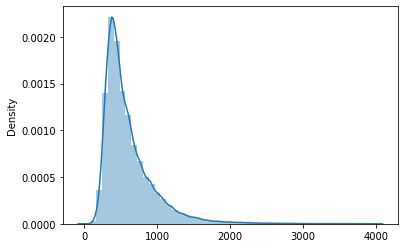

119.06030844109912
Fold 3 end
Fold 4 start
(922869, 270)
y dist plot


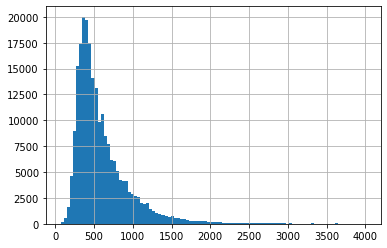

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.179244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 922869, number of used features: 223


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 605.196274
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 302.786
[100]	valid_0's huber: 262.691
[150]	valid_0's huber: 232.832
[200]	valid_0's huber: 212.583
[250]	valid_0's huber: 199.28
[300]	valid_0's huber: 189.25
[350]	valid_0's huber: 181.89
[400]	valid_0's huber: 176.275
[450]	valid_0's huber: 171.768
[500]	valid_0's huber: 167.999
[550]	valid_0's huber: 164.911
[600]	valid_0's huber: 162.167
[650]	valid_0's huber: 159.851
[700]	valid_0's huber: 157.841
[750]	valid_0's huber: 156.049
[800]	valid_0's huber: 154.39
[850]	valid_0's huber: 152.913
[900]	valid_0's huber: 151.646
[950]	valid_0's huber: 150.498
[1000]	valid_0's huber: 149.461
[1050]	valid_0's huber: 148.461
[1100]	valid_0's huber: 147.556
[1150]	valid_0's huber: 146.683
[1200]	valid_0's huber: 145.746
[1250]	valid_0's huber: 144.952
[1300]	valid_0's huber: 144.274
[1350]	valid_0's huber: 143.578
[1400]	valid_0's huber: 142.886
[1450]	vali

[12700]	valid_0's huber: 109.937
[12750]	valid_0's huber: 109.87
[12800]	valid_0's huber: 109.793
[12850]	valid_0's huber: 109.713
[12900]	valid_0's huber: 109.626
[12950]	valid_0's huber: 109.537
[13000]	valid_0's huber: 109.471
[13050]	valid_0's huber: 109.395
[13100]	valid_0's huber: 109.301
[13150]	valid_0's huber: 109.232
[13200]	valid_0's huber: 109.172
[13250]	valid_0's huber: 109.096
[13300]	valid_0's huber: 109.008
[13350]	valid_0's huber: 108.914
[13400]	valid_0's huber: 108.849
[13450]	valid_0's huber: 108.775
[13500]	valid_0's huber: 108.725
[13550]	valid_0's huber: 108.671
[13600]	valid_0's huber: 108.605
[13650]	valid_0's huber: 108.54
[13700]	valid_0's huber: 108.464
[13750]	valid_0's huber: 108.389
[13800]	valid_0's huber: 108.313
[13850]	valid_0's huber: 108.248
[13900]	valid_0's huber: 108.192
[13950]	valid_0's huber: 108.121
[14000]	valid_0's huber: 108.018
[14050]	valid_0's huber: 107.949
[14100]	valid_0's huber: 107.869
[14150]	valid_0's huber: 107.779
[14200]	vali

[25200]	valid_0's huber: 97.9056
[25250]	valid_0's huber: 97.8903
[25300]	valid_0's huber: 97.8763
[25350]	valid_0's huber: 97.8632
[25400]	valid_0's huber: 97.8498
[25450]	valid_0's huber: 97.8315
[25500]	valid_0's huber: 97.7892
[25550]	valid_0's huber: 97.7473
[25600]	valid_0's huber: 97.7046
[25650]	valid_0's huber: 97.6687
[25700]	valid_0's huber: 97.6381
[25750]	valid_0's huber: 97.6079
[25800]	valid_0's huber: 97.5782
[25850]	valid_0's huber: 97.5517
[25900]	valid_0's huber: 97.5178
[25950]	valid_0's huber: 97.4518
[26000]	valid_0's huber: 97.409
[26050]	valid_0's huber: 97.3678
[26100]	valid_0's huber: 97.3461
[26150]	valid_0's huber: 97.3064
[26200]	valid_0's huber: 97.2613
[26250]	valid_0's huber: 97.2256
[26300]	valid_0's huber: 97.197
[26350]	valid_0's huber: 97.1681
[26400]	valid_0's huber: 97.143
[26450]	valid_0's huber: 97.1149
[26500]	valid_0's huber: 97.0877
[26550]	valid_0's huber: 97.063
[26600]	valid_0's huber: 97.0385
[26650]	valid_0's huber: 97.0157
[26700]	valid_

[37700]	valid_0's huber: 91.1561
[37750]	valid_0's huber: 91.1384
[37800]	valid_0's huber: 91.0873
[37850]	valid_0's huber: 91.0718
[37900]	valid_0's huber: 91.0551
[37950]	valid_0's huber: 91.0342
[38000]	valid_0's huber: 91.0168
[38050]	valid_0's huber: 91.001
[38100]	valid_0's huber: 90.9794
[38150]	valid_0's huber: 90.9574
[38200]	valid_0's huber: 90.9325
[38250]	valid_0's huber: 90.9169
[38300]	valid_0's huber: 90.8985
[38350]	valid_0's huber: 90.8765
[38400]	valid_0's huber: 90.8595
[38450]	valid_0's huber: 90.837
[38500]	valid_0's huber: 90.8145
[38550]	valid_0's huber: 90.7918
[38600]	valid_0's huber: 90.7689
[38650]	valid_0's huber: 90.7377
[38700]	valid_0's huber: 90.7091
[38750]	valid_0's huber: 90.6841
[38800]	valid_0's huber: 90.661
[38850]	valid_0's huber: 90.6426
[38900]	valid_0's huber: 90.6207
[38950]	valid_0's huber: 90.6017
[39000]	valid_0's huber: 90.5912
[39050]	valid_0's huber: 90.5774
[39100]	valid_0's huber: 90.5414
[39150]	valid_0's huber: 90.5225
[39200]	valid

[50150]	valid_0's huber: 86.3891
[50200]	valid_0's huber: 86.3766
[50250]	valid_0's huber: 86.3603
[50300]	valid_0's huber: 86.3501
[50350]	valid_0's huber: 86.3347
[50400]	valid_0's huber: 86.3171
[50450]	valid_0's huber: 86.306
[50500]	valid_0's huber: 86.2945
[50550]	valid_0's huber: 86.2786
[50600]	valid_0's huber: 86.2657
[50650]	valid_0's huber: 86.255
[50700]	valid_0's huber: 86.246
[50750]	valid_0's huber: 86.2304
[50800]	valid_0's huber: 86.217
[50850]	valid_0's huber: 86.2065
[50900]	valid_0's huber: 86.1944
[50950]	valid_0's huber: 86.1821
[51000]	valid_0's huber: 86.1702
[51050]	valid_0's huber: 86.1544
[51100]	valid_0's huber: 86.1401
[51150]	valid_0's huber: 86.1298
[51200]	valid_0's huber: 86.1164
[51250]	valid_0's huber: 86.102
[51300]	valid_0's huber: 86.0869
[51350]	valid_0's huber: 86.0761
[51400]	valid_0's huber: 86.061
[51450]	valid_0's huber: 86.0512
[51500]	valid_0's huber: 86.0405
[51550]	valid_0's huber: 86.0233
[51600]	valid_0's huber: 86.0108
[51650]	valid_0'

[62650]	valid_0's huber: 83.5716
[62700]	valid_0's huber: 83.561
[62750]	valid_0's huber: 83.546
[62800]	valid_0's huber: 83.5311
[62850]	valid_0's huber: 83.5206
[62900]	valid_0's huber: 83.5104
[62950]	valid_0's huber: 83.4974
[63000]	valid_0's huber: 83.4869
[63050]	valid_0's huber: 83.4738
[63100]	valid_0's huber: 83.4627
[63150]	valid_0's huber: 83.4537
[63200]	valid_0's huber: 83.4451
[63250]	valid_0's huber: 83.4347
[63300]	valid_0's huber: 83.4261
[63350]	valid_0's huber: 83.415
[63400]	valid_0's huber: 83.4053
[63450]	valid_0's huber: 83.3947
[63500]	valid_0's huber: 83.3837
[63550]	valid_0's huber: 83.3754
[63600]	valid_0's huber: 83.3639
[63650]	valid_0's huber: 83.3512
[63700]	valid_0's huber: 83.3419
[63750]	valid_0's huber: 83.3324
[63800]	valid_0's huber: 83.321
[63850]	valid_0's huber: 83.3129
[63900]	valid_0's huber: 83.3028
[63950]	valid_0's huber: 83.2925
[64000]	valid_0's huber: 83.2817
[64050]	valid_0's huber: 83.2732
[64100]	valid_0's huber: 83.2675
[64150]	valid_

[75150]	valid_0's huber: 81.4903
[75200]	valid_0's huber: 81.4813
[75250]	valid_0's huber: 81.4708
[75300]	valid_0's huber: 81.4633
[75350]	valid_0's huber: 81.4541
[75400]	valid_0's huber: 81.4488
[75450]	valid_0's huber: 81.4448
[75500]	valid_0's huber: 81.439
[75550]	valid_0's huber: 81.4332
[75600]	valid_0's huber: 81.4266
[75650]	valid_0's huber: 81.4209
[75700]	valid_0's huber: 81.4151
[75750]	valid_0's huber: 81.4068
[75800]	valid_0's huber: 81.4008
[75850]	valid_0's huber: 81.3905
[75900]	valid_0's huber: 81.3802
[75950]	valid_0's huber: 81.3722
[76000]	valid_0's huber: 81.3639
[76050]	valid_0's huber: 81.3549
[76100]	valid_0's huber: 81.3465
[76150]	valid_0's huber: 81.3401
[76200]	valid_0's huber: 81.3332
[76250]	valid_0's huber: 81.3263
[76300]	valid_0's huber: 81.3201
[76350]	valid_0's huber: 81.3129
[76400]	valid_0's huber: 81.3062
[76450]	valid_0's huber: 81.2995
[76500]	valid_0's huber: 81.294
[76550]	valid_0's huber: 81.2885
[76600]	valid_0's huber: 81.2834
[76650]	vali

[87650]	valid_0's huber: 79.7154
[87700]	valid_0's huber: 79.7115
[87750]	valid_0's huber: 79.7048
[87800]	valid_0's huber: 79.6987
[87850]	valid_0's huber: 79.6918
[87900]	valid_0's huber: 79.6865
[87950]	valid_0's huber: 79.6818
[88000]	valid_0's huber: 79.6764
[88050]	valid_0's huber: 79.6699
[88100]	valid_0's huber: 79.6609
[88150]	valid_0's huber: 79.6515
[88200]	valid_0's huber: 79.6442
[88250]	valid_0's huber: 79.6395
[88300]	valid_0's huber: 79.635
[88350]	valid_0's huber: 79.6284
[88400]	valid_0's huber: 79.6238
[88450]	valid_0's huber: 79.617
[88500]	valid_0's huber: 79.6034
[88550]	valid_0's huber: 79.5985
[88600]	valid_0's huber: 79.5922
[88650]	valid_0's huber: 79.5834
[88700]	valid_0's huber: 79.5743
[88750]	valid_0's huber: 79.5673
[88800]	valid_0's huber: 79.5617
[88850]	valid_0's huber: 79.5549
[88900]	valid_0's huber: 79.551
[88950]	valid_0's huber: 79.5462
[89000]	valid_0's huber: 79.5385
[89050]	valid_0's huber: 79.532
[89100]	valid_0's huber: 79.5254
[89150]	valid_

[100150]	valid_0's huber: 78.305
[100200]	valid_0's huber: 78.3019
[100250]	valid_0's huber: 78.298
[100300]	valid_0's huber: 78.294
[100350]	valid_0's huber: 78.2898
[100400]	valid_0's huber: 78.2838
[100450]	valid_0's huber: 78.2777
[100500]	valid_0's huber: 78.2732
[100550]	valid_0's huber: 78.2688
[100600]	valid_0's huber: 78.2652
[100650]	valid_0's huber: 78.2629
[100700]	valid_0's huber: 78.2584
[100750]	valid_0's huber: 78.2545
[100800]	valid_0's huber: 78.2512
[100850]	valid_0's huber: 78.248
[100900]	valid_0's huber: 78.2443
[100950]	valid_0's huber: 78.2415
[101000]	valid_0's huber: 78.2366
[101050]	valid_0's huber: 78.2309
[101100]	valid_0's huber: 78.2237
[101150]	valid_0's huber: 78.2192
[101200]	valid_0's huber: 78.2156
[101250]	valid_0's huber: 78.2123
[101300]	valid_0's huber: 78.2073
[101350]	valid_0's huber: 78.2014
[101400]	valid_0's huber: 78.1965
[101450]	valid_0's huber: 78.1903
[101500]	valid_0's huber: 78.1696
[101550]	valid_0's huber: 78.1631
[101600]	valid_0's

[112250]	valid_0's huber: 77.1575
[112300]	valid_0's huber: 77.1545
[112350]	valid_0's huber: 77.1503
[112400]	valid_0's huber: 77.1444
[112450]	valid_0's huber: 77.1408
[112500]	valid_0's huber: 77.1344
[112550]	valid_0's huber: 77.1306
[112600]	valid_0's huber: 77.1258
[112650]	valid_0's huber: 77.1214
[112700]	valid_0's huber: 77.1167
[112750]	valid_0's huber: 77.1124
[112800]	valid_0's huber: 77.1085
[112850]	valid_0's huber: 77.1051
[112900]	valid_0's huber: 77.1004
[112950]	valid_0's huber: 77.0968
[113000]	valid_0's huber: 77.093
[113050]	valid_0's huber: 77.089
[113100]	valid_0's huber: 77.0852
[113150]	valid_0's huber: 77.0801
[113200]	valid_0's huber: 77.0769
[113250]	valid_0's huber: 77.0723
[113300]	valid_0's huber: 77.0682
[113350]	valid_0's huber: 77.0607
[113400]	valid_0's huber: 77.0551
[113450]	valid_0's huber: 77.052
[113500]	valid_0's huber: 77.0489
[113550]	valid_0's huber: 77.0459
[113600]	valid_0's huber: 77.0427
[113650]	valid_0's huber: 77.0382
[113700]	valid_0'

[124350]	valid_0's huber: 76.199
[124400]	valid_0's huber: 76.1961
[124450]	valid_0's huber: 76.1921
[124500]	valid_0's huber: 76.189
[124550]	valid_0's huber: 76.1853
[124600]	valid_0's huber: 76.1815
[124650]	valid_0's huber: 76.1788
[124700]	valid_0's huber: 76.1768
[124750]	valid_0's huber: 76.1724
[124800]	valid_0's huber: 76.1696
[124850]	valid_0's huber: 76.1674
[124900]	valid_0's huber: 76.1633
[124950]	valid_0's huber: 76.1554
[125000]	valid_0's huber: 76.1507
[125050]	valid_0's huber: 76.1473
[125100]	valid_0's huber: 76.1408
[125150]	valid_0's huber: 76.1364
[125200]	valid_0's huber: 76.134
[125250]	valid_0's huber: 76.1307
[125300]	valid_0's huber: 76.1268
[125350]	valid_0's huber: 76.1209
[125400]	valid_0's huber: 76.1179
[125450]	valid_0's huber: 76.1156
[125500]	valid_0's huber: 76.1132
[125550]	valid_0's huber: 76.1088
[125600]	valid_0's huber: 76.1055
[125650]	valid_0's huber: 76.1022
[125700]	valid_0's huber: 76.0999
[125750]	valid_0's huber: 76.0965
[125800]	valid_0'

[136450]	valid_0's huber: 75.3514
[136500]	valid_0's huber: 75.3485
[136550]	valid_0's huber: 75.3448
[136600]	valid_0's huber: 75.3414
[136650]	valid_0's huber: 75.3383
[136700]	valid_0's huber: 75.3359
[136750]	valid_0's huber: 75.334
[136800]	valid_0's huber: 75.3285
[136850]	valid_0's huber: 75.3256
[136900]	valid_0's huber: 75.3225
[136950]	valid_0's huber: 75.3198
[137000]	valid_0's huber: 75.317
[137050]	valid_0's huber: 75.3142
[137100]	valid_0's huber: 75.3105
[137150]	valid_0's huber: 75.3078
[137200]	valid_0's huber: 75.3049
[137250]	valid_0's huber: 75.3028
[137300]	valid_0's huber: 75.2984
[137350]	valid_0's huber: 75.2951
[137400]	valid_0's huber: 75.2914
[137450]	valid_0's huber: 75.2886
[137500]	valid_0's huber: 75.2852
[137550]	valid_0's huber: 75.2809
[137600]	valid_0's huber: 75.2791
[137650]	valid_0's huber: 75.2773
[137700]	valid_0's huber: 75.2755
[137750]	valid_0's huber: 75.271
[137800]	valid_0's huber: 75.2664
[137850]	valid_0's huber: 75.2639
[137900]	valid_0'

[148550]	valid_0's huber: 74.622
[148600]	valid_0's huber: 74.6198
[148650]	valid_0's huber: 74.6171
[148700]	valid_0's huber: 74.6136
[148750]	valid_0's huber: 74.6094
[148800]	valid_0's huber: 74.6067
[148850]	valid_0's huber: 74.6033
[148900]	valid_0's huber: 74.6004
[148950]	valid_0's huber: 74.596
[149000]	valid_0's huber: 74.5934
[149050]	valid_0's huber: 74.5914
[149100]	valid_0's huber: 74.5879
[149150]	valid_0's huber: 74.5865
[149200]	valid_0's huber: 74.5818
[149250]	valid_0's huber: 74.5788
[149300]	valid_0's huber: 74.5749
[149350]	valid_0's huber: 74.5704
[149400]	valid_0's huber: 74.5672
[149450]	valid_0's huber: 74.5636
[149500]	valid_0's huber: 74.5605
[149550]	valid_0's huber: 74.5575
[149600]	valid_0's huber: 74.5537
[149650]	valid_0's huber: 74.5503
[149700]	valid_0's huber: 74.5459
[149750]	valid_0's huber: 74.5413
[149800]	valid_0's huber: 74.5386
[149850]	valid_0's huber: 74.5351
[149900]	valid_0's huber: 74.5318
[149950]	valid_0's huber: 74.5273
[150000]	valid_0

[160650]	valid_0's huber: 73.9115
[160700]	valid_0's huber: 73.9086
[160750]	valid_0's huber: 73.9066
[160800]	valid_0's huber: 73.9047
[160850]	valid_0's huber: 73.9021
[160900]	valid_0's huber: 73.8994
[160950]	valid_0's huber: 73.8971
[161000]	valid_0's huber: 73.8932
[161050]	valid_0's huber: 73.89
[161100]	valid_0's huber: 73.8873
[161150]	valid_0's huber: 73.886
[161200]	valid_0's huber: 73.8839
[161250]	valid_0's huber: 73.8821
[161300]	valid_0's huber: 73.879
[161350]	valid_0's huber: 73.8761
[161400]	valid_0's huber: 73.8738
[161450]	valid_0's huber: 73.8715
[161500]	valid_0's huber: 73.8697
[161550]	valid_0's huber: 73.8669
[161600]	valid_0's huber: 73.865
[161650]	valid_0's huber: 73.863
[161700]	valid_0's huber: 73.8612
[161750]	valid_0's huber: 73.8594
[161800]	valid_0's huber: 73.8564
[161850]	valid_0's huber: 73.8546
[161900]	valid_0's huber: 73.852
[161950]	valid_0's huber: 73.8478
[162000]	valid_0's huber: 73.8444
[162050]	valid_0's huber: 73.8412
[162100]	valid_0's hu

[172750]	valid_0's huber: 73.2773
[172800]	valid_0's huber: 73.276
[172850]	valid_0's huber: 73.2744
[172900]	valid_0's huber: 73.2718
[172950]	valid_0's huber: 73.2695
[173000]	valid_0's huber: 73.2671
[173050]	valid_0's huber: 73.2647
[173100]	valid_0's huber: 73.2623
[173150]	valid_0's huber: 73.26
[173200]	valid_0's huber: 73.258
[173250]	valid_0's huber: 73.2546
[173300]	valid_0's huber: 73.2509
[173350]	valid_0's huber: 73.2484
[173400]	valid_0's huber: 73.2458
[173450]	valid_0's huber: 73.2435
[173500]	valid_0's huber: 73.2412
[173550]	valid_0's huber: 73.2397
[173600]	valid_0's huber: 73.2367
[173650]	valid_0's huber: 73.2343
[173700]	valid_0's huber: 73.232
[173750]	valid_0's huber: 73.2304
[173800]	valid_0's huber: 73.2281
[173850]	valid_0's huber: 73.2265
[173900]	valid_0's huber: 73.2246
[173950]	valid_0's huber: 73.2218
[174000]	valid_0's huber: 73.2197
[174050]	valid_0's huber: 73.217
[174100]	valid_0's huber: 73.2148
[174150]	valid_0's huber: 73.2132
[174200]	valid_0's h

[184850]	valid_0's huber: 72.7277
[184900]	valid_0's huber: 72.7254
[184950]	valid_0's huber: 72.7228
[185000]	valid_0's huber: 72.7209
[185050]	valid_0's huber: 72.7194
[185100]	valid_0's huber: 72.7166
[185150]	valid_0's huber: 72.7138
[185200]	valid_0's huber: 72.7116
[185250]	valid_0's huber: 72.7095
[185300]	valid_0's huber: 72.7051
[185350]	valid_0's huber: 72.7021
[185400]	valid_0's huber: 72.7005
[185450]	valid_0's huber: 72.6981
[185500]	valid_0's huber: 72.6957
[185550]	valid_0's huber: 72.6941
[185600]	valid_0's huber: 72.6922
[185650]	valid_0's huber: 72.6902
[185700]	valid_0's huber: 72.6886
[185750]	valid_0's huber: 72.6867
[185800]	valid_0's huber: 72.6847
[185850]	valid_0's huber: 72.6834
[185900]	valid_0's huber: 72.6817
[185950]	valid_0's huber: 72.6795
[186000]	valid_0's huber: 72.6776
[186050]	valid_0's huber: 72.6751
[186100]	valid_0's huber: 72.6728
[186150]	valid_0's huber: 72.671
[186200]	valid_0's huber: 72.6682
[186250]	valid_0's huber: 72.6665
[186300]	valid_

[196950]	valid_0's huber: 72.2213
[197000]	valid_0's huber: 72.2196
[197050]	valid_0's huber: 72.2178
[197100]	valid_0's huber: 72.2161
[197150]	valid_0's huber: 72.2141
[197200]	valid_0's huber: 72.2117
[197250]	valid_0's huber: 72.2102
[197300]	valid_0's huber: 72.2081
[197350]	valid_0's huber: 72.207
[197400]	valid_0's huber: 72.2036
[197450]	valid_0's huber: 72.2017
[197500]	valid_0's huber: 72.1992
[197550]	valid_0's huber: 72.1969
[197600]	valid_0's huber: 72.1947
[197650]	valid_0's huber: 72.1929
[197700]	valid_0's huber: 72.1895
[197750]	valid_0's huber: 72.1872
[197800]	valid_0's huber: 72.1847
[197850]	valid_0's huber: 72.1828
[197900]	valid_0's huber: 72.1815
[197950]	valid_0's huber: 72.179
[198000]	valid_0's huber: 72.1769
[198050]	valid_0's huber: 72.1754
[198100]	valid_0's huber: 72.1735
[198150]	valid_0's huber: 72.1703
[198200]	valid_0's huber: 72.1684
[198250]	valid_0's huber: 72.1661
[198300]	valid_0's huber: 72.1641
[198350]	valid_0's huber: 72.1624
[198400]	valid_0

[209050]	valid_0's huber: 71.7635
[209100]	valid_0's huber: 71.7622
[209150]	valid_0's huber: 71.7609
[209200]	valid_0's huber: 71.7589
[209250]	valid_0's huber: 71.7559
[209300]	valid_0's huber: 71.754
[209350]	valid_0's huber: 71.7514
[209400]	valid_0's huber: 71.7505
[209450]	valid_0's huber: 71.7486
[209500]	valid_0's huber: 71.7476
[209550]	valid_0's huber: 71.7458
[209600]	valid_0's huber: 71.7446
[209650]	valid_0's huber: 71.7426
[209700]	valid_0's huber: 71.741
[209750]	valid_0's huber: 71.7391
[209800]	valid_0's huber: 71.7382
[209850]	valid_0's huber: 71.7368
[209900]	valid_0's huber: 71.7357
[209950]	valid_0's huber: 71.734
[210000]	valid_0's huber: 71.7326
[210050]	valid_0's huber: 71.7311
[210100]	valid_0's huber: 71.7295
[210150]	valid_0's huber: 71.7282
[210200]	valid_0's huber: 71.7268
[210250]	valid_0's huber: 71.7245
[210300]	valid_0's huber: 71.7222
[210350]	valid_0's huber: 71.7218
[210400]	valid_0's huber: 71.7198
[210450]	valid_0's huber: 71.717
[210500]	valid_0's

[221150]	valid_0's huber: 71.342
[221200]	valid_0's huber: 71.3404
[221250]	valid_0's huber: 71.3384
[221300]	valid_0's huber: 71.3356
[221350]	valid_0's huber: 71.3346
[221400]	valid_0's huber: 71.3334
[221450]	valid_0's huber: 71.3323
[221500]	valid_0's huber: 71.3308
[221550]	valid_0's huber: 71.328
[221600]	valid_0's huber: 71.3268
[221650]	valid_0's huber: 71.3255
[221700]	valid_0's huber: 71.3241
[221750]	valid_0's huber: 71.3232
[221800]	valid_0's huber: 71.3214
[221850]	valid_0's huber: 71.3202
[221900]	valid_0's huber: 71.3184
[221950]	valid_0's huber: 71.3158
[222000]	valid_0's huber: 71.3132
[222050]	valid_0's huber: 71.3109
[222100]	valid_0's huber: 71.3042
[222150]	valid_0's huber: 71.3019
[222200]	valid_0's huber: 71.2999
[222250]	valid_0's huber: 71.2986
[222300]	valid_0's huber: 71.2971
[222350]	valid_0's huber: 71.2966
[222400]	valid_0's huber: 71.2946
[222450]	valid_0's huber: 71.2934
[222500]	valid_0's huber: 71.2898
[222550]	valid_0's huber: 71.2881
[222600]	valid_0

[233250]	valid_0's huber: 70.9345
[233300]	valid_0's huber: 70.9331
[233350]	valid_0's huber: 70.9319
[233400]	valid_0's huber: 70.9305
[233450]	valid_0's huber: 70.9292
[233500]	valid_0's huber: 70.9278
[233550]	valid_0's huber: 70.9267
[233600]	valid_0's huber: 70.9246
[233650]	valid_0's huber: 70.9232
[233700]	valid_0's huber: 70.9217
[233750]	valid_0's huber: 70.9202
[233800]	valid_0's huber: 70.9195
[233850]	valid_0's huber: 70.9183
[233900]	valid_0's huber: 70.9165
[233950]	valid_0's huber: 70.9152
[234000]	valid_0's huber: 70.9129
[234050]	valid_0's huber: 70.9112
[234100]	valid_0's huber: 70.9094
[234150]	valid_0's huber: 70.9085
[234200]	valid_0's huber: 70.9072
[234250]	valid_0's huber: 70.9056
[234300]	valid_0's huber: 70.9044
[234350]	valid_0's huber: 70.9034
[234400]	valid_0's huber: 70.9017
[234450]	valid_0's huber: 70.9001
[234500]	valid_0's huber: 70.8987
[234550]	valid_0's huber: 70.8966
[234600]	valid_0's huber: 70.8954
[234650]	valid_0's huber: 70.8942
[234700]	valid

[245350]	valid_0's huber: 70.5735
[245400]	valid_0's huber: 70.5722
[245450]	valid_0's huber: 70.5714
[245500]	valid_0's huber: 70.5706
[245550]	valid_0's huber: 70.5697
[245600]	valid_0's huber: 70.5689
[245650]	valid_0's huber: 70.5673
[245700]	valid_0's huber: 70.566
[245750]	valid_0's huber: 70.5651
[245800]	valid_0's huber: 70.5635
[245850]	valid_0's huber: 70.5624
[245900]	valid_0's huber: 70.5616
[245950]	valid_0's huber: 70.56
[246000]	valid_0's huber: 70.559
[246050]	valid_0's huber: 70.5577
[246100]	valid_0's huber: 70.5557
[246150]	valid_0's huber: 70.5538
[246200]	valid_0's huber: 70.5525
[246250]	valid_0's huber: 70.5514
[246300]	valid_0's huber: 70.5504
[246350]	valid_0's huber: 70.5491
[246400]	valid_0's huber: 70.5479
[246450]	valid_0's huber: 70.5466
[246500]	valid_0's huber: 70.545
[246550]	valid_0's huber: 70.5441
[246600]	valid_0's huber: 70.543
[246650]	valid_0's huber: 70.5419
[246700]	valid_0's huber: 70.5407
[246750]	valid_0's huber: 70.5395
[246800]	valid_0's h

[257450]	valid_0's huber: 70.2424
[257500]	valid_0's huber: 70.2408
[257550]	valid_0's huber: 70.2395
[257600]	valid_0's huber: 70.2381
[257650]	valid_0's huber: 70.2372
[257700]	valid_0's huber: 70.236
[257750]	valid_0's huber: 70.2345
[257800]	valid_0's huber: 70.2334
[257850]	valid_0's huber: 70.2326
[257900]	valid_0's huber: 70.2311
[257950]	valid_0's huber: 70.2301
[258000]	valid_0's huber: 70.2286
[258050]	valid_0's huber: 70.2267
[258100]	valid_0's huber: 70.2258
[258150]	valid_0's huber: 70.2245
[258200]	valid_0's huber: 70.2237
[258250]	valid_0's huber: 70.2225
[258300]	valid_0's huber: 70.2215
[258350]	valid_0's huber: 70.2185
[258400]	valid_0's huber: 70.2168
[258450]	valid_0's huber: 70.2153
[258500]	valid_0's huber: 70.2143
[258550]	valid_0's huber: 70.213
[258600]	valid_0's huber: 70.2112
[258650]	valid_0's huber: 70.2099
[258700]	valid_0's huber: 70.2087
[258750]	valid_0's huber: 70.2078
[258800]	valid_0's huber: 70.2067
[258850]	valid_0's huber: 70.2049
[258900]	valid_0

[269550]	valid_0's huber: 69.9247
[269600]	valid_0's huber: 69.9237
[269650]	valid_0's huber: 69.9227
[269700]	valid_0's huber: 69.9208
[269750]	valid_0's huber: 69.9189
[269800]	valid_0's huber: 69.9174
[269850]	valid_0's huber: 69.916
[269900]	valid_0's huber: 69.9146
[269950]	valid_0's huber: 69.9131
[270000]	valid_0's huber: 69.9117
[270050]	valid_0's huber: 69.911
[270100]	valid_0's huber: 69.9102
[270150]	valid_0's huber: 69.909
[270200]	valid_0's huber: 69.9081
[270250]	valid_0's huber: 69.9071
[270300]	valid_0's huber: 69.9062
[270350]	valid_0's huber: 69.9049
[270400]	valid_0's huber: 69.9041
[270450]	valid_0's huber: 69.9026
[270500]	valid_0's huber: 69.9022
[270550]	valid_0's huber: 69.9012
[270600]	valid_0's huber: 69.9007
[270650]	valid_0's huber: 69.8992
[270700]	valid_0's huber: 69.8972
[270750]	valid_0's huber: 69.8959
[270800]	valid_0's huber: 69.8941
[270850]	valid_0's huber: 69.8926
[270900]	valid_0's huber: 69.8908
[270950]	valid_0's huber: 69.8895
[271000]	valid_0'

[281650]	valid_0's huber: 69.6314
[281700]	valid_0's huber: 69.6306
[281750]	valid_0's huber: 69.6294
[281800]	valid_0's huber: 69.6284
[281850]	valid_0's huber: 69.6274
[281900]	valid_0's huber: 69.626
[281950]	valid_0's huber: 69.6246
[282000]	valid_0's huber: 69.6234
[282050]	valid_0's huber: 69.6224
[282100]	valid_0's huber: 69.621
[282150]	valid_0's huber: 69.6193
[282200]	valid_0's huber: 69.6182
[282250]	valid_0's huber: 69.6172
[282300]	valid_0's huber: 69.6162
[282350]	valid_0's huber: 69.6152
[282400]	valid_0's huber: 69.6139
[282450]	valid_0's huber: 69.6126
[282500]	valid_0's huber: 69.6118
[282550]	valid_0's huber: 69.611
[282600]	valid_0's huber: 69.61
[282650]	valid_0's huber: 69.6093
[282700]	valid_0's huber: 69.6077
[282750]	valid_0's huber: 69.6072
[282800]	valid_0's huber: 69.6059
[282850]	valid_0's huber: 69.6053
[282900]	valid_0's huber: 69.6044
[282950]	valid_0's huber: 69.603
[283000]	valid_0's huber: 69.6012
[283050]	valid_0's huber: 69.6001
[283100]	valid_0's h

[293750]	valid_0's huber: 69.3491
[293800]	valid_0's huber: 69.348
[293850]	valid_0's huber: 69.3469
[293900]	valid_0's huber: 69.3461
[293950]	valid_0's huber: 69.3449
[294000]	valid_0's huber: 69.3439
[294050]	valid_0's huber: 69.3427
[294100]	valid_0's huber: 69.3417
[294150]	valid_0's huber: 69.3408
[294200]	valid_0's huber: 69.34
[294250]	valid_0's huber: 69.3384
[294300]	valid_0's huber: 69.3374
[294350]	valid_0's huber: 69.3364
[294400]	valid_0's huber: 69.3355
[294450]	valid_0's huber: 69.3347
[294500]	valid_0's huber: 69.3343
[294550]	valid_0's huber: 69.3331
[294600]	valid_0's huber: 69.3324
[294650]	valid_0's huber: 69.3314
[294700]	valid_0's huber: 69.3308
[294750]	valid_0's huber: 69.3294
[294800]	valid_0's huber: 69.3291
[294850]	valid_0's huber: 69.3276
[294900]	valid_0's huber: 69.3264
[294950]	valid_0's huber: 69.3257
[295000]	valid_0's huber: 69.3243
[295050]	valid_0's huber: 69.3235
[295100]	valid_0's huber: 69.3222
[295150]	valid_0's huber: 69.3215
[295200]	valid_0'

[305850]	valid_0's huber: 69.0994
[305900]	valid_0's huber: 69.0988
[305950]	valid_0's huber: 69.0977
[306000]	valid_0's huber: 69.0965
[306050]	valid_0's huber: 69.0953
[306100]	valid_0's huber: 69.0936
[306150]	valid_0's huber: 69.0917
[306200]	valid_0's huber: 69.0909
[306250]	valid_0's huber: 69.0893
[306300]	valid_0's huber: 69.088
[306350]	valid_0's huber: 69.0874
[306400]	valid_0's huber: 69.0861
[306450]	valid_0's huber: 69.0847
[306500]	valid_0's huber: 69.0829
[306550]	valid_0's huber: 69.082
[306600]	valid_0's huber: 69.0804
[306650]	valid_0's huber: 69.0798
[306700]	valid_0's huber: 69.0787
[306750]	valid_0's huber: 69.0777
[306800]	valid_0's huber: 69.0764
[306850]	valid_0's huber: 69.0753
[306900]	valid_0's huber: 69.0743
[306950]	valid_0's huber: 69.0736
[307000]	valid_0's huber: 69.0725
[307050]	valid_0's huber: 69.0714
[307100]	valid_0's huber: 69.0701
[307150]	valid_0's huber: 69.0697
[307200]	valid_0's huber: 69.0692
[307250]	valid_0's huber: 69.0685
[307300]	valid_0

[317950]	valid_0's huber: 68.8622
[318000]	valid_0's huber: 68.8609
[318050]	valid_0's huber: 68.8598
[318100]	valid_0's huber: 68.8586
[318150]	valid_0's huber: 68.8574
[318200]	valid_0's huber: 68.8565
[318250]	valid_0's huber: 68.8559
[318300]	valid_0's huber: 68.8547
[318350]	valid_0's huber: 68.8537
[318400]	valid_0's huber: 68.8529
[318450]	valid_0's huber: 68.852
[318500]	valid_0's huber: 68.8507
[318550]	valid_0's huber: 68.8502
[318600]	valid_0's huber: 68.8494
[318650]	valid_0's huber: 68.8478
[318700]	valid_0's huber: 68.8466
[318750]	valid_0's huber: 68.8453
[318800]	valid_0's huber: 68.8443
[318850]	valid_0's huber: 68.8437
[318900]	valid_0's huber: 68.8425
[318950]	valid_0's huber: 68.8411
[319000]	valid_0's huber: 68.8399
[319050]	valid_0's huber: 68.839
[319100]	valid_0's huber: 68.8377
[319150]	valid_0's huber: 68.8367
[319200]	valid_0's huber: 68.8356
[319250]	valid_0's huber: 68.8349
[319300]	valid_0's huber: 68.8346
[319350]	valid_0's huber: 68.8337
[319400]	valid_0

[330050]	valid_0's huber: 68.6433
[330100]	valid_0's huber: 68.6423
[330150]	valid_0's huber: 68.6417
[330200]	valid_0's huber: 68.6411
[330250]	valid_0's huber: 68.6402
[330300]	valid_0's huber: 68.6392
[330350]	valid_0's huber: 68.6383
[330400]	valid_0's huber: 68.6371
[330450]	valid_0's huber: 68.6365
[330500]	valid_0's huber: 68.6354
[330550]	valid_0's huber: 68.6348
[330600]	valid_0's huber: 68.6338
[330650]	valid_0's huber: 68.6331
[330700]	valid_0's huber: 68.6322
[330750]	valid_0's huber: 68.6315
[330800]	valid_0's huber: 68.6306
[330850]	valid_0's huber: 68.6298
[330900]	valid_0's huber: 68.6286
[330950]	valid_0's huber: 68.6274
[331000]	valid_0's huber: 68.6263
[331050]	valid_0's huber: 68.6256
[331100]	valid_0's huber: 68.624
[331150]	valid_0's huber: 68.6235
[331200]	valid_0's huber: 68.6225
[331250]	valid_0's huber: 68.6218
[331300]	valid_0's huber: 68.6207
[331350]	valid_0's huber: 68.62
[331400]	valid_0's huber: 68.6194
[331450]	valid_0's huber: 68.6187
[331500]	valid_0'

[342150]	valid_0's huber: 68.4407
[342200]	valid_0's huber: 68.4402
[342250]	valid_0's huber: 68.4389
[342300]	valid_0's huber: 68.438
[342350]	valid_0's huber: 68.4369
[342400]	valid_0's huber: 68.4364
[342450]	valid_0's huber: 68.4362
[342500]	valid_0's huber: 68.4358
[342550]	valid_0's huber: 68.435
[342600]	valid_0's huber: 68.4339
[342650]	valid_0's huber: 68.4327
[342700]	valid_0's huber: 68.4321
[342750]	valid_0's huber: 68.431
[342800]	valid_0's huber: 68.4303
[342850]	valid_0's huber: 68.4297
[342900]	valid_0's huber: 68.429
[342950]	valid_0's huber: 68.428
[343000]	valid_0's huber: 68.4277
[343050]	valid_0's huber: 68.427
[343100]	valid_0's huber: 68.4263
[343150]	valid_0's huber: 68.4254
[343200]	valid_0's huber: 68.4246
[343250]	valid_0's huber: 68.4241
[343300]	valid_0's huber: 68.4227
[343350]	valid_0's huber: 68.4219
[343400]	valid_0's huber: 68.4212
[343450]	valid_0's huber: 68.4207
[343500]	valid_0's huber: 68.4199
[343550]	valid_0's huber: 68.4193
[343600]	valid_0's h

[354250]	valid_0's huber: 68.2514
[354300]	valid_0's huber: 68.2507
[354350]	valid_0's huber: 68.2498
[354400]	valid_0's huber: 68.2484
[354450]	valid_0's huber: 68.2475
[354500]	valid_0's huber: 68.2461
[354550]	valid_0's huber: 68.2456
[354600]	valid_0's huber: 68.2441
[354650]	valid_0's huber: 68.2435
[354700]	valid_0's huber: 68.2429
[354750]	valid_0's huber: 68.2422
[354800]	valid_0's huber: 68.2414
[354850]	valid_0's huber: 68.2401
[354900]	valid_0's huber: 68.2395
[354950]	valid_0's huber: 68.2389
[355000]	valid_0's huber: 68.2384
[355050]	valid_0's huber: 68.2375
[355100]	valid_0's huber: 68.2366
[355150]	valid_0's huber: 68.2357
[355200]	valid_0's huber: 68.235
[355250]	valid_0's huber: 68.2335
[355300]	valid_0's huber: 68.2332
[355350]	valid_0's huber: 68.2324
[355400]	valid_0's huber: 68.2318
[355450]	valid_0's huber: 68.2311
[355500]	valid_0's huber: 68.2299
[355550]	valid_0's huber: 68.229
[355600]	valid_0's huber: 68.2282
[355650]	valid_0's huber: 68.2277
[355700]	valid_0

[366350]	valid_0's huber: 68.0713
[366400]	valid_0's huber: 68.0703
[366450]	valid_0's huber: 68.0696
[366500]	valid_0's huber: 68.0688
[366550]	valid_0's huber: 68.0683
[366600]	valid_0's huber: 68.0677
[366650]	valid_0's huber: 68.067
[366700]	valid_0's huber: 68.0662
[366750]	valid_0's huber: 68.0646
[366800]	valid_0's huber: 68.0639
[366850]	valid_0's huber: 68.0632
[366900]	valid_0's huber: 68.0621
[366950]	valid_0's huber: 68.0613
[367000]	valid_0's huber: 68.0609
[367050]	valid_0's huber: 68.0602
[367100]	valid_0's huber: 68.0594
[367150]	valid_0's huber: 68.0588
[367200]	valid_0's huber: 68.0577
[367250]	valid_0's huber: 68.057
[367300]	valid_0's huber: 68.0562
[367350]	valid_0's huber: 68.0553
[367400]	valid_0's huber: 68.0544
[367450]	valid_0's huber: 68.054
[367500]	valid_0's huber: 68.0534
[367550]	valid_0's huber: 68.0529
[367600]	valid_0's huber: 68.052
[367650]	valid_0's huber: 68.0512
[367700]	valid_0's huber: 68.0507
[367750]	valid_0's huber: 68.0495
[367800]	valid_0's

[378500]	valid_0's huber: 67.896
[378550]	valid_0's huber: 67.8955
[378600]	valid_0's huber: 67.8946
[378650]	valid_0's huber: 67.8941
[378700]	valid_0's huber: 67.8935
[378750]	valid_0's huber: 67.8926
[378800]	valid_0's huber: 67.892
[378850]	valid_0's huber: 67.8914
[378900]	valid_0's huber: 67.8907
[378950]	valid_0's huber: 67.8901
[379000]	valid_0's huber: 67.8895
[379050]	valid_0's huber: 67.8889
[379100]	valid_0's huber: 67.888
[379150]	valid_0's huber: 67.8875
[379200]	valid_0's huber: 67.8869
[379250]	valid_0's huber: 67.8865
[379300]	valid_0's huber: 67.8857
[379350]	valid_0's huber: 67.8844
[379400]	valid_0's huber: 67.8834
[379450]	valid_0's huber: 67.8829
[379500]	valid_0's huber: 67.8827
[379550]	valid_0's huber: 67.8822
[379600]	valid_0's huber: 67.8817
[379650]	valid_0's huber: 67.881
[379700]	valid_0's huber: 67.8806
[379750]	valid_0's huber: 67.8803
[379800]	valid_0's huber: 67.8792
[379850]	valid_0's huber: 67.8787
[379900]	valid_0's huber: 67.8778
[379950]	valid_0's

[390600]	valid_0's huber: 67.744
[390650]	valid_0's huber: 67.7432
[390700]	valid_0's huber: 67.7426
[390750]	valid_0's huber: 67.7415
[390800]	valid_0's huber: 67.7412
[390850]	valid_0's huber: 67.7401
[390900]	valid_0's huber: 67.7394
[390950]	valid_0's huber: 67.7386
[391000]	valid_0's huber: 67.7379
[391050]	valid_0's huber: 67.737
[391100]	valid_0's huber: 67.7363
[391150]	valid_0's huber: 67.7358
[391200]	valid_0's huber: 67.7348
[391250]	valid_0's huber: 67.7341
[391300]	valid_0's huber: 67.7332
[391350]	valid_0's huber: 67.7327
[391400]	valid_0's huber: 67.7316
[391450]	valid_0's huber: 67.7311
[391500]	valid_0's huber: 67.7301
[391550]	valid_0's huber: 67.7295
[391600]	valid_0's huber: 67.7281
[391650]	valid_0's huber: 67.7273
[391700]	valid_0's huber: 67.7264
[391750]	valid_0's huber: 67.7252
[391800]	valid_0's huber: 67.7243
[391850]	valid_0's huber: 67.7235
[391900]	valid_0's huber: 67.7224
[391950]	valid_0's huber: 67.7213
[392000]	valid_0's huber: 67.7204
[392050]	valid_0

[402700]	valid_0's huber: 67.5895
[402750]	valid_0's huber: 67.589
[402800]	valid_0's huber: 67.5886
[402850]	valid_0's huber: 67.5881
[402900]	valid_0's huber: 67.5873
[402950]	valid_0's huber: 67.5867
[403000]	valid_0's huber: 67.5863
[403050]	valid_0's huber: 67.5858
[403100]	valid_0's huber: 67.585
[403150]	valid_0's huber: 67.5839
[403200]	valid_0's huber: 67.5829
[403250]	valid_0's huber: 67.5824
[403300]	valid_0's huber: 67.5816
[403350]	valid_0's huber: 67.581
[403400]	valid_0's huber: 67.5809
[403450]	valid_0's huber: 67.5808
[403500]	valid_0's huber: 67.5801
[403550]	valid_0's huber: 67.5793
[403600]	valid_0's huber: 67.5791
[403650]	valid_0's huber: 67.5783
[403700]	valid_0's huber: 67.5779
[403750]	valid_0's huber: 67.5773
[403800]	valid_0's huber: 67.5765
[403850]	valid_0's huber: 67.5757
[403900]	valid_0's huber: 67.5754
[403950]	valid_0's huber: 67.5748
[404000]	valid_0's huber: 67.5737
[404050]	valid_0's huber: 67.5727
[404100]	valid_0's huber: 67.5718
[404150]	valid_0'

[414800]	valid_0's huber: 67.4447
[414850]	valid_0's huber: 67.4433
[414900]	valid_0's huber: 67.4427
[414950]	valid_0's huber: 67.442
[415000]	valid_0's huber: 67.4415
[415050]	valid_0's huber: 67.4409
[415100]	valid_0's huber: 67.4401
[415150]	valid_0's huber: 67.4398
[415200]	valid_0's huber: 67.4396
[415250]	valid_0's huber: 67.4389
[415300]	valid_0's huber: 67.4383
[415350]	valid_0's huber: 67.4378
[415400]	valid_0's huber: 67.4374
[415450]	valid_0's huber: 67.4372
[415500]	valid_0's huber: 67.4367
[415550]	valid_0's huber: 67.4362
[415600]	valid_0's huber: 67.4353
[415650]	valid_0's huber: 67.4351
[415700]	valid_0's huber: 67.4345
[415750]	valid_0's huber: 67.4337
[415800]	valid_0's huber: 67.4331
[415850]	valid_0's huber: 67.4325
[415900]	valid_0's huber: 67.4321
[415950]	valid_0's huber: 67.4313
[416000]	valid_0's huber: 67.4307
[416050]	valid_0's huber: 67.4303
[416100]	valid_0's huber: 67.4293
[416150]	valid_0's huber: 67.4285
[416200]	valid_0's huber: 67.4276
[416250]	valid_

[426900]	valid_0's huber: 67.303
[426950]	valid_0's huber: 67.3027
[427000]	valid_0's huber: 67.3021
[427050]	valid_0's huber: 67.3017
[427100]	valid_0's huber: 67.3013
[427150]	valid_0's huber: 67.3006
[427200]	valid_0's huber: 67.2998
[427250]	valid_0's huber: 67.2996
[427300]	valid_0's huber: 67.299
[427350]	valid_0's huber: 67.2984
[427400]	valid_0's huber: 67.2978
[427450]	valid_0's huber: 67.2972
[427500]	valid_0's huber: 67.2963
[427550]	valid_0's huber: 67.296
[427600]	valid_0's huber: 67.2953
[427650]	valid_0's huber: 67.2942
[427700]	valid_0's huber: 67.2941
[427750]	valid_0's huber: 67.2934
[427800]	valid_0's huber: 67.2933
[427850]	valid_0's huber: 67.2925
[427900]	valid_0's huber: 67.2923
[427950]	valid_0's huber: 67.2917
[428000]	valid_0's huber: 67.2913
[428050]	valid_0's huber: 67.2907
[428100]	valid_0's huber: 67.2901
[428150]	valid_0's huber: 67.2895
[428200]	valid_0's huber: 67.289
[428250]	valid_0's huber: 67.2884
[428300]	valid_0's huber: 67.2877
[428350]	valid_0's

[439000]	valid_0's huber: 67.1819
[439050]	valid_0's huber: 67.1814
[439100]	valid_0's huber: 67.181
[439150]	valid_0's huber: 67.1807
[439200]	valid_0's huber: 67.1801
[439250]	valid_0's huber: 67.1798
[439300]	valid_0's huber: 67.1793
[439350]	valid_0's huber: 67.179
[439400]	valid_0's huber: 67.1789
[439450]	valid_0's huber: 67.1782
[439500]	valid_0's huber: 67.1779
[439550]	valid_0's huber: 67.1774
[439600]	valid_0's huber: 67.1769
[439650]	valid_0's huber: 67.1762
[439700]	valid_0's huber: 67.1758
[439750]	valid_0's huber: 67.1751
[439800]	valid_0's huber: 67.1745
[439850]	valid_0's huber: 67.174
[439900]	valid_0's huber: 67.1731
[439950]	valid_0's huber: 67.1724
[440000]	valid_0's huber: 67.1718
[440050]	valid_0's huber: 67.1717
[440100]	valid_0's huber: 67.1708
[440150]	valid_0's huber: 67.1702
[440200]	valid_0's huber: 67.1698
[440250]	valid_0's huber: 67.1696
[440300]	valid_0's huber: 67.169
[440350]	valid_0's huber: 67.1684
[440400]	valid_0's huber: 67.1677
[440450]	valid_0's

[451100]	valid_0's huber: 67.0582
[451150]	valid_0's huber: 67.0577
[451200]	valid_0's huber: 67.0571
[451250]	valid_0's huber: 67.0567
[451300]	valid_0's huber: 67.0562
[451350]	valid_0's huber: 67.0557
[451400]	valid_0's huber: 67.055
[451450]	valid_0's huber: 67.0547
[451500]	valid_0's huber: 67.0543
[451550]	valid_0's huber: 67.0543
[451600]	valid_0's huber: 67.0539
[451650]	valid_0's huber: 67.0533
[451700]	valid_0's huber: 67.0528
[451750]	valid_0's huber: 67.0523
[451800]	valid_0's huber: 67.0517
[451850]	valid_0's huber: 67.0513
[451900]	valid_0's huber: 67.0511
[451950]	valid_0's huber: 67.0508
[452000]	valid_0's huber: 67.05
[452050]	valid_0's huber: 67.0497
[452100]	valid_0's huber: 67.0488
[452150]	valid_0's huber: 67.0481
[452200]	valid_0's huber: 67.0475
[452250]	valid_0's huber: 67.0471
[452300]	valid_0's huber: 67.0466
[452350]	valid_0's huber: 67.0462
[452400]	valid_0's huber: 67.046
[452450]	valid_0's huber: 67.0451
[452500]	valid_0's huber: 67.0445
[452550]	valid_0's

[463200]	valid_0's huber: 66.9462
[463250]	valid_0's huber: 66.9459
[463300]	valid_0's huber: 66.9456
[463350]	valid_0's huber: 66.9454
[463400]	valid_0's huber: 66.9453
[463450]	valid_0's huber: 66.9446
[463500]	valid_0's huber: 66.9444
[463550]	valid_0's huber: 66.9441
[463600]	valid_0's huber: 66.9432
[463650]	valid_0's huber: 66.9427
[463700]	valid_0's huber: 66.9424
[463750]	valid_0's huber: 66.9419
[463800]	valid_0's huber: 66.9415
[463850]	valid_0's huber: 66.941
[463900]	valid_0's huber: 66.9407
[463950]	valid_0's huber: 66.9403
[464000]	valid_0's huber: 66.94
[464050]	valid_0's huber: 66.9397
[464100]	valid_0's huber: 66.9395
[464150]	valid_0's huber: 66.9392
[464200]	valid_0's huber: 66.939
[464250]	valid_0's huber: 66.9384
[464300]	valid_0's huber: 66.9383
[464350]	valid_0's huber: 66.9378
[464400]	valid_0's huber: 66.9376
[464450]	valid_0's huber: 66.9373
[464500]	valid_0's huber: 66.9372
[464550]	valid_0's huber: 66.9368
[464600]	valid_0's huber: 66.9363
[464650]	valid_0's

[475300]	valid_0's huber: 66.8456
[475350]	valid_0's huber: 66.8451
[475400]	valid_0's huber: 66.8451
[475450]	valid_0's huber: 66.8447
[475500]	valid_0's huber: 66.8443
[475550]	valid_0's huber: 66.844
[475600]	valid_0's huber: 66.8433
[475650]	valid_0's huber: 66.8428
[475700]	valid_0's huber: 66.8425
[475750]	valid_0's huber: 66.8421
[475800]	valid_0's huber: 66.8417
[475850]	valid_0's huber: 66.8412
[475900]	valid_0's huber: 66.8407
[475950]	valid_0's huber: 66.8402
[476000]	valid_0's huber: 66.8396
[476050]	valid_0's huber: 66.8393
[476100]	valid_0's huber: 66.8391
[476150]	valid_0's huber: 66.8392
[476200]	valid_0's huber: 66.8388
[476250]	valid_0's huber: 66.8387
[476300]	valid_0's huber: 66.838
[476350]	valid_0's huber: 66.8376
[476400]	valid_0's huber: 66.8373
[476450]	valid_0's huber: 66.8365
[476500]	valid_0's huber: 66.8362
[476550]	valid_0's huber: 66.836
[476600]	valid_0's huber: 66.8357
[476650]	valid_0's huber: 66.8351
[476700]	valid_0's huber: 66.835
[476750]	valid_0's

[487400]	valid_0's huber: 66.7472
[487450]	valid_0's huber: 66.747
[487500]	valid_0's huber: 66.7466
[487550]	valid_0's huber: 66.7465
[487600]	valid_0's huber: 66.7464
[487650]	valid_0's huber: 66.7461
[487700]	valid_0's huber: 66.7456
[487750]	valid_0's huber: 66.7451
[487800]	valid_0's huber: 66.7447
[487850]	valid_0's huber: 66.7447
[487900]	valid_0's huber: 66.7445
[487950]	valid_0's huber: 66.7439
[488000]	valid_0's huber: 66.7436
[488050]	valid_0's huber: 66.7431
[488100]	valid_0's huber: 66.7427
[488150]	valid_0's huber: 66.7425
[488200]	valid_0's huber: 66.7423
[488250]	valid_0's huber: 66.7417
[488300]	valid_0's huber: 66.741
[488350]	valid_0's huber: 66.7405
[488400]	valid_0's huber: 66.7404
[488450]	valid_0's huber: 66.7399
[488500]	valid_0's huber: 66.7396
[488550]	valid_0's huber: 66.7392
[488600]	valid_0's huber: 66.7385
[488650]	valid_0's huber: 66.7383
[488700]	valid_0's huber: 66.7381
[488750]	valid_0's huber: 66.738
[488800]	valid_0's huber: 66.7369
[488850]	valid_0'

[499500]	valid_0's huber: 66.6536
[499550]	valid_0's huber: 66.653
[499600]	valid_0's huber: 66.6522
[499650]	valid_0's huber: 66.6519
[499700]	valid_0's huber: 66.6515
[499750]	valid_0's huber: 66.6513
[499800]	valid_0's huber: 66.6505
[499850]	valid_0's huber: 66.6504
[499900]	valid_0's huber: 66.6502
[499950]	valid_0's huber: 66.6499
[500000]	valid_0's huber: 66.6495
[500050]	valid_0's huber: 66.649
[500100]	valid_0's huber: 66.6488
[500150]	valid_0's huber: 66.6484
[500200]	valid_0's huber: 66.6479
[500250]	valid_0's huber: 66.6474
[500300]	valid_0's huber: 66.6472
[500350]	valid_0's huber: 66.6466
[500400]	valid_0's huber: 66.6462
[500450]	valid_0's huber: 66.646
[500500]	valid_0's huber: 66.6452
[500550]	valid_0's huber: 66.6449
[500600]	valid_0's huber: 66.6448
[500650]	valid_0's huber: 66.6446
[500700]	valid_0's huber: 66.644
[500750]	valid_0's huber: 66.6438
[500800]	valid_0's huber: 66.6436
[500850]	valid_0's huber: 66.6432
[500900]	valid_0's huber: 66.6424
[500950]	valid_0's

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


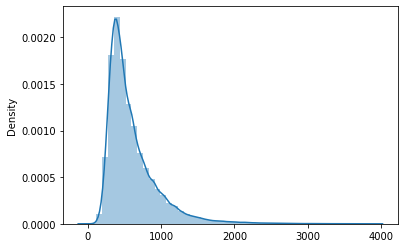

120.11023371114293
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [36]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['면적당단가']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['면적당단가']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'alpha': 1.35,
        'learning_rate': 1,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'huber',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 1000000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_huber_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.distplot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [37]:
np.sqrt(mean_squared_error(training_data_df['면적당단가'], oof))

119.2633750131125